# 장미와 찔레꽃에서 토큰화하고 간단한 처리
# 워드클라우드로 시각화
# 가급적 한글자는 뺄것

In [1]:
!pip install PyMuPDF

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 3.2/3.2 MB 31.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.2 MB ? eta -:--:--
   ------------------------------ --------- 10.0/13.2 MB 47.8 MB/s eta 0:00:01
   ---------------------------------------- 13.2/13.2 MB 48.8 MB/s eta 0:00:00


In [71]:
from konlpy.tag import Okt, Kkma, Hannanum
from ckonlpy.tag import Twitter, Postprocessor  # twitter은 okt랑 같은 친구
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import koreanize_matplotlib

In [9]:
okt = Okt()
kkma = Kkma()
han = Hannanum()
twitter = Twitter()

c:\Users\user\Desktop\Chunjae_edu\.conda\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
import fitz

path = "./[조동성, 김성민]장미와 찔레.pdf"
doc = fitz.open(path)
for page in doc:
    text = page.get_text()
    print(text)


이책은종이책<장미와찔레>의온라인판입니다.
보다많은독자들에게읽혀졌으면하는바람으로책의모든내
용을온라인으로공개하게되었습니다. 또한책말미에종이책
에없는이야기도조금넣었습니다. 
이파일은누구든지무료로보실수있고주변분들과자유롭게
나누실수도있습니다. 영리목적이아니라면어떤분이든이파
일을자유롭게복제, 배포, 이용하실수있습니다.
많은분들에게, 특히멋진꿈과미래를위해노력하시는여러젊
은이들에게이부족한책이조금이나마도움이된다면큰영광
이고기쁨이겠습니다.
여러분만의크고아름다운장미꽃인생을이루시길기도합니다.
저자조동성䤎김성민올림
글. 조동성서울대경영대학교수
서울대상과대학경영학과졸업/ 하버드경영대학원박사
하버드, 듀크대, 동경대등13개외국대학초빙교수역임
한국학술단체총연합회, 한국경영학회등20여개학술단체회장역임
유복한가정에서태어나부족함없는어린시절을보냈으나,
유학을앞두고집안이무너져혈혈단신맨손으로비행기에올랐다. 
태권도사범, 음식점기도, 눈길청소, 병원잡역등
다양한일을하며학비와생활비를벌었고, 
졸업후걸프오일과보스톤컨설팅그룹을거쳐
1978년에서울대교수발령을받고귀국했다.
경영전략, 국제경영학, 국가경쟁력, 디자인경영, 혁신경영,
창조경영, 윤리경영, 지속경영, 메커니즘경영, 경영예술등
늘새로운분야를개척-선도하며기업과산업, 국가의경쟁력강화를돕고있다.
산업자원부산업발전심의회의장, 대중소기업상생협력위원회위원장,
정부혁신관리위원회위원장등으로정부자문역할을했다.
‘세월은우리의주름살을늘게하지만마음속열정까지시들게하진못한다’라는
사무엘울만의싯구를좋아하는‘이순(耳順)청춘’의‘젊은’학자이다.
이야기. 김성민(주)아이웰콘텐츠대표
서울대경영학과졸업/ 헬싱키경제대Executive MBA 재학
사업가의꿈을안고경영학과에진학하나
현실적난관과유혹에부딪혀고민하던중,
스승인조동성교수가수업시간에들려준이야기를듣고
용기를얻어창업을결심한다.
이후조교수를찾아가그교훈을모티프로한책을제안하고
함께협의하며주제를이야기에녹여내는작업을한다.
그렇게쓰여진<장미와찔레>를가지고사업에첫걸음을내딛는다.
표지디자인. 낸시랭팝아티스트

당신의삶은장미꽃인가찔레꽃인가?

IWE

In [39]:
import fitz

# PDF 파일 경로
path = "./[조동성, 김성민]장미와 찔레.pdf"
doc = fitz.open(path)

# 텍스트를 저장할 리스트
text_list = []

# 각 페이지에서 텍스트 추출
for page in doc:
    # 페이지에서 텍스트 추출 (문단 기준으로 추출)
    text = page.get_text("text")

    # 리스트에 추가
    text_list.append(text)

# 최종 텍스트 저장
final_text = "\n".join(text_list)

In [42]:
new_text = """깔끔한 치마 정장, 단정하게 빗어 넘긴 머리, 짙지도 옅지도
않은 산뜻한 화장. 모든 것이 완벽했다. 참으려 해도 자꾸 얼굴
에 웃음이 떠올랐다. 날씨도 화창했다. 따사로운 햇살이 자신의
앞날을 축복하는 것처럼 느껴졌고 세상 모든 사람들이 자신을
향해 박수를 보내는 것 같았다. 미주의 머릿속에 이미 몇 번이고
음미했던 합격의 감동이 다시 떠올랐다.

“출근은 언제부터 가능하겠어요?”
“내일 당장이라도 나오겠습니다.”
“하하, 내일은 너무 급하니까 이렇게 해요. 이번 주말까지는
개인적인 일을 정리하시고, 다음 주 월요일부터 정식 출근하는
걸로 합시다.”
첫 출근 7
프롤로그
첫 출근1년 후
“에휴!”
미주가 한 숨을 쉬며 털썩 자리에 앉았다. 얼굴이 붉어진 채로
연신 이마에 흐르는 땀을 닦아내는 모습이 무척 화가 난 듯 보
였다.
‘미주씨! 이거 어떡할 거야? 자기 한번 믿어달라더니……. 강
좌 매출 다 죽이고 도대체 어쩌자는 거야? 아무튼 수단 방법 가
리지 말고 목표액 채워!’
부장의 신경질적인 목소리가 떠오르자 미주는 머리가 지끈거
렸다. 새로 나온 동영상 강좌의 판매가 저조하자 마케팅 부장이
관계자 회의를 소집해서 한바탕 쏘아댔는데, 특히 프로모션을 맡
았던 미주는 그 중에서도 가장 노골적인 비난을 받았던 것이다.
미주는 억울했다. 이번에 나온 동영상 강좌는 급하게 만드는
“예. 알겠습니다. 감사합니다! 열심히 하겠습니다!”

다시 생각해도 가슴 벅찬 기억이었다. 
미주는 대학 졸업 후 반년 이상 지옥과도 같은 취업난을 몸으
로 부딪히며 참 많이도 좌절해야 했었다. 합격자 명단에 없다는
말을 들을 때마다 마음은 갈가리 찢어졌고, 그 깊은 상실감은 누
구와 나눌 수조차 없었다. 그런 고통의 나날을 넘어서 이제 그
좁은 취업문을 갓 돌파한 미주에게 두려울 것은 아무 것도 없었
다. 세상이 모두 자기 것처럼 여겨지는 자신감만이 넘쳐날 뿐이
었다. 
‘그래! 회사가 좀 작으면 어때? 나 여기서 정말 열심히 해서
승진도 빨리 하고 꼭 최고의 인재가 될 거야! 앞으로는 모든 일
이 다 잘 될 거야!’
미주는 가벼운 발걸음으로 첫 출근길을 나섰다.
8 장미와 찔레 1년 후 9
01
1년 후바람에 오류가 너무 많았고, 그로 인해 상품평에 악플(나쁜 평가)
들이 넘쳐났다. 그걸 본 다른 고객들도 강좌를 외면했기 때문에
판매가 저조한 것이었고, 따지고 보면 가장 큰 책임은 제작팀에
있었다. 
하지만 부장의 생각은 달랐다.
‘마케팅이나 영업하는 사람은 물건 탓하는 거 아냐. 꼭 자기가
못 팔면 물건이 어쩌고 서비스가 어쩌고……. 그래서 발전이 있
겠어?’
참으로 간편한 논리였다. 물론 미주는 수긍할 수 없었다.
‘강좌가 엉망진창이라 안 팔리는 걸 나보고 어떻게 하라는 거
야?’
속으로 이렇게 투덜거리고 있는데 동료인 수진과 지은이 다가
와 어깨를 두드렸다.
“야! 커피나 한 잔 하러 가자.”
10 장미와 찔레 1년 후 11
문제사원 - 6개월 전
입사 후 미주는 정말 열심히 일했다. 신입직원 교육도 열심히 받았고 위
에서 일을 시키면 그 이상을 하려고 노력했다. 처음에는 그렇게 열심히 하
는 미주의 모습에 회사 사람들도 모두 호의적이었다. 그러나 몇 달이 지나
며 조금씩 문제가 발생하기 시작했다. 
미주는 마케팅부에 배치되었는데 마케팅부장은 상대하기에 무척 피곤
한 사람이었다. 삐쩍 마른 몸매에 신경질적인 말투와 고집불통 성격까지 지
닌 최악의 상사였다. 적어도 미주가 느끼기엔 그랬다. 아무튼 미주는 부서
에서 부장과 팀장의 지시를 받으며 일을 했는데, 잘해보려는 의욕이 넘친
것이 문제가 되었다. 미주는 위에서 일을 시키면 그대로 따르는 것이 아니
라 꼭 한 번씩 자기의견을 주장했다. 예를 들면 이런 식이었다. 부장이 지하
철 광고 단가를 알아보라고 지시하면‘무슨 광고를 하려고 그러세요?’, ‘온“너 또 부장 얘기하는 거에 토 달다 욕먹었지? 그냥 그 인간
하자는 대로 놔둬. 입바른 소리 해봤자 너만 피곤하다니까. 그리
고 너 아직도 그 인간 스타일을 모르겠냐? 무조건 잘되면 자기
탓 못되면 아랫사람 탓이잖아. 니가 그렇게 고집 피워서 제대로
아이디어 내봤자 너한테 돌아오는 거 하나도 없고, 그러다 혹시
잘못되면 너만 독박 쓴다. 그냥 그 인간이 하자는 대로 해서 혹
시 일 망쳐도 자기가 할 말 없게 만들어야 해.”
수진이 말했다.
“야. 그것도 완전 안심할 수는 없더라. 지난 번에 옆 팀 한 대
리가 올린 보고서 부장이 이 정도면 됐다고 하고 사장한테 보고
해놓고는, 사장이 내용이 부실하다고 지적하니까 바로 달려와서
한 대리한테 엄청 뭐라뭐라 했다던데? 아니, 자기가 OK 해놓고
라인 강좌 판매촉진을 위해서라면 효과측정이 어려운 지하철 광고보다는
온라인 광고 쪽을 생각해보는 게 좋지 않을까요?’라는 식으로 토를 달았던
것이었다. 물론 회사의 일을 자기 일처럼 생각하고 최선의 방법을 찾기 위
한 미주 나름대로의 노력이었지만, 사사건건 토를 달고 자기의견을 주장하
는 모습이 윗사람들 눈에는 고깝게 비춰진 모양이었다. 미주는 그럴 때마다
주위에서 핀잔을 들어야 했고, 상사와의 거듭되는 의견충돌 끝에 결국 공인
된 문제사원이 되어 버렸다. 
잘해보려는 노력이 인정받지 못하자 미주는 지치기 시작했다.
‘어차피 노력해봤자 누가 알아주지도 않고, 나만 피곤해지는 구나. 그
래, 그냥 시키는 대로 하자. 의견내지 말고 그냥 꾹 참고 위에서 시키는 대
로만 하자.’
지치고 실망한 미주는 그렇게 날이 갈수록 처음에 가졌던 열정을 잃어
갔다.
12 장미와 찔레 계기 13
02
계기다더라.”
수진이 말했다.
“맞아. 나는 솔직히 근무시간에 인터넷쇼핑도 많이 하는데 그
런 큰 회사 가면 하루 종일 일만 해야 하니까 답답해 죽을 지도
몰라. 지금처럼 일하다 커피 마시러 나올 수도 없고. 그러니 그
냥 연봉 좀 적고 짜증 좀 나고 해도 난 뭐 견딜만 해. 회사에서
돈을 조금 주면 우리도 받은 만큼만 일하면 되잖아?”
지은도 같은 의견이었다. 
친구들은 큰 불만이 없는 모양이었다. 아니 불만이 있어도 포
기하고 그냥 거기에 맞춰 자신이 적응하기로 한 모양이었다.
“나는 이대로는 못 있겠어. 내가 진짜 이 회사 떠나고 다른 곳
가던지 해야지. 이렇게 나를 몰라주고 체계도 하나 없는 회사에
서 더 이상 시간낭비하기 싫어.”
미주가 단호한 목소리로 얘기했다.
“그럼 어떻게 할건데? 얘. 대기업 공채 보면 누가 너 뽑아준대
니? 너나 나나 다 우리나라에서 제일 큰 회사부터 쭉 썼다가 다
떨어지고 지금 여기 온 거잖아. 우리도 대학 다닐 때까지만 해도
어디 이런 어정쩡한 회사 올 줄 알았냐? 말이야 쉽지만 현실은
그리 만만치 않았다고. 야! 나는 그 합격자 발표 날 때마다 메일
서 왜 나중에 와서 욕을 하냐고 욕을. 하여간에 진짜 인간 특이
하다니까.”
지은도 거들었다. 
동료들이 옆에서 신나게 부장의 욕을 해주자 미주는 조금 마
음이 풀리는 것도 같았다. 원래 기분 나쁜 일이 있을 때 친구들
이 자기보다 더 흥분해서 자기 편을 들어주면 그것만으로도 종
종 기분이 풀리는 미주였다. 하지만 그래도 답답한 마음이 완전
히 가신 것은 아니었다. 미주가 친구들을 보며 물었다.
“너희 보기엔 어떤 것 같아? 우리 이 회사에 계속 있으면 무
슨 비전이 있을까? 저 부장 밑에 있어봤자 발전도 없을 것 같고
뭔가 다른 방법을 찾아야 하지 않을까?”
미주는 이번에도 친구들이 호응해주길 기대했다. 하지만 예상
과 달리 친구들은 시큰둥한 표정이었다.
“우리도 더 큰 회사 더 좋은 회사 가고 싶기야 하지. 그런데
어떡하냐? 우리처럼 평범하게 대학만 졸업하고 별 다른 자격증
같은 것도 없으면 그런 좋은 회사에서 오라고 하지도 않는데. 그
냥 뭐 좀 짜증은 나지만 그래도 또 윗사람들 신경 안 쓰면 다닐
만해. 우리 회사 분위기가 좀 자유롭긴 하잖아. 대기업 가면 메
신저 내용도 다 검사하고 메일 주고받은 것도 다 검사하고 그런
14 장미와 찔레 계기 15에서 탈락했다는 문구 확인하던 기억, 끔찍해서 다시 떠올리고
싶지도 않다.”
수진이 조금 날카로워진 목소리로 말했다.
“그래 맞아. 그리고 얘 괜히 너 그만 둔다 어쩐다 얘기하고 다
니다 찍히면 지금보다 훨씬 더 힘들어진다. 만약에 여기 그만 두
고 다른데 가려고 해도 소문 안 나게 조용히 알아봐야 해. 괜히
취업정보 사이트에 이력서 같은 거 올려놓지 마. 그거 우리 부장
이 툭하면 들어가서 혹시 우리 직원들 중에 이력서 등록한 사람
없나 찾아본다더라. 개발팀 정 대리도 이직한다고 이력서 올려놨
다가 부장한테 걸려서 난리 났었잖아. 사장한테까지 얘기가 올라
가서 뭐 당장 사표 쓰라는 소리도 듣고 지금도 완전 윗사람들한
테 동네북이야.”
지은도 걱정스러운 목소리로 말했다. 
친구들의 얘기에 미주는 가슴 속의 답답함이 더 커지는 느낌
이었다.
“모르겠어. 아무튼 나는 여기서 더는 못 견디겠고 다른 회사를
가던지 아니면 대학원이라도 갈래. 대학원 졸업하면 좀 더 좋은
회사 갈 수 있겠지 뭐. 여기는 이제 생각만 해도……. 윽! 지겨
워!”
16 장미와 찔레 계기 17
미주가 몸서리를 치며 말했다.
“하긴. 내가 아는 사람들 봐도 회사 다니다 대학원 많이들 가
더라. 괜찮을지도 모르지 뭐.”
“진짜. 대학원 가면 좋겠다. 아! 나도 다시 학생시절로 돌아가
고 싶다. 회사생활은 너무 지겨워.”
친구들이 부러운 듯 말했다. 
미주는 갑자기 빨리 들어가서 인터넷으로 대학원에 대해 알아
보고 싶은 마음이 들었다.“흠. 진짜 곧 뽑네? 어디 보자. 경력증명서에 추천서에 학습계
획서? 뭐가 이렇게 많아? 그럼 추천서는 학교 교수님한테 받아
야 되는 건가?”
미주가 모니터를 보며 중얼거렸다. 
친구들과 얘기를 하다 우연히 대학원이라는 말이 나왔지만 생
각해보니 정말 괜찮은 것 같았다. 어차피 지금 가지고 있는 1년
남짓한 중소기업의 경력으로 미주가 꿈꾸는 큰 회사에 가는 것
은 불가능해 보였고, 그렇다면 좀 더 학력을 높여서 다시 도전해
보는 것도 괜찮아 보였다. 미주는 이 학교 저 학교 사이트에 들
어가 내용을 살펴본 후 지원할 몇 개 학교를 선택했다.
‘추천서는 누구한테 받지? 흠. 어떤 교수님이 좋을까?’
미주는 기억나는 교수를 떠올려봤다. 누구에게 부탁할지 망설
인사고과 - 3개월 전
팀장 의견서
마케팅부 사원 장미주

기획팀 팀장 의견: 생각이 너무 앞서는 경우가 많음.
제작팀 팀장 의견: 의욕이 넘치나 타인에 대한 매너와 배려가 부족
개발팀 팀장 의견: 열정적이고 활발하지만 때로는 막무가내.

18 장미와 찔레 약속 19
03
약속연구실에 있을 것입니다. 이 시간에 볼 수 있으면 좋겠지만, 혹
시 회사 때문에 이 시간이 불가능하다면 다음 주에 다시 시간을
잡도록 합시다.’
미주는 다음 주로 만남을 미루고 싶지 않았다. 시간이 지나면
결심도 흔들릴 것 같다는 생각이 들었기 때문이었다. 미주는 다
시 답장을 썼다.
‘교수님. 오전에 메일 드렸던 장미주입니다. 그러면 내일 오후
4시에 뵙겠습니다.’
근무시간이지만 대충 제휴사에 다녀오겠다고 둘러댈 생각이었
다. 아직 구체적으로 뭔가 한 것은 없지만 괜히 좀 뿌듯한 느낌
이 들었다. 미주는 즐거운 마음으로 퇴근을 했다.

다음날 아침, 미주는 출근하자마자 개인적으로 친한 제휴사 담
당자에게 전화를 걸어 오후 약속을 잡았다. 성 교수를 만나러 가
기 위한 알리바이 만들기였다. 알리바이와 땡땡이는 마케팅이나
영업처럼 업무특성상 외근을 자주 나가는 사람들의 특권이었다. 
오후 3시쯤 되어 미주는 마케팅 팀장의 자리로 갔다.
“팀장님. 저 M닷컴에 외근 좀 다녀오겠습니다.”
미주가 말했다.
여질 것 같았는데 신기하게도 딱 한 명이 바로 생각났다. 딱딱한
강의식 수업 대신 학생들과의 토론을 즐겼던 성 교수, 왠지 미주
는 성 교수에게 부탁하고 싶다는 생각이 들었다. 
성 교수는 수업 시간에 교재를 사용하지 않았고, 대신 교재에
서 배울 수 없는 것을 알아야 한다면서 다른 얘기들을 많이 들
려주곤 했다. 공부에 지치고 장래에 대해 고민하던 4학년 시절,
성 교수의 수업은 큰 위로가 되었기에 미주는 아직도 성 교수를
좋은 기억으로 간직하고 있었다. 성 교수는 학계에서 손 꼽히는
거물이기도 해서, 그에게 추천서를 받으면 대학원 입학에 더 도
움이 될 것 같다는 다소 계산적인 생각도 들었다. 미주는 학교
홈페이지에 들어가 성 교수의 메일주소를 찾아 면담을 요청하는
이메일을 보냈다. 
‘교수님. 안녕하세요? 저는 졸업생 장미주입니다. 지금은 온라
인 영어교육회사에서 일하고 있습니다. 이제 1년 갓 지났는데 사
회생활이라는 게 정말 쉽지 않네요. 교수님을 뵙고 앞으로 제 진
로에 대해 귀한 가르침을 받고 싶습니다. 편한 시간 알려주시면
제가 방문하도록 하겠습니다. 부탁드립니다.’
퇴근 직전에 성 교수의 답장이 왔다. 
‘장미주 양. 반갑습니다. 저는 내일 오후 4시부터 6시까지 제
20 장미와 찔레 약속 21지하철을 타고 가면서 미주는 성 교수에 대한 기억을 되짚어
보았다. 성 교수는 수업 시간에 가끔 인생과 진로선택에 대한 이
야기들을 들려주었었는데, 그 중 하나가 미주의 머리 속에 떠올
랐다. 미주가 4학년 때 들었던 수업에서 있었던 일이었다.

“학생은 꿈이 뭔가?”
성 교수가 수업을 듣는 학생 중 한 명을 가리켜 물었다.
“저는 성공하는 게 꿈입니다.”
학생이 대답했다.
“성공이라. 좀 추상적인데? 학생이 생각하는 성공은 어떤 건
데?”
성 교수가 다시 물었다.
“무슨 일인데요?”
팀장이 의아하다는 듯 물었다.
“자세히는 잘 모르겠습니다. 그쪽 담당자가 좀 의논할 일이 있
다네요. 제 생각엔 아무래도 계약갱신이 한 달 앞으로 다가오니
까 그 전에 특이사항 같은 거 전달해서 미리미리 협의해두려고
하는 것 아닌가 싶습니다.”
미주가 태연한 표정으로 말했다. 
사회생활을 해보니 가장 느는 건 연기력이었다. 싫은 사람 앞
에서 친한 척 하며 웃음짓기, 속으로 부글부글 끓는 데도 표정관
리하며 냉정을 잃지 않기, 그리고 지금처럼 상사 앞에서 태연하
게 거짓말 하기 등이 사회생활을 하며 배운 연기수업이었다.
“그런가? 알겠어요. 다녀와요.”
팀장이 승낙했다. 미주는 속으로 쾌재를 불렀다.
22 장미와 찔레 회상 23
04
회상성 교수가 웃으며 말했다.
“저는 1000억을 벌고 싶습니다.”
그 말에 학생들이 탄성을 지르며 박수를 치고 웃었다. 
여기저기서‘나는 얼마 너는 얼마’하며 웅성거리는 소리가
들렸다. 성 교수가 다시 장내를 조용히 시켰다.
“보니까 여러분들이 다 저마다 꿈을 가지고 있고 또 재산목표
도 가지고 있는 것 같은데, 그럼 여기 있는 사람들 중 과연 나중
에 실제로 그 목표를 이룰 사람은 몇 명이나 될까?”
성 교수가 물었다. 
그러자 학생들은 자신없는 얼굴로 서로를 둘러보기만 했다.
“나중에 진짜로 1000억을 벌 사람이 여기에서 몇 명이나 나
올까?”
성 교수가 다시 물었지만 학생들은 서로 머쓱하게 웃기만 할
뿐 아무 대답이 없었다. 
성 교수가 다시 처음에 지목했던 학생을 가리키며 입을 열
었다.
“자네 몇 학년이지?”
“4학년입니다.”
“그래? 그럼 졸업하면 뭐할 거야?”
“부와 명예를 얻는 것입니다.”
학생이 답했다.
“부와 명예. 좋아. 자본주의 사회에서는 돈이 없으면 하고 싶
은 일을 할 수 없으니까. 
오케이. 부와 명예를 얻는다. 그럼 학생은 돈을 얼마 정도 벌
면 스스로 만족할 만한 부를 얻었다고 할 수 있겠나?”
성 교수가 다시 물었다.
“음……. 저는 재산을 한 50억 정도 모으면 부유하다고 만족
할 것 같습니다.”
망설이다가 학생이 대답했고 나머지 학생들이 웃음을 터트렸
다. 강의실에서 교수에게 돈을 얼마 벌고 싶다고 말하는 게 왠지
조금 어색하고 민망하게 느껴졌기 때문이었다.
“그럼 옆의 학생. 자네는 이 친구가 얘기한 걸 듣고 웃었는데
학생은 얼마 벌고 싶어?”
성 교수가 다른 학생에게 질문했다.
“저는 최소한 100억은 벌고 싶습니다.”
그 학생이 자신있게 대답했다.
“그 뒤의 학생은? 얼마 벌고 싶어? 아주 외모가 씩씩하게 생
겼는데 사나이답게 한번 불러봐.”
24 장미와 찔레 회상 25“컨설팅. 거기 가면 자네 목표인 100억 모을 수 있겠어?”
“…….”
대답이 없자 성 교수가 어깨를 으쓱하더니 그 다음 학생을 지
목했다.
“자, 우리의 호프(hope: 희망) 아까 1000억 벌겠다고 했었지?”
“예.”
“자넨 뭐할 거야?”
“저는 유학을 가고 싶습니다.”
“유학 마친 다음에는?”
“아……. 그 다음에는 아마도 취직을 할 것 같습니다.”
“취직. 자, 그럼 자네는 자네 목표인 1000억을 어떻게 벌 건
가?”
“…….”
성 교수는 다시 전체 학생들에게로 눈을 돌렸다. 그리고 입을
열었다.
“지금 여러분과 나는 아주 비극적인 장면을 목격하고 있어요.
내가 대표로 3명의 학생에게 재산목표와 진로에 대해 물었는데,
아쉽게도 자기 목표를 이룰 것으로 생각되는 사람이 한 명도 없
네. 50억 벌겠다는 사람도, 100억 벌겠다는 사람도, 1000억 벌
“취직할 생각입니다.”
“어디?”
“금융 쪽 회사로 취업하고 싶습니다.”
“금융? 증권사나 은행 같은 곳 말이지? 그럼 자네는 아까 50
억 벌고 싶다고 했는데 은행 들어가면 자네의 목표인 50억 모을
수 있겠어?”
“…….”
“월급으로는 못 모을 텐데.”
“예. 월급만 받아서는 못 모을 것 같습니다.”
“그럼 어떻게? 뭘로 모을 거야? 50억.”
“음……. 잘 모르겠습니다.”
학생이 멋쩍게 웃었다.
성 교수가 두 번째로 지목했던 학생을 가리켰다.
“자네는 몇 학년인가?”
“3학년입니다.”
“이 학생보다 1년 더 남았네. 자네는 졸업하면 뭐할 거야?”
“저도 취직할 생각입니다.”
“어디로?”
“외국계 컨설팅회사에 들어가는 게 목표입니다.”
26 장미와 찔레 회상 27의 인생을 남들 하는 대로 따라 하려고 마음먹고 있지만, 여러분
들이 가진 꿈은 지금 여러분들이 생각하는 그 길에 있는 게 아
니야. ‘없을 지도 모른다’이게 아니라 확실히 없어. 확률 0%.
그러니 여러분들은 이 자리에서 다음 두 가지 중 하나를 선택해
요.”
성 교수가 말을 멈추고 잠시 학생들을 둘러봤다. 학생들의 시
선이 일제히 성 교수에게로 몰렸다.
“꿈을 버리든가, 아니면 그 꿈을 위해 달라지든가.”

미주는 조금 당혹스러웠다. 그날 성 교수의 얘기를 듣고 느낀
바가 있어 자신의 삶에 변화를 일으켜봐야겠다고 다짐했던 일이
어렴풋이 기억났기 때문이었다. 하지만 그 다짐은 며칠 못 가 흐
지부지 되어버렸고 결국 그 얘기는 까맣게 잊은 채 남은 대학생
활도 별 변화 없이 지냈었던 것이다. 그러다 졸업을 했고 주위
친구들처럼 미주도 여기저기 원서를 내다가 우여곡절 끝에 결국
지금 회사로 오게 된 것인데, 그러면 자신은 결과적으로 그 두
가지 방법 중 꿈을 포기하는 것을 선택한 셈이 된 것 아닌가 하
는 생각에 조금 기분이 씁쓸해졌다. 
‘그럼 어쩌란 말야? 대학 졸업생에게 취직 말고 다른 길이 있
회상 29
겠다는 사람도 다 꿈을 이룰 수가 없데. 왜 그럴까? 이유가 뭘까
요?”
아무런 대답이 없었다.
“내가 생각하건대 그 이유는……. 우선 여러분이 자신의 꿈이
나 목표를 이루기 위해 과연 어떻게 해야 할 것인지에 대해 진
지하게 생각해본 적이 없고, 그래서 앞으로의 인생도 그냥 꿈과
는 전혀 상관없는 길을 가려고 하고 있기 때문이에요.”
성 교수의 얘기에 장내가 조용해졌다.
“그러니까 이 기회에 여러분이 한번 진지하게 생각해봐요. 앞
으로 우리는‘꿈과 현실은 다르다’이런 소리 하지 말자고. 꿈하
고 현실, 목적하고 수단이 맞으려면 어떻게 해야 하는지를 한번
고민해야 되지 않겠냐 이거지. 자네, 자네는 피자 먹고 싶으면
어디로 가? 중국집 가나?”
성 교수가 앞자리에 앉아있는 학생에게 물었다.
“아니요. 피자집에 갑니다.”
그 학생이 대답했다.
“그렇지. 중국집 가면 피자를 못 먹잖아. 중국집에는 피자가
없으니까. 똑같아. 지금 여러분들이 걸어가려고 하는 그 길에는
여러분들의 꿈이 없어요. 여러분들은 별 생각 없이 이미 졸업 후
28 장미와 찔레성 교수
“꿈을 버리든가, 꿈을 위해 달라지든가.”
회상 31
었나? 애초에 나에겐 선택의 여지가 없었다고.’
미주는 성 교수의 얘기에 저항해봤다. 하지만 슬프게도 그날
성 교수가 예견했던 꿈과 현실이 괴리된 힘없는 삶을 그대로 살
고있는 지금 자신의 모습까지 부정할 수는 없었다. 그리고 지금
도 그런 삶에 지쳐 뭔가 탈출구를 찾기 위해 성 교수에게 도움
을 청하러 가고 있지 않은가. 인정할 수밖에 없는 일이었다. 
‘꿈을 이루기 위해 달라지라니. 도대체 어떻게 달라져야 한다
는 걸까?’
미주는 왠지 지금 떠오른 이야기를 잊지 않고 기억하고 싶다
는 생각이 들어 다이어리를 꺼냈다. 장황하게 안 쓰고 간단히 정
리하고 싶었는데 마땅한 말이 잘 생각나지 않았다. 잠시 고민하
던 미주는 우스운 생각이 들었는지 피식 웃더니 이렇게 적었다. 
‘중국집에 가서 피자를 찾지 말자!’
30 장미와 찔레잠시 기다려달라고 얘기했고 미주는 연구실 한 켠에 조교가 내
준 의자에 앉았다. 기다리며 가만히 얘기를 들어보니 졸업을 앞
둔 4학년 학생이 진로에 대한 상담을 하는 내용이었다. 미주는
관심이 생겨 귀를 기울였다.
“교수님 저는 어학연수도 다녀오고 학점이랑 토익성적도 좋은
편이고 각종 아르바이트에 인턴십 경험까지 최대한 할 수 있는 준
비를 다했는데도 이번 대기업 공채에 모두 낙방했습니다. 어떻게
하면 좋습니까? 이대로 졸업을 하면 이제 대기업은 내년에나 다시
도전해봐야 하는데 차라리 대학원에 진학하는 게 좋을까요?”
학생이 고민스러운 표정으로 물었다.
“대학원은 왜? 공부를 계속할 생각이 있나?”
성 교수가 학생을 물끄러미 바라보며 되물었다. 
“아뇨. 지금 상황으로 봐서 내년에도 대기업에 꼭 합격한다는
보장이 없으니까 차라리 대학원에 가서 석사학위를 따고 나오면
좀 더 좋은 조건으로 대기업 취직을 노려볼 수 있지 않을까 싶
어서요.”
학생이 대답하자 성 교수가 고개를 갸우뚱했다.
“대학원이 대기업 떨어진 사람 받아주는 곳인가? 나는 대학원
은 학부에서 배운 공부를 더 깊이 연구하려고 하는 사람들이 가
먼저 온 손님 33
학교는 활기가 넘쳐 보였다. 약속시간인 4시보다 조금 일찍
도착했던 미주는 매점에서 성 교수에게 선물할 음료수를 산 후
잠시 벤치에 앉아 학생들을 구경하고 있었다. 학생들은 저마다
밝은 표정으로 여기저기서 무리를 지어 떠들고 있었다. 미주는
자신의 학생시절이 떠올라 슬며시 웃음을 지었다.
‘좋을 때다. 나도 너희만할 때는 그렇게 아무 걱정도 없었지.’
미주는 학생들의 자유로운 모습이 참 부럽다는 생각이 들었고
자신도 대학원에 입학하면 그들과 같은 자유를 다시 누릴 수 있
게 될 것이라는 생각이 들었다. 부푼 기대를 가지고 미주는 자리
에서 일어나 천천히 성 교수의 연구실로 향했다.
연구실에는 먼저 온 손님이 있었다. 성 교수가 미주를 보더니
32 장미와 찔레
05
먼저 온 손님“제가 말씀드린 좋은 기업은 규모도 있고 명성도 있어서 주위
사람들이 인정해 줄만한…….”
학생은 이내 땀을 뻘뻘 흘리기 시작했다. 당황한 기색이 역력
했다.
“그래 그럼, 그건 그렇다 치고. 자네가 말하는 대기업에 들어
갔어. 그럼 그 다음엔 어떤 계획을 가지고 있나?”
“예? 계획이요? 어떤……?”
“계획이나 목표 말이야. 이를 테면 나중에 그 기업의 사장이
되겠다거나 하는.”
“아. 그건 한 3년 정도 다니면서 배우다가 월급 모은 돈으로
유학을 갈 생각입니다.”
학생의 말에 성 교수는 손사래를 치며 이게 무슨 소리냐는 듯
한 제스처를 취했다. 학생이 불안한 표정으로 성 교수를 바라보
자 성 교수는 다시 학생에게 얘기를 시작했다. 
“3년 일하고 유학? 그건 아니지. 지금 자네가 말한 얘기에는
몇 가지 결정적인 모순이 있어. 우선 어떤 기업도 3년 일하고
그만 둘 사람을 뽑지는 않아. 기업은 잘 다듬어서 오래오래 써
먹을 사람을 뽑으려고 하지, 좀 다니다 그만 둘 사람을 뽑는 정
신 나간 기업은 한 군데도 없어. 학생들이야 자기가 그 속셈을
먼저 온 손님 35
는 곳으로 알고 있었는데?”
성 교수의 말에 학생의 얼굴이 살짝 붉어졌다.
“물론 그렇지만 사실 학부 졸업생보다는 대학원 졸업생이 좀
더 취업할 때 유리한 건 사실이잖아요. 또 솔직히 말씀드려서 저
희 학교 졸업해서 좋은 기업 가는 게 쉽지만은 않은 일이기도
하고, 그러니 대학원이라도 졸업하면…….”
“자네가 말하는 좋은 기업이라는 게 대기업인가?”
성 교수가 다시 물었다.
“아무래도 보통 사람들이 생각하는 좋은 기업이라는 게 규모
가 크고 이름도 있는 회사들이니까 많이들 대기업을 목표로 삼
지 않을까요? 저는 그렇게 생각해서…….”
학생의 이마에 땀이 맺히기 시작했다. 성 교수의 말투가 생각
보다 날카로운 것에 심리적 압박을 느끼는 모양이었다.
“대기업은 말 그대로 큰 기업이지 좋은 기업이란 뜻은 아니야.
좋은 기업이라는 건 어떤 기준을 가지고 보느냐에 따라 달라질
수가 있지. 예컨대 매출이 많이 나는 기업이 좋은 기업이다 하면
대기업이 좋은 기업이겠지만, 사회봉사나 좋은 일을 많이 하는 기
업이 좋은 기업이다 하면 달라지지 않겠어? 도중에 안 짤리고 평
생 갈 수 있는 게 좋은 기업이다라고 하면 또 달라질 거고 말야.”
34 장미와 찔레맡은 일을 잘할 수 있게 도와주는 기술이야. 그걸 가르쳐주는 거
고 나머지 자네가 뭘 배우고 싶은 게 있다면 그건 스스로 찾아
서 익혀야 돼.”
“하지만 보통 그렇게 회사에서 일을 배운다는 얘기를 잘 쓰지
않습니까? 저도 그래서 자연히…….”
학생이 반론을 제시해봤지만 성 교수는 고개를 저었다.
“자네 말고도 많은 학생들이 회사에 뭘 배우러 간다고 생각들
을 하는데 그건 아주 큰 착각이야. 회사는 자네가 가진 노동력을
끄집어내서 그걸 이용해 돈을 벌고 대가로 월급을 주는 곳이야.
만약 회사가 자네에게 연봉을 2천만 원 준다면 회사가 자네에게
서 뽑아내려고 하는 성과는 1억 이상이야. 회사는 그렇게 돌아가
는 조직이야. 한가하게 배우고 뭐 하고 하는 곳이 절대 아니야.
착각하면 안돼.”
이제 학생의 얼굴은 완전히 붉으락푸르락해졌다. 아무래도 자
신이 모욕당하고 있다고 생각하는 모양이었다. 성 교수의 목소리
는 그리 크지 않았지만 그 얘기의 날카로움은 비수처럼 날아와
학생의 가슴에 꽂히고 있었다.
“그리고 유학을 간다고? 유학은 왜? 공부를 더 하고 싶다는
뜻인가?”
먼저 온 손님 37
숨길 수 있다고 생각하지만 면접 때 얼굴 딱 보면 면접관들은
다 알아.”
학생이 잘 이해 못하겠다는 듯 우물쭈물하고 있자 성 교수는
설명을 덧붙였다.
“웅진그룹의 윤석금 회장이 실제로 나한테 해준 얘기인데 자
기는 평생 직원들 면접을 봤더니 이제 눈빛만 봐도 알겠데. ‘아!
이 사람은 우리 회사에 오래 붙어 있겠구나. 아! 이 사람은 보나
마나 얼마 못 버티고 나가겠구나.’그게 딱 보이니까 조금 조건
이 떨어져도 가능하면 오래 붙어있을 사람들만 뽑는다는 거지.
자네보다 훨씬 더 경험이 많은 사람들이기 때문에 자네가 그들
앞에서 자네의 마음을 숨긴다는 건 불가능해. 그러므로 자네가
3년 일하고 그만 둘 생각을 가지고 있다면 자네는 필경 그 기업
에 들어갈 수도 없을 거야.”
“…….”
이제 그 학생은 아무 대답도 못했다.
“그 다음 자네는 지금 회사에서 3년간 배우겠다고 얘기를 했
는데 회사는 학원이 아니야. 회사는 뭘 배우러 가는 곳이 아니
야. 배우러 간다면 왜 월급을 받나? 오히려 자네가 회사에 학원
비를 내고 다녀야지. 회사에서 자네에게 가르쳐주는 건 자네가
36 장미와 찔레다도 자네에게 경험 측면에서 훨씬 나을 지도 몰라. 대기업에 가
도 처음부터 이런 큰 일에 실제적으로 투입되기는 어려우니까.”
성 교수의 말에 학생의 얼굴이 다소 어두워졌다. 아마 그런 작
은 기업은 생각해보지 않은 모양이었다. 성 교수는 그 표정을 보
면서 그럴 줄 알았다는 듯한 말투로 이야기를 계속했다.
“그렇지만 아마 자네는 내 제안을 받아들이고 싶지가 않을 거
야. 자네는 특별히 이 일을 하고 싶다기 보다는 그냥 대기업에
가고 싶은 거니까. 내가 보기에 자네가 취직을 하면서 주안점을
두는 건 그 회사가 소위 말해 주위 사람들에게 말했을 때 창피
하지 않은 이름을 가지고 있느냐 없느냐야. 좀 근사한 기업 들어
가서 사람들에게 인정받고 싶은 거지, 이름은 없지만 알찬 기업
들어가서 자기 실력을 키우고 싶은 게 아니라고. 안 그런가?”
“그건…….”
“그렇게 보면 자네는 지금 나한테 이 분야의 일을 하고 싶다
고 말하고 있지만 실제로는 그렇지가 않은 거야. 무슨 일을 하느
냐가 중요한 게 아니라 큰 회사에 가느냐 못 가느냐가 중요한
거지. 그러니까 별 이유도 없이 대학원을 가니 유학을 가니 하는
얘기가 나오는 거 아니겠어?”
성 교수는 거침없이 학생을 몰아붙였다. 학생의 얼굴은 인간의
먼저 온 손님 39
“아! 그건……. 보면 이 분야에서 크게 되려면 유학을 다녀와
야 한다고 해서…….”
“그 얘기는 누가 하던가? 유학 다녀와서 크게 된 사람들이 하
던가?”
“아뇨. 그냥 선배들이요. 사실 이 분야에 종사하고 있는 사람
들의 얘기는 실제로 들어보지는 못했습니다. 다만 잡지 같은 데
서 보면…….”
학생은 성 교수의 눈치를 살살 살폈다. 성 교수가 또 무슨 말
로 자신의 가슴을 후벼팔까 걱정되는 듯했다. 성 교수는 가볍게
한숨을 내쉬었다. 그리고 입을 열었다.
“내가 볼 때 자네가 가지고 있는 가장 큰 문제점은 지금 자신
이 하고 싶은 게 무엇인지 정확히 모른다는 거야.”
성 교수의 말에 학생은 눈을 크게 떴다. 인정할 수 없다는 표
정이었다. 성 교수가 다시 말을 계속했다.
“만약 자네가 정말로 이 일을 사랑하고 열심히 해보고 싶다면
나는 자네에게 내가 아는 기업들을 몇 군데 소개시켜줄 수도 있
어. 대기업은 아니지만 10명 정도의 인원이 모여 일년에 몇 번이
나 큰 프로젝트를 맡아서 수행하는 곳들이지. 이 분야에 대해 알
차게 경험을 쌓을 수 있을 거야. 내가 볼 때는 대기업 가는 것보
38 장미와 찔레생각이 잘 정리가 안됩니다. 제 나름대로 좀 고민을 해보고 생각
이 정리되면 나중에 다시 찾아뵐 수 있을까요?”
학생은 일단 이 자리를 벗어나고 싶은 모양이었다. 하긴 갑자
기 창업하라는 말까지 나왔으니 생각이 정리가 안될 만도 하다
고 미주는 생각했다.
“그래. 얼마든지. 그럼 돌아가서 한번 잘 생각해보고 나중에
다시 연락 주게. 오늘은 기다리는 손님도 있으니까 이쯤 하고 다
음에 다시 보지.”
“예. 오늘 좋은 말씀 감사합니다. 안녕히 계세요.”
학생이 인사를 하고 일어나 연구실을 나갔다. 표정을 보니 방
금 전 면담에서 얼마나 큰 충격을 받았는지를 가늠할 수 있었다.
미주는 갑자기 겁이 덜컥 났다. 자신도 대학원 얘기를 하러 왔는
데 앞의 학생을 보니 무슨 얘기를 듣게 될 지 뻔할 것 같았기 때
문이었다. 그리고 직접 와서 보니 성 교수는 생각보다 훨씬 깐깐
한 사람이 아닌가.
“장미주 양? 오래 기다리게 해서 미안해요. 이쪽으로 와서 앉
아요.”
성 교수가 미주를 불렀다. 미주는 가슴이 쿵쿵 뛰는 것을 느끼
며 일어서서 성 교수에게 다가갔다.
먼저 온 손님 41
얼굴이 저렇게까지 빨개질 수 있을까 싶을 만큼 달아올랐다. 미
주는 왠지 그 학생의 얼굴이 저러다 펑 터져버리지나 않을까 하
는 쓸 데 없는 걱정까지 들었다.
벌건 얼굴로 한동안 고개를 푹 숙이고 있던 학생은 겨우 용기
를 내 다시 입을 열었다.
“그럼 교수님께서 제게 해주시고 싶은 조언은 무엇입니까? 그
냥 포기하고 작은 회사에 취업하는 게 좋겠다는 말씀인가요?”
성 교수는 안타깝다는 표정으로 학생의 얼굴을 바라보더니 말
했다.
“자네가 취할 수 있는 몇 가지 길이 있을 거야. 진짜 이 일이
좋다면 내가 아까 말한 것처럼 작더라도 알찬 기업에 가서 자네
의 역량을 최대한 발휘하고 그 곳에서 두각을 나타내보게. 아니
면 진짜 밑바닥부터 시작해서 고생할 각오를 하고 직접 창업을
해보든가. 그것도 아니면 아까 자네가 말한 대로 대학원을 가든
유학을 가든 하고. 혹시 추천서를 부탁한다면 물론 얼마든지 써
줄 수 있네. 자네의 판단을 존중하겠네. 아무튼 선택은 자네가
하는 거니까.”
학생은 한참이나 말이 없더니 이윽고 무겁게 입을 열었다.
“교수님. 사실 오늘 해주신 말씀들이 너무 뜻밖이라 제가 지금
40 장미와 찔레“그래. 졸업생이고 회사를 다닌다고? 그런데 미주 양은 언제
내 수업을 들은 적이 있었던가?”
성 교수가 고개를 갸웃거리며 물었다. 낯이 익다는 느낌을 받
은 모양이었다.
“예. 졸업학기였던 2년 전 가을에 교수님의 수업을 들은 적이
있습니다. 항상 뒷자리에 앉아서 기억은 잘 못하시겠지만 그래도
그 때 좋은 말씀을 많이 해주셔서 참 도움을 많이 받았습니다.
그런데 아까 그 학생은 졸업 앞두고 진로상담을 하러 온 모양인
가 봐요?”
미주는 이렇게 말하면서 성 교수의 모습을 살폈다. 
예전과 별 변함이 없었다. 성 교수는 예순에 가까운 나이였지
만 그보다 훨씬 젊어 보이는 외모를 가지고 있었다. 적당한 몸집
장미꽃 인생, 찔레꽃 인생 43
성 교수
“내가 볼 때 자네가 가지고 있는 가장 큰 문제점은
지금 자신이 하고 싶은 게 무엇인지 정확히 모른다는 거야.”
42 장미와 찔레
06
장미꽃 인생, 찔레꽃 인생자고 한 용건은?”
성 교수는 바쁜지 바로 본론으로 들어가려고 하고 있었다. 미
주는 침을 한 번 꿀꺽 삼킨 후 입을 열었다.
“예. 사실 오늘 교수님을 뵙자고 한 이유는…….”
‘우우웅’
갑자기 책상 위에 놓여있던 성 교수의 휴대폰이 진동으로 떨
렸다.
“아. 잠시만. 여보세요?”
성 교수가 미주에게 양해를 구하며 전화를 받았다. 미주는 괜
찮다는 표시로 가볍게 목례를 했다.
“응. 그래. 이따 저녁때. 강의창 사장이랑 신혁 사장 다 오니까
거기서 보자고. 내가 지금 손님이 있어서 통화를 길게 못하겠네.
응. 그래. 오케이.”
얘기를 들어보니 저녁 약속이 있는 듯했다. 앞의 학생과의 얘
기가 길어지는 바람에 이미 시간이 많이 지나서 미주와 얘기할
수 있는 시간이 많지 않은 것 같았다.
“미안. 하던 말 계속 해봐.”
성 교수가 전화를 끊고 미주를 바라보며 다시 말했다.
“아……. 사실 별 얘기는 아니고요……. 그런데 제가 궁금해서
장미꽃 인생, 찔레꽃 인생 45
에 옷차림도 딱딱하지 않았고 신발도 편안한 운동화를 신고 있
었다. 전체적으로 부드러운 인상이지만 아까 들은 것처럼 말투는
조금 날카롭고 직선적이어서 외모와 대비를 이루었다.
“학생들이 졸업 앞두고 막상 사회에 나가려고 하면 다들 마음
이 싱숭생숭한지 이렇게 찾아오는 경우가 종종 있어. 그래서 요
즘은 학생들하고 대화를 할 수 있게 가능하면 연구실에서 오래
있으려고 노력하고 있지.”
“예. 그렇군요. 저도 졸업 앞두었을 때는 무섭고 걱정도 되고
해서 교수님들께 조언을 받고 싶어했었습니다. 그 심정 이해가
되네요.”
미주가 말했다. 그러자 성 교수가 다시 입을 열었다.
“그런데 보면 날 찾아오는 학생들에게서 내가 공통적으로 느
끼는 아쉬움이 있어. 자기 인생에 대해 걱정을 하긴 하는데 실제
로 그 해결을 위한 진지한 고민은 안한다는 거지. 자기가 뭘 하
고 싶은지도 모르는 채 그냥 여기 와서 이 얘기 듣고 흔들리고
저기 가서 저 얘기 듣고 또 흔들리고. 하긴 대학 들어올 때도 전
공에 대해 전혀 모른 채 배치표 점수 맞춰서 들어오는 학생들이
태반이니까, 이런 중요한 결정을 해볼 기회가 없었을지도 모르
지. 아무튼 문제는 문제야. 그건 그렇고, 오늘 장미주 양이 날 보
44 장미와 찔레여러 다양한 학생들이 많이 찾아오거든. 아까 그 학생은 대기업
을 못 가서 찾아왔지만 실제로 대기업에 들어가서도 또 만족 못
하고 나를 찾아오는 사람들이 있어. ‘막상 가보니 생각보다 별로
다. 힘도 많이 들고 경쟁도 치열해서 견디기 힘들다. 그만 두고
차라리 공부나 계속 하는 게 어떨까 싶다.’이런 얘기들을 와서
하는 거지. 물론 중소기업 다니는 학생들도 마찬가지고. 그럼 그
학생들에게 내가 한 가지 얘기를 해줘.”
“무슨 얘기를 해주십니까? 저도 좀 들을 수 있을까요? 그 학
생들의 고민이 저와 비슷할 것 같습니다.”
미주는 자기도 모르게 몸을 앞으로 당겨 앉았다. 무슨 이야기
일지 궁금했기 때문이었다. 
성 교수는 책상 위에 있던 자신의 모니터를 옆으로 돌려서 화
면이 미주에게 보이게 했다. 모니터에는 바탕화면으로 한 그림이
깔려있었다.
장미꽃 인생, 찔레꽃 인생 47
여쭤보는 건데 아까 그 학생은 대학원에 가고 싶어서 찾아왔던
건가요?”
미주는 슬쩍 말을 돌렸다. 아무래도 용기가 나질 않아 조금 탐
색전을 해보려고 마음먹은 것이었다.
“대충 비슷한 얘기지. 사실 이렇게 나를 찾아오는 학생들을 보
면 10명 중 9명은 나에게 조언을 들으러 온다기 보다는 이미 자
기 목적이 확실해서 그 목적에 맞게 나를 이용하러 와. 이용한다
는 표현이 좀 그렇긴 하지만, 예를 들면‘유학을 가려고 하니 추
천서를 써달라’또는‘어느 기업에 취직하고 싶으니 그 회사에
있는 높은 분에게 소개를 해달라’이런 목적으로 오는 학생들이
아무래도 많지. 아까 그 학생 같은 경우는 대기업에 취직을 하고
싶은데 들어가기가 힘드니까 대학원에 가고 싶다는 그런 얘기를
하러 온 거였고.”
“그렇게 학생들이 찾아와서 부탁을 하면 주로 어떻게 하십니
까? 그냥 써주십니까?”
성 교수가 미주를 슬쩍 한번 쳐다봤다. 미주는 혹시 속마음이
들킨 것이 아닌가 싶어 속으로 뜨끔했다. 
성 교수가 다시 입을 열었다.
“물론 써달라면 써주기야 하지. 하지만 그 전에 과정이 있어.
46 장미와 찔레“이 꽃들 이름이 뭔지 알겠나?”
성 교수가 물었다.
“왼쪽의 큰 꽃은 장미꽃 같은데 오른쪽 작은 꽃은 뭔지 잘 모
르겠습니다.”
미주가 대답했다.
“오른쪽 꽃은 찔레꽃이라고 장미의 먼 친척 뻘 되는 꽃이지.
그런데 이 둘이 친척이긴 하지만 차이가 있어. 찔레꽃은 늦은 봄
부터 가을까지 꾸준히 지금 그림에 보이는 것처럼 작은 망울들
을 터트리는데, 반면 장미꽃은 어느 한 철 짧은 기간에 이렇게
크고 화려한 꽃을 피우는 거야.”
“그렇군요.”
“처음에는 찔레꽃의 작은 망울들이 부러울 수도 있지만, 세월
이 지나면 그보다 훨씬 더 아름다운 꽃을 피우게 되는 게 장미
지.”
성 교수는 미주를 바라봤다. 그리고 얘기를 계속했다.
“내가 미주 양에게 이 두 가지 꽃 중 하나를 선물하겠다면 미
주 양은 어떤 것을 선택하겠어? 장미? 찔레?”
“저는 화려하고 예쁜 장미가 더 갖고 싶습니다. 찔레꽃도 나쁘
지 않지만요.”
48 장미와 찔레 장미꽃 인생, 찔레꽃 인생 49장미꽃 인생, 찔레꽃 인생 51
미주가 대답하자 성 교수가 다시 물었다.
“그럼 만약 장미와 찔레 둘 다 꽃이 피지 않은 상태라면 그
때는?”
“꽃이 아직 안 핀 상태라도 잘만 키우면 나중에는 분명 예쁜
꽃이 필 테니까, 이번에도 역시 장미를 선택할 것 같습니다.”
성 교수는 고개를 끄덕이더니 다시 입을 열었다.
“나는 인생에도 이렇게 장미꽃과 찔레꽃 두 가지 종류의 길이
있다고 생각해. 일찍 빛을 보고 별 어려움 없이 무난하게 살아가
는 찔레꽃과 같은 인생이 있는가 하면, 낮은 위치에서 시작해서
오랜 기간 인내의 시간을 거치다 나중에 비로소 화려한 꽃을 피
우는 장미꽃과 같은 인생이 있는 거지. 둘 중 어떤 인생을 선택
하느냐에 따라 자기가 감내해야 하는 삶의 과정이 달라지게 되
는 거야.”
성 교수는 종이와 볼펜을 가져와 뭔가를 그리기 시작했다. 그
래프였다.
50 장미와 찔레고 이런저런 취미생활도 하면서 비교적 여유있게 살 수가 있어.
이게 내가 말하는 찔레꽃 인생이야. 찔레꽃이 늦은 봄부터 가을
까지 계속 작은 꽃을 피우는 것과 비슷한 거지.”
미주는 주의 깊게 들었다. 성 교수의 설명이 이어졌다.
“그런데 여기서 한 가지 짚고 넘어간다면 이 찔레꽃 인생은
중간에 어려움이 없는 대신 말년까지 다해도 사회 전체적으로
볼 때 정점이다 싶을 정도의 큰 성취는 이루지 못하는 경우가
많아. 원래 성취라는 것은 리스크에 달려있거든. ‘로우 리스크
로우 리턴, 하이 리스크 하이 리턴(Low Risk Low Return, High
Risk High Return)’이라고 해서 위험이 작으면 수익도 작고 위험
이 크면 수익도 큰 법이지. 근데 이 찔레꽃 인생은 안정적이기
때문에 굳이 도중에 리스크를 안지 않아도 되거든. 그래서 리스
크가 큰 장미꽃 인생만큼의 성취는 없는 거지. 찔레꽃이 충분히
예쁘긴 하지만 장미처럼 아주 크고 화려하지는 않은 것과 마찬
가지야.”
흥미로운 이야기였다. 미주는 다음 내용이 궁금해졌다.
“그러면 장미꽃 인생은 어떤 것입니까?”
“장미꽃 인생은 내가 생각할 땐 자네처럼 조직 생활을 하거나
아니면 자기가 직접 개척해서 창업을 하는 거야.”
장미꽃 인생, 찔레꽃 인생 53
“그림으로 그리면 이쯤 되겠지. 인생 초창기부터 괜찮은 성취
를 내면서 막판까지 순탄하게 가는 찔레꽃 같은 인생이 있고 처
음에는 고생을 하지만 나중에는 화려한 비약을 하는 장미꽃 같
은 인생이 있는 거야.”
성 교수가 그림을 미주에게 보여주면서 말했다. 미주는 흥미가
느껴졌다.
“여기서 말씀하신 찔레꽃 인생이라는 건 예를 들어 어떤 것을
얘기하시는 건가요?”
미주가 묻자 성 교수가 시계를 힐끔 쳐다보곤 입을 열었다.
“보통 직장 다니는 사람들이 제일 부러워하는 게 전문직이거
든. 변호사나 의사 같은. 이렇게 특별한 자격을 갖추고 사회생활
을 시작하면 인생 초창기부터 성취가 있으니까 많이 부러워하지.
그래프를 보면 처음부터 가파른 성장을 하잖아? 그러니까 이런
직업들은 일단 진입만 하면 말년까지 큰 어려움 없이 풍족한 성
취를 이루며 인생을 살 수 있는 거야.”
미주가 고개를 끄덕였다. 성 교수가 말을 계속했다.
“물론 이런 인생은 처음에 진입하는 게 좀 힘들지. 변호사가
되려면 사법시험을 패스해야 하고, 의사가 되려면 의대를 가야
하니까. 그렇지만 그 초창기의 관문을 뚫으면 자기 가족 부양하
52 장미와 찔레한번 보자고. 그럼 1단계인 첫 10년 즉, 20대 중반부터 30대 중
반까지는 회사에서 직원에게 투자를 하는 시기야. 괜찮겠다 싶은
사람을 뽑아놓고 그 사람을 잘 써먹을 수 있게 훈련시키는 시기
지. 이 시기에는 직원들도 자기 몫을 나름대로 열심히 하긴 하지
만 크게 보면 회사에서 훨씬 많은 부분을 직원에게 투자한다고
보는 게 맞아. 그래서 직원에 대한 대우도 당연히 별로 안좋지.
회사 입장에선 아직 제대로 써먹지도 못하는 사람을 돈을 주면
서 키우고 있는 거니까. 물론 이런 얘기를 들으면 젊은 직원들은
기분이 나쁘겠지만 아무튼 1단계는 이렇다고 보면 돼.”
‘회사가 직원에게 투자하는 시기라……. 회사 입장에서 보면
그런가?’
미주가 생각해보지 못했던 시각이었다. 성 교수는 얘기를 계속
했다.
“2단계인 두번째 10년 즉, 30대 중반부터 40대 중반까지는
이제 그 직원이 회사에 기여를 하기 시작하는 시기야. 그동안 회
사가 필요로 하는 능력을 잘 길렀다면 이제는 실제로 활약을 하
면서 회사에 기여를 하는 거지. 위로는 경영진들의 의사를 이해
하고 아래로는 아직 준비가 덜 된 젊은 직원들을 잘 이끌어서
회사의 중요한 실무들을 수행하는 시기야. 대우는 1단계보다 조
장미꽃 인생, 찔레꽃 인생 55
‘어라? 회사에 다니는 게 장미꽃 인생?’
미주는 의아한 생각이 들었다.
“회사에 들어가면 처음에는 그 대우가 형편없잖아? 월급도 적
고 윗사람들은 나를 무시하고 일은 힘들고. 그러니까 처음 회사
에 간 사람들은‘이게 아닌데……’라는 생각을 많이 하지. 그래
서 보통 회사에 들어간 지 1년에서 2년 정도 지나면 사람들이
앞으로의 인생에 대해 진지하게 고민을 하기 시작하거든. ‘아!
나 같은 인재가 이런 곳에서 계속 썩어야 하나?’하면서 말이야.
그 때가 졸업한 학생들이 날 제일 많이 찾아오는 시기이기도 하
지. 그런데 이런 게 있어. 회사생활은 단계가 있는 거야.”
여기까지 얘기하고 성 교수는 다시 시계를 힐끔 쳐다봤다. 아
무래도 약속 시간이 가까워오는 모양이었다.
“교수님 혹시 약속 가셔야 하는 거 아니에요?”
미주가 눈치를 채고 물었다.
“사실 이따 어디 갈 곳이 있긴 한데, 아직 시간여유는 조금 있
어. 괜찮아.”
“예. 알겠습니다.”
“아무튼 얘기를 계속하자면, 회사생활은 크게 봐서 3단계가
있어. 20대 중반에 회사에 들어간다고 치고 10년 단위로 쪼개서
54 장미와 찔레장미꽃 인생은 진입은 좀 수월한데 반해 중간중간이 계속 위기
야. 리스크가 계속 있는 거지. 그래서 1단계를 채 넘지 못하고
탈락해버리는 사람들도 있고 2단계에서 포기하는 사람도 있고
그래. 결국 3단계에 이르는 사람은 전체의 1~2% 정도밖에 안되
지. 100명 입사해서 1~2명 남는 거니까 아주 리스크가 커. 나머
지 99명은 자기가 못 견디고 그만두거나 아니면 회사에서 짤리
니까.”
“그렇군요. 하긴 요즘 뉴스만 봐도 삼팔선(38세 퇴직)이니 사오
정(45세 정년)이니 하면서 회사원들이 불안에 떤다는 얘기가 많이
나오잖아요.”
미주가 맞장구를 쳤다. 성 교수는 살짝 웃더니 얘기를 계속
했다.
“그런데 보면 아주 재미있는 게 좋은 학교를 나오고 소위 말
하는 똑똑하고 우수하다는 친구들일수록 더 못 견디고 도중에
탈락하는 경우가 많다는 거야. ‘나는 똑똑하고 능력있는데 내가
왜 여기서 이런 대접을 받아야 하나?’이런 생각에 1,2단계를 견
디질 못하는 거지. 똑똑하고 능력있으면 나중에 3단계까지 도달
할 가능성도 동료들에 비해 훨씬 높을 텐데 자기 스스로 그만두
고 나와버려. 인생 첫 단계에서의 불리함이나 손해를 견디지 못
장미꽃 인생, 찔레꽃 인생 57
금 좋아지지만 그래도 같은 시기의 찔레꽃 인생의 성취보다는
많이 못하지.”
‘그럼 2단계는 우리 회사로 치면 팀장이나 부장 정도인가?’
미주가 속으로 생각했다. 성 교수의 얘기가 이어졌다.
“마지막 3단계는 40대 중반 이후부터인데 이제 비로소 그동
안 축적한 노력의 결실을 맺는 시기라고 할 수 있어. 조직에서
인정받아 최고의 위치에 서게 되고 아래 직원들을 움직여서 큰
일들을 지휘하게 되지. 많은 보상을 받게 되고 대외적으로 크게
이름을 떨칠 수도 있어. 그래서 이 시기에 이르면 비로소 장미꽃
인생과 찔레꽃 인생의 지위가 역전돼. 마지막 한 철에 가장 크고
화려한 꽃을 피우는 장미처럼 평생 기울인 눈물과 땀의 결실을
맛보는 화려한 비약의 시기라고 볼 수 있는 거야. 여기가 장미꽃
인생의 궁극적인 목적지이자 절정이지. 탈락하지 않고 마지막 단
계까지 도달하면 이런 성취를 맛볼 수가 있어.”
미주는 자기가 가지고 있던 회사생활에 대한 이미지와는 조금
다른 얘기라고 생각했다. 미주는 이렇게 나중의 일까지는 생각해
본 적이 없었다. 그럴 여유가 없었기 때문이었다.
“그런데 마지막 단계까지 도달하는 것이 좀 어렵지. 아까 찔레
꽃 인생은 진입이 힘든 반면 한번 진입하면 순탄하다고 했잖아?
56 장미와 찔레험을 즐기고 어떤 사람은 위험을 회피하고. 그러니까 이런 인생
의 선택도 그 사람이 무엇을 추구하느냐에 따라서 달라질 수밖
에 없겠지. 다만 요즘 학생들이 모두 편안한 찔레꽃 인생만을 꿈
꾸고 부러워하니까 자연히 나는 장미꽃 인생을 소개하고 옹호하
는 쪽으로 얘기를 하게 되는 경우가 많은 것뿐이야.”
“예. 무슨 말씀인지 이해합니다.”
미주가 대답했다.
“사실 좀 더 자세히 파고들면 장미꽃 인생과 찔레꽃 인생 속
에서도 또 어떻게 하느냐에 따라 모습이 달라져. 찔레꽃 인생에
속하는 사람도 그 안에서 계속 도전하고 혁신하면서 끊임없이
위험을 감수한다면 그 사람은 훨씬 더 큰 성장을 하기도 하지.
같은 의사, 변호사, 교수라도 더 많은 일을 하고 크게 되는 사람
들이 있잖아? 그런 건 찔레꽃 인생이면서도 계속 성장하는 장미
형 찔레 정도로 명명할 수 있을 것 같아. 그런가 하면 장미꽃 인
생에 속하지만 노력도 안하고 생각없이 살다가 한 번 피워보지
도 못하고 정말 그저 그렇게 살아가는 찔레형 장미 인생도 있을
수 있겠지.”
“그렇군요.”
미주가 긍정의 말투로 대답했다. 성 교수가 들려주는 이야기는
장미꽃 인생, 찔레꽃 인생 59
하고 나중에 올 찬란한 보상을 포기해버리는 거지. 공부 잘한다
는 학생일수록 이런 경향이 아주 커.”
“아. 그렇군요. 보통 공부 잘하고 좋은 학교 나오고 그러면 기
회가 더 많이 주어지니까 그럴 수도 있겠네요.”
“그렇지. 기회가 많다고 생각하니까 자신이 잡은 기회를 우습
게 보는 경우가 많아. 그래서 나는 회사생활 못하겠다고 하면서
나를 찾아오는 졸업생들한테는 꼭 이 장미꽃 찔레꽃 얘기를 해
줘. ‘지금 네가 걸어가고 있는 길은 장미꽃 인생이다. 지금은 힘
들겠지만 잘 견디고 이겨내면 나중에는 지금 네가 부러워하는
다른 사람들보다 훨씬 큰 성취를 이룰 수도 있다. 그래도 그만
두고 딴 길로 가고 싶으냐?’이렇게 물어보지. 그래도‘유학 가
겠다.’아니면‘고시나 다른 시험을 보겠다.’이렇게 뜻을 꺾지
않으면 그냥 그렇게 하라고 말하지. 장미꽃 인생이든 찔레꽃 인
생이든 기본적으로 그건 개인의 선택이니까. 누구도 강요할 순
없어.”
미주가 동감의 뜻으로 고개를 끄덕였다.
“아! 분명히 알아야 할 것은 나는 장미꽃 인생이 더 좋고 찔레
꽃 인생이 나쁘다느니 하는 뜻으로 얘기하는 것이 아니야. 사람
마다 추구하는 목표도 다르고 성향도 다르잖아. 어떤 사람은 위
58 장미와 찔레르침을 받고 싶은 것이 더 있습니다. 많이 바쁘시겠지만 편한 시
간 말씀해주시면 오늘처럼 다시 제가 방문하겠습니다.”
성 교수는 노트북에서 일정표를 찾아봤다. 일정표가 빼곡한 걸
보니 정말 많이 바쁜 모양이었다.
“ 다음 주 수요일 오후에 내가 연구실에 있을 테니 오늘처럼
오후 4시쯤 오게. 그때는 내가 시간을 좀 충분히 빼놓겠네.”
“알겠습니다. 그럼 다음 주 수요일에 다시 뵙겠습니다. 교수
님 오늘 귀한 말씀 해주신 것, 다시 한번 정말 감사 드립니다.
가보겠습니다.”
미주는 허리를 숙여 공손히 인사를 하고 연구실을 나왔다.
장미꽃 인생, 찔레꽃 인생 61
묘하게 설득력이 있어서 계속 저절로 고개가 끄덕여졌다. 성 교
수가 다시 입을 열었다.
“아무튼 내가 그들에게 이런 얘기를 해주는 건 지금 자기가
장미꽃 인생을 살고 있는 건지 찔레꽃 인생을 살고 있는 건지,
또 자기 미래에 어떤 결과가 기다리고 있는지를 잘 모르고 지금
당장 눈에 보이는 것만으로 인생을 판단하지는 말라는 뜻에서야.
즉, 자기가 어떤 인생을 살고 싶은 것인지 확실히 정하고 그 길
을 가라는 거지. 한 마디로 말해 인생의 목표를 명확히 세우라는
거야.”
미주는 연신 고개를 끄덕였다. 장미꽃과 찔레꽃에 대한 비유는
생소했지만 충분히 납득이 가는 이야기였다. 
성 교수는 다시 시계를 쳐다보더니 얘기했다.
“정말 미안한데, 오늘은 여기서 얘기를 마쳐야 할 것 같아. 이
거 진짜 미안하네. 먼저 찾아온 학생 때문에 얘기도 제대로 못
나누고, 멀리서 왔을 텐데 찾아온 보람이 없겠어.”
“아닙니다. 교수님. 오늘 해주신 얘기 정말 많은 도움이 되었
습니다. 장미꽃 찔레꽃에 대한 얘기도 인상적이었고요, 인생의
목표를 확실히 세우라는 교수님의 말씀도 잘 알겠습니다. 정말
감사합니다. 그리고 다음에는 언제 다시 찾아뵐 수 있을까요? 가
60 장미와 찔레지하철을 타고 회사로 돌아오면서 미주는 성 교수로부터 들은
얘기를 곰곰이 생각해봤다. 찔레꽃 인생과 장미꽃 인생, 언뜻 생
각해보면 회사생활이 장미꽃 인생일 리 없다고 느껴졌다. 고생만
죽도록 하고 누가 알아주지도 않는 회사생활이 과연 나중에 그
렇게 큰 보상을 받을 수 있는 것일까? 하지만 또 한편으론 경제
신문에 자주 나오는 유명 기업인들은 밑바닥부터 시작했느니 입
지전적인 인물이니 하는 신화 같은 이야기가 따라다니는 경우도
심심치 않게 있었다는 것이 기억났다. 예전에는 그 이야기들을
허울 좋은 성공신화 정도로 생각했지만 알고 보면 그들이 바로
성 교수가 말한 장미꽃 인생을 살고 대망의 마지막 단계까지 도
달한 사람들이 아닐까 하는 생각이 들었다. 
미주는 이제 그 이야기를 활용해서 자신에게 적용해보기로 했
최 팀장 63
성 교수
“나는 인생에도 이렇게 장미꽃과 찔레꽃 두 가지 종류의 길이 있다고 생
각해. 일찍 빛을 보고 별 어려움 없이 무난하게 살아가는 찔레꽃과 같은 인
생이 있는가 하면, 낮은 위치에서 시작해서 오랜 기간 인내의 시간을 거치
다 나중에 비로소 화려한 꽃을 피우는 장미꽃과 같은 인생도 있는 거지. 
둘 중 어떤 인생을 선택하느냐에 따라 자기가 감내해야 하는 삶의 과정
이 달라지게 되는 거야.”
62 장미와 찔레
07
최 팀장으니 장소는 아무래도 상관없었다. 미주는 그렇게 하자고 답장을
보냈다.
“미주씨. 이쪽이에요.”
최 팀장이 손을 들어 미주를 불렀다.
“안녕하세요? 팀장님. 잘 지내셨어요?”
미주도 반갑게 인사를 했다.
“지난번에 보니까 아메리카노를 드시길래 같은 걸로 미리 사
놨습니다. 저는 좀 달짝지근한 거 아니면 못 마시겠던데 역시 미
주씨는 취향이 고급스러워요.”
최 팀장이 테이블 위에 있던 커피를 건네며 말했다.
“아! 아니에요. 고급스럽다니 창피해요. 그나저나 그런 걸 다
기억하시다니……. 감사합니다. 잘 마실게요.”
미주가 고마움에 다시 꾸벅 인사를 했다. 
“저는 예전에 커피숍 갔다가 메뉴판에서 이름이 멋지길래 에
스프레소라는 걸 시켰다가 깜짝 놀랐잖아요. 정말 조그만 컵에다
원액만 담아서 주더라고요? 이게 뭐냐 싶어서 그냥 원샷 하려다
가 너무 써서 죽을 뻔했습니다.”
“정말요? 팀장님도 참. 이런 말씀 드려도 괜찮을지 모르지만
최 팀장 65
다. 성 교수는 장미꽃 인생을 설명해줄 때 기간을 10년씩 나누었
는데 지금 미주처럼 규모가 작은 회사에 다니는 사람에게는 기
간을 10년으로 잡으면 너무 길지 않을까 하는 생각이 들었다. 미
주의 회사는 전체 직원이 100명이 채 안되는 중소기업이었다.
미주는 자기 회사에서는 각 단계의 기간을 5년에서 7년 정도로
줄여 잡는 게 더 현실적일 것 같다고 생각했다. 
‘흠. 그럼 5년씩 두 번 해서 10년을 이 회사에서 버티면 그
다음에는 나한테도 화려한 3단계가 온다 이건가? 지금부터 10년
을 근무한다면 아마 부장이나 이사 정도 되겠지? 부장? 그래봤
자 별 것 없을 것 같은데. 하나도 안 부럽잖아. 아! 그나저나 부
장 그 인간 생각하니 또 기분 망치네. 에잇! 그만두자. 이 지겨운
회사에서 어떻게 10년을 버티냐? 말도 안되는 소리.’
미주는 부장 생각이 나자 기분이 나빠지려고 해서 그만 생각
하던 것을 멈췄다. 
그때 미주의 휴대폰에 문자메시지가 왔다. 제휴사인 M닷컴의
최 팀장이었다.
‘미주씨. 제가 일 때문에 강남 쪽에 나와있으니 괜찮으시면 미
팅도 이 근처에서 하시죠. 커피숍에 가 있겠습니다. 연락주세요.’
어차피 성 교수를 만나러 나오기 위해 일부러 잡은 미팅이었
64 장미와 찔레습니다. 그보다는 일단 이렇게 시작을 하고 상황을 봐서 사이트
방문자들을 이 쪽으로 끌어모을 수 있는 멋진 기획을 하는 게
진짜 목적이니까, 그때 가면 미주씨가 아이디어 내서 많이 좀 도
와주세요.”
최 팀장은 빙긋 웃으며 커피를 들이켰다. 시원시원한 사람이
었다.
“아! 그건 그렇고 미주씨. 오늘 만나자고 하신 이유는 뭐 특별
히 하실 말씀이라도 있어서인가요?”
“아뇨. 그냥 계약만료일이 얼마 안 남았잖아요? 곧 재계약을
해야 하니까 혹시 불만사항이나 요구사항, 또 서운해하시는 점
없는지 확인해보려고요. 저희 강좌나 서비스에 미흡한 점이 있으
면 말씀해주세요. 바로 반영하겠습니다. 팀장님 혹시 재계약 안
한다고 내부 방침 나거나 한 건 아니죠?”
미주는 이렇게 말함으로써 성 교수를 만나기 위해 회사를 빠
져나온 알리바이를 완성했다. 왠지 조금 찔리는 듯한 기분이 살
짝 들었다.
“예. 걱정 마세요. 계약 이후 매출상으로 아직 가시적인 성과
는 없지만, 사이트 구성상 교육콘텐츠는 꼭 필요하고 지금 제공
해주시는 서비스에도 비교적 만족하고 있거든요. 다만 간혹 강좌
최 팀장 67
보기보다 엉뚱하시네요.”
“하하! 제가 호기심이 좀 강한 편이긴 합니다.”
최 팀장은 상대를 편안하게 해주는 매너를 갖추고 있는 사람
이었다. 하지만 최 팀장이 가진 장점은 매너뿐만이 아니었다. 실
력은 더욱 뛰어났다. M닷컴은 IT 업계에서 주목받고 있는 인터
넷 포털서비스(Portal: 인터넷 이용의 첫 시작역할을 하는 곳. 국내 대표
적 포털서비스는 네이버닷컴이나 다음넷을 들 수 있음) 회사였고 최 팀
장은 그 곳에서 능력을 인정받아 남들보다 훨씬 젊은 나이에도
불구하고 초고속으로 승진하고 있었다. 최 팀장은 자사 포털사이
트에 외부회사의 콘텐츠를 도입해서 서비스를 채우는 일을 담당
했고, 미주의 회사는 교육 카테고리의 CP(Contents provider: 콘텐
츠 제공자)로 선정되어 동영상 강좌를 제공하고 있었다.
“팀장님. 사이트에 런칭(launching: 출시. 새로운 서비스나 제품의
도입을 이르는 말)한 저희 강좌는 반응이 좀 있나요?”
“아뇨. 뭐 특별히 판매가 활발하진 않아요. 미주씨도 아시겠지
만 포털사이트에 들어와서 누가 공부하고 싶겠어요? 놀거나 아
니면 뭐 검색하고 그러는 게 주목적이다 보니 이런 동영상 강좌
는 방문자수 자체도 많이 떨어집니다. 이 부분은 처음 계약할 때
도 말씀드렸고 또 피차 예상한 일이니까 특별히 신경쓰실 건 없
66 장미와 찔레3일이 채 못 갔다. 부장이 시킨 대로 신규강좌 매출증진을 위
해 파격적인 할인이벤트를 걸었더니, 잠깐동안 판매량이 늘긴 했
었지만 역시 미주의 예상대로 채 3일도 못가 약발이 떨어져버린
것이었다. 뿐만 아니라 강좌구매자들이 쓰는 후기란에는 강좌의
질과 수두룩하게 발견된 오류에 대해 성토하는 내용들이 이어졌
다. 
‘강의를 너무 성의 없이 만드신 느낌이네요. 틀린 내용도 많고
실망입니다. 환불해주세요!’
‘어째 이 회사 강의는 갈수록 엉망이 되냐? 내용교정 좀 똑바
로 해라!’
각종 항의성 글들이 며칠째 줄지어 올라오자 미주는 속으로
고소한 생각이 들었다.
귀찮은 일 69
내용 중에 글자가 잘못 들어가거나 오류가 있는 경우가 있는데,
그런 부분만 좀 빨리빨리 수정을 해주시면 좋을 것 같아요. 강좌
에 오류가 있으면 그 쪽에서 고객들한테 판매하실 때도 역시 문
제가 될 수 있을테니까요.”
최 팀장이 성격만큼 시원시원한 목소리로 말했다.
“네. 강좌 오류 부분은 정말 뭐라 드릴 말씀이 없습니다. 저희
도 모니터링을 계속 하겠지만 혹시 눈에 보이는 거 있으면 알려
주세요.”
미주는 최 팀장과 몇 마디 더 이런저런 얘기를 하고 헤어졌다.
68 장미와 찔레
08
귀찮은 일눈에 보이는 오류가 너무 많이 나와서 퇴짜를 맞은 모양이야. 딱
한 번만 다시 기회 달라고 사정해서 이번 주 금요일까지 수정본
보내기로 했다고 하니까 그 전에 끝내줘.”
아니나 다를까 일을 떠맡게 생겼다. 그것도 강좌오류 검수라
니. 강좌 검수는 1강에 30분씩 총 20강이나 되는 동영상 강좌를
하나도 빠짐없이 다 보면서 그 중 잘못 나온 내용, 잘못 써진 글
자, 잘못 체크된 문제정답 등을 다 골라내야 하는 정말 지겨운
일이었다. 누구나 피한다는 그 일을 말 한 마디 잘못해서 떠맡다
니. 낭패였다.
“저……. 부장님. 강좌 검수는 제작팀에서 하는 것이 맞지 않
습니까? 왜 마케팅 팀인 제가 검수를…….”
“제작팀에서도 하긴 하는데 지금 바로 다음 강좌 제작 들어가
서 사실 여력이 별로 없어. 자네도 알잖나? 지금 우리 회사 강좌
수가 경쟁사에 비해 절대적으로 부족해서 일단 무조건 많이 만
들어내는 것에 집중하고 있는 거. 이렇게 해서 종류별로 그래도
최소한 몇 개씩은 강좌의 라인업이 구성이 되야 B2B 시장이든
B2C(Business to Consumer: 소비자 대상 전자상거래) 시장이든 경쟁
력이 생기니까, 당분간은 일단 먼저 서둘러 만들고 이렇게 나중
에 수정하는 수밖에 없어.”
귀찮은 일 71
‘흥! 마케팅이나 영업하는 사람들은 물건 탓하는 거 아니라
고? 벌써 고객들이 증명해주잖아? 바보 부장 부끄러운 줄 알아
라. 그리고 제작팀장도 자기네는 잘못 하나도 없는 척 하더니 쌤
통이다. 한번 당해봐라.’
한창 고소해하고 있는데 갑자기‘따르릉’미주 책상의 전화벨
이 울렸다. 부장이었다.
“미주씨. 지금 바쁜가? 잠깐 내 방으로 와.”
“부르셨어요?”
“미주씨 요즘 진행하는 일 뭐 있지? 많이 바쁜가?”
“지금 진행하는 건 이번 신규강좌 프로모션하고 기존 제휴사
관리 정도입니다.”
말해놓고 나니 아차 싶었다. 상사가 바쁘냐고 물어볼 때는 이
것저것 최대한 많이 나열해서 굉장히 바쁜 것처럼 말해야 새로
떠맡는 일이 없다는 것을 경험으로 알고 있었는데, 그만 아무 생
각없이 대답해버린 것이다.
“그래? 그럼 많이 바쁘진 않겠네? 잘됐어. 미주씨가 이번에
나온 신규강좌 검수 좀 해줘. B2B(Business to Business: 기업 대상
전자상거래) 영업팀에서 고객사 담당자들한테 강좌를 보여줬는데
70 장미와 찔레“Hello Everyone? 안녕하세요? 우리 오늘부터 영어공부 한
번 신나게 해봅시다!”
‘아! 이걸 언제 다 보냐?’
미주는 또 한숨을 푹 쉬었다.

‘딩동’
모니터 화면 우측 하단에 메일 모양의 아이콘이 떴다. 새 메일
이 도착했다는 뜻이었다. 메일을 보낸 사람은 예전에 취업정보
사이트에 이력서를 올려두었던 것이 알려져서 곤욕을 치렀다던
개발팀의 정 대리였다. 받는 사람은‘직원 전체’메일제목은‘그
동안 감사했습니다’였다. 미주는 메일을 열었다.
‘안녕하세요? 개발팀의 정지원입니다. 제가 오늘을 마지막으
로 회사를 떠나게 되었습니다. 그동안 잘 대해주신 분들께 감사
드립니다. 다음에 더 좋은 모습으로 뵙겠습니다. 감사합니다.”
짤막하고 형식적인 인사말이었다. 정 대리는 이직을 준비한다
는 것이 알려진 후 윗사람들과의 관계가 상당히 틀어졌던 모양
이었다. 메일을 보니 떠나게 되어 서운하다는 감정보다 지긋지긋
한 곳에서 탈출해서 기쁘다는 감정이 더 느껴지는 듯 했다. 정
대리의 메일이 도착한 후 수진과 지은으로부터 메신저 메시지가
귀찮은 일 73
부장이 미주의 얼굴을 쳐다보지도 않고 대답했다. 그래도 미주
는 미련을 버리지 못하고 다시 한번 문제제기를 해봤다.
“그럼 B2B 영업팀이 쓸 거면 그 쪽에서 해야…….”
“아! 거 진짜!”
부장이 얼굴을 찌푸리며 미주를 쳐다봤다. 미주는 버럭 하는
부장의 반응에 흠칫 놀랐다. 부장이 숨을 가라앉히고 다시 입을
열었다.
“이 사람아. 영업팀이 지금 회사에 앉아서 강좌 들여다보고
있어야겠어? 나가서 한 회사에라도 더 팔아와야 우리가 같이 먹
고 살 거 아냐. 그리고 솔직히 자네가 직원들 중에서 영어에 관
심도 많고 일처리도 꼼꼼하고 그러니까 나도 믿고 맡기는 거야.
이것도 회사 차원에서 굉장히 중요한 일이니까 귀찮아도 좀 참
고 해봐.”
“아……. 알겠습니다.”
부장의 방에서 나온 미주는 한숨이 절로 나왔다. 하지만 그나마
다행인 것은 부장의 말대로 미주가 영어공부에 관심이 많은 편이
라는 점이었다. 미주는 자리로 돌아가서 홈페이지에 들어가 강좌
를 켰다. 1강이 시작되자 강사가 화면에 나와 웃으며 인사했다. 
72 장미와 찔레사람들도 모두들 좀 더 많은 연봉을 주고 좀 더 가능성 있어 보
인다는 회사들로 옮겨갔다. 하도 회사를 옮기는 사람들이 많으니
이직 안하고 가만히 있으면 어디서 오라는 데 하나 없는 무능력
자처럼 비춰지는 게 아닌가 싶어 고민하는 직원들도 많았다. 또
연봉협상에서 유리한 결과를 얻어보려는 마음에 일부러 한번 그
만 두겠다고 액션을 취해보는 직원들도 간혹 있었다. 물론 그 액
션의 결과가 꼭 좋다고 볼 수는 없었다. 회사에서 아쉬워하지 않
을만한 사람이 그런 액션을 취했다가 자기 무덤을 파는 경우도
발생했기 때문이었다. 아무튼 정 대리의 이직 메일로 인해 어수
선한 수요일 오전이었다.
“팀장님. 오늘 오후에 반차를 내려고 합니다.”
미주가 마케팅 팀장에게 말했다. 오후 4시에 성 교수를 다시
만나기로 지난 주에 약속했기 때문이었다.
“무슨 일로요? 부장님이 지시하신 강좌 검수 건도 있어서 바
쁜 걸로 알고 있는데?”
팀장이 물었다.
“죄송합니다만 오늘 몸도 조금 안 좋고 강좌 검수는 집에서도
할 수 있으니까, 일찍 퇴근해서 좀 쉬었다가 집에서 마저 하도록
귀찮은 일 75
날아오기 시작했다.
‘야. 정 대리 메일 봤지? 장난 아니지 않냐? 완전 찬 바람 쌩
쌩이던데. 사장한테 그동안 있는 정 없는 정 다 떨어졌나 보다.
아까 오전에 개발팀 사람들한테 들으니까 꽤 큰 게임회사로 옮
겨 가기로 했다나봐. 연봉도 좀 오르고. 아! 좋겠다.’
수진은 정 대리가 부러운 모양이었다.
‘정 대리 이직한다고 해서 개발팀장까지 아랫사람 관리 못한
다고 같이 욕 먹었다던데……. 아무튼 기어이 가는구나. 이제 또
사람 새로 뽑겠네? 그나저나 올해 들어 벌써 몇 명째니? 이거
거의 한 달에 두세 명씩은 그만두는 것 같은데?’
지은의 말은 사실이었다. 올해 그만 둔 사람의 수는 거의 한
달에 두세 명 꼴이었다. 100명 남짓한 회사에서 매달 두세 명씩
사람이 바뀐다는 것은 분명 적지 않은 수치였다. 일년이면 거의
전 직원의 1/3~1/4 가량이 이직을 한다는 얘기, 하지만 달리 보
면 그리 놀라운 숫자가 아닐 수도 있었다. 왜냐하면 미주의 회사
뿐 아니라 다른 비슷한 규모의 중소기업들도 대부분 상황이 비
슷했기 때문이었다. 전 직원의 1/3 까지는 아닐지 몰라도 이직률
이 높은 것은 다 마찬가지였다. 연봉, 회사의 비전, 경력발전의
가능성 등이 이직의 주된 이유였다. 올해 미주의 회사를 떠나간
74 장미와 찔레들이 다 좋아했다. 보는 사람으로 하여금 참 즐겁게 회사 다닌다
는 생각이 들게 하는 사람들이었다. 
성 교수와의 약속시간은 오후 4시였기 때문에 시간 여유가 상
당히 많았다. 미주는 그동안 뭘 할까 잠시 고민하다 회사원들은
할 수 없는‘낮 시간에 극장가서 영화보기’를 선택했다. 마침 보
고싶은 영화도 있던 참이었다. 한 번도 혼자 영화를 본 적이 없
어서 조금 망설여졌지만, 딱히 이 시간에 불러낼 친구도 없기에
미주는 극장으로 가서 표를 샀다. 그리고 극장 앞 햄버거 집에서
가볍게 점심을 먹었다. 
‘혼자서 식사하기’와‘혼자서 영화보기’는 생각보다 괜찮았다.
처음에는 혼자 온 자신을 보고 남들이‘저 사람은 친구도 없나
봐?’라고 하며 수군거리지나 않을까 걱정했는데, 막상 가보니
자신을 신경쓰는 사람은 아무도 없었다. 그냥 다들 와서 맛있게
식사하고 재미있게 영화보고 가는 것이었다. 극장을 나오면서 미
주는 해보지도 않고 쓸 데 없는 걱정을 했던 자기자신이 멋쩍게
느껴졌다. 그리고 속으로‘앞으로는 친구랑 시간 안 맞으면 종종
혼자서 영화 보러 다녀야겠다.’라고 생각했다. 
근처 커피전문점에서 아메리카노 한 잔을 산 미주는 학교를
향해 출발했다.
귀찮은 일 77
하겠습니다.”
“흠. 하긴 검수할 분량이 좀 많긴 하죠? 그래요. 그럼. 오늘은
일찍 들어가서 편한 환경에서 일해요.”
“감사합니다.”
의외로 순순히 허락해주는 팀장이었다. 미주는 휴가계를 제출
하고 회사를 나왔다. 마침 밖에서 담배를 피우고 있던 B2B 영업
팀 직원들이 미주를 보더니 웃으며 손을 흔들었다.
“앗! 우리회사 대표미녀 미주씨다! 어디 가? 검수 미주씨가 하
기로 했다며? 파이팅이야. 잘 부탁해.”
“몰라요. 대리님들 때문에 저만 일복 터졌어요. 책임져요.”
미주가 웃으며 엄살을 부렸다.
“에이~ 우리 사이에 왜 이래? 계약만 되면 우리가 점심 끝내
주는 거 사줄 테니까 화 풀어. 아! 내 거래처 담당자 중에 성격
좋은 사람 있는데 소개팅 시켜줄까? 생긴 건 킹콩 닮았어. 싫으
면 슈렉도 있고.”
“됐어요. 아무튼 대리님들 미워죽겠어요. 저는 반차 내고 집에
가서 검수 보려고요. 그럼 내일 뵈요.”
미주가 인사를 건네고 나왔다. 영업팀 직원들은 항상 실적 스
트레스를 안고 있으면서도 성격 좋고 유머감각도 풍부해서 직원
76 장미와 찔레점 교수님께 미리 양해를 구하겠습니다.”
“괜찮으니 편하게 말해봐.”
“저는 직장을 다니고 있습니다. 직원 100명에 연간 매출은
80억 정도 되는 회사이고요, 마케팅 일을 하고 있습니다. 솔직히
말씀드리자면 저도 처음에는 다른 학생들처럼 대기업에 들어가
고 싶었는데 실패하고 어렵게 지금 회사에 들어가게 되었습니다.
입사한지는 1년이 조금 넘었고요. 그런데 회사를 다니다 보니 자
꾸 고민이 생깁니다. 대학 졸업하기 전에는 좋은 회사 가서 큰
일 하면서 그 분야의 전문가가 되고 싶었었는데, 지금 제 현실은
제가 꿈꾸던 모습과 너무 다르기 때문입니다. 스스로에게 실망스
럽기도 하고 뭔가 다른 길을 찾아야 하는 게 아닌가 싶은 생각
도 들고요.”
“다른 길을 찾는다? 예를 들자면?”
“사실 지난번 그 학생처럼 저도 대학원 진학을 생각하고 교수
님을 찾아왔었습니다. 대학원을 마치고 나면 다시 한번 기회가
주어지지 않을까 하는 생각을 했었거든요.”
미주는 이렇게 말하며 성 교수의 눈치를 살폈다. 어떤 반응이
나올지 궁금했기 때문이었다.
“지난번 그 학생에게 내가 한 얘기를 들었다면 내 의견을 잘
Integrity 79
“아! 장미주 양. 어서 와요.”
성 교수가 웃으며 미주를 맞이했다.
“시간 내주셔서 감사합니다. 교수님.”
미주가 공손하게 인사를 했다.
“감사는 무슨……. 여기 편하게 앉아요.”
미주는 성 교수가 권해준 자리에 앉았다.
“지난번엔 정말 미안했는데, 오늘은 좀 여유가 있으니 안심해
요. 그래. 내게 듣고 싶은 얘기가 뭐지? 무슨 얘기를 해주면 좋
을까?”
역시 성 교수는 뜸들이는 법 없이 본론으로 바로 들어가는 스
타일이었다. 
“궁금한 것이 많아서 조금 두서가 없을지도 모르겠습니다. 그
78 장미와 찔레
09
Integrity로 옮겨가는 두 가지 중 하나를 선택하는 경우가 많습니다. 조금
씩 조금씩 좀더 좋은 회사로 옮겨가다 보면 나중에는 꽤 좋은
기회를 얻더라고요.”
“응. 확실히 요즘 사람들은 이직을 많이 하지.”
“예. 저희 회사만 해도 오늘도 한 명이 이직을 했고, 사람들이
상당히 자주 옮기는 편이거든요. 그 방법에 대해서는 어떻게 생
각하십니까? 이직을 통해 발전을 도모하는 것이요.”
미주의 질문에 성 교수는 고개를 끄덕였다.
“굉장히 중요한 질문을 했네. 예전에는 이런 개념이 없었는데
요즘에는 커리어관리라는 용어가 생겨서 전략적으로 이직을 하
는 사람들이 상당히 많아졌어. 옛날에야 회사를 그만 두는 것은
아주 특별한 일이 아니면 거의 없는 경우였는데, 요즘은 자주 옮
기는 게 능력이라는 말을 하는 사람도 있을 정도로 이직이 많아
졌지. 중소기업뿐만 아니라 큰 기업들도 이직이 꽤 있어. 그래서
기업들도 상당히 신경을 쓰는 부분인데, 사실 우리나라에 이런
현상이 나타난 지는 몇 년 되지 않았기 때문에 아직은 결과를
몰라. 안 옮기고 쭉 있는 사람과 이리저리 옮겨 다니는 사람 중
나중에 누가 더 잘될지는 두고 봐야지. 
그런데 미국에는 이런 현상이 예전부터 나타났었거든. 그래서
Integrity 81
알겠네?”
성 교수가 웃으며 말했다.
“예. 교수님께서 단순히 대기업 입사를 위한 대학원 진학에는
반대하신다는 것을 알게 되었습니다.”
“세상 어떤 교수가 그런 걸 좋아하겠어? 그리고 명분도 좀 그
렇지만 실리도 없을 가능성이 커. 학부 나오고 취업 못한 사람이
대학원 간다고 쉽게 취업할 수 있을까? 내 생각엔 확률이 그리
크게 달라지진 않을 것 같거든. 내가 반대하는 이유는 학생들이
대학원에 공부하러 가겠다는 게 아니라, 단지 사회에 던져지는
것이 두려워서 그걸 잠시라도 늦춰보겠다고 피난처로 대학원을
선택하는 것처럼 느껴지기 때문이야.”
정곡을 찌르는 얘기였다. 미주는 가슴이 뜨끔했다.
“예. 그렇군요. 저의 경우는 피난처라기보다는 재도약의 기회
로 삼고 싶어서 대학원을 생각했었습니다만…….”
“흠. 재도약이라…….”
성 교수가 말을 멈추고 생각에 잠겼다. 미주는 잠시 기다리다
다시 말을 이었다.
“저처럼 중소기업에 다니는 사람들은 대학원에 가서 다시 대
기업을 노려보거나 아니면 이직을 하면서 조금씩 더 좋은 회사
80 장미와 찔레이 중역이 되고 옮겨 다닌 사람들은 어느 수준에 이르면 더 올
라가지 못하는 경우가 많아. 미국은 임원이 되면 대우가 훨씬 달
라지기 때문에, 결국 이리저리 옮겨 다닌 사람보다 마음 정한 곳
에서 계속 머무른 사람들이 나중에 더 크게 성장하더라고.”
“그렇군요. 그런 측면이 있을 수 있겠네요. ‘Integrity’기억해
둬야 할 단어 같습니다.”
미주가 고개를 끄덕이면서 말했다.
“그리고 이직이라는 것도 하면 할수록 그 기회가 없어져. 생각
해봐. 이력서를 보니 이 사람이 2~3년에 한 번씩은 꼭 회사를
옮겼어. 자네 같으면 그 사람을 자네 회사에 데려다 쓰고 싶겠
나? 나중에 또 떠날 확률이 엄청 크다고 느껴지지 않겠어? 그러
니까 결국 그 사람은‘우리 회사에 와도 충성을 다해 일한다기
보다는 잠시 머물다 갈 사람’으로 비춰질 가능성이 크지. 그러니
아무래도 잘 뽑으려 하지 않게 될 거야.”
타당성 있는 얘기였다. 성교수의 말이 이어졌다.
“그리고 혹시 그 사람을 뽑는 회사가 있다 하더라도‘잠시 데
려다가 최대한 열심히 일을 시키고 언제든지 다시 떠나 보낼 수
있는 사람’이라 생각하고 투자를 하지 않게 되겠지. 그래서 어느
수준에 이르면 더 이상 위로 올라가기가 힘들어지는 거야. 결국
Integrity 83
이 결과에 대해 조사한 확실한 데이터가 있어.”
“그렇다면 결과는 어떻습니까?”
미주가 궁금해져서 물었다.
“40대 이전까지는 이리저리 옮겨 다닌 사람들이 연봉이 높아.
아무래도 그렇겠지? 이직을 한다는 건 좀 더 좋은 조건을 제시
하는 곳으로 가는 거니까, 옮기면 옮길수록 연봉이 높아지는 거
야. 그런데 재미있는 것은, 40대가 되면서부터는 안 옮기고 한
곳에 있었던 사람들의 연봉이 쭉 올라가. 그래서 옮겨 다닌 사람
들보다 훨씬 높아져. 완전히 역전이 되더라고.”
“그래요? 갑자기 연봉이 역전되는 이유가 있나요?”
미주가 눈을 크게 뜨며 물었다.
“40대를 넘어서면 이제 서서히 회사의 중역 이상으로 올라가
게 되는데, 이럴 때 중요한 것은 능력만이 아니거든. 신뢰가 필
요해. 회사와 개인간에 쌓인 신뢰. 영어로는 이걸‘Integrity’라
고 해서 그 사람이‘man of Integrity’냐 아니냐가 굉장히 중요
해지지. 그런데 회사를 옮겨 다닌 사람들은 이게 없는 거야. 회
사에서 볼 때는‘이 사람은 지금은 우리와 함께 일하고 있지만
나중에 다른 기회가 생기면 언제든지 떠나갈 수 있는 사람’이라
는 생각을 하게 되는 거지. 그래서 보통 한 곳에 쭉 있었던 사람
82 장미와 찔레학원에 가는 것도 아니다 싶은 생각이 드는데, 그러면 어떻게 하
는 게 좋을까요? 사실 지난번에 들려주셨던 장미꽃 인생에 대한
얘기를 스스로 적용해봤는데, 제가 현재 회사에 남아서 나중에
중역이 된다고 해도 별로 큰 발전은 없을 것 같다는 생각도 들
었었거든요. 저희 회사는 아까 말씀드렸던 것처럼 규모도 크지
않고…….”
“음……. 자네 혹시 자네가 중역이 되고 사장이 될 때까지도
회사가 그 모습 그대로일 거라고 생각하는 건가? 그러면 안되지.
성장가능성이 없다면 그런 곳은 빨리 떠나는 게 상책이야. 내가
말한 장미꽃 인생이라는 건 회사와 개인이 함께 성장한다는 전
제가 깔린 거야. 예를 들어 전망이 하나도 없는 사양산업이다,
그러면 그 때는 빨리 전망 밝은 곳으로 옮겨가야지. 이건 생존의
문제니까. 미주 양이 다니는 회사는 그 정도인가? 비전이 없어?
그렇지는 않은 것 같은데?”
“아. 제가 다니는 곳은 산업으로 보면 전망이 나쁜 산업은 아
닌 것 같아요. 오히려 뜨고 있는 분야라고 봐야죠.”
“그렇다면 과연 자네의 젊음을 걸 가치가 있는 회사인지 잘
판단해봐. 회사의 미래는 밝은지, 경영진의 생각은 건전한지, 내
가 능력발휘를 할 수 있겠는지 등등. 뜨고 있는 분야라면 나중에
Integrity 85
이직을 통한 상황 개선이라는 것은 아주 결정적이고 불가피한
상황일 때 한두 번만 해야 효과를 볼 수 있다고 봐야지. 미국의
그 결과가 우리나라에도 꼭 적용될 거란 보장은 없지만, 아무래
도 비슷하게 가지 않을까 싶어. 이직을 통해 당장의 연봉과 조건
을 개선하느냐 아니면 머물러서‘Integrity’를 쌓느냐 하는 것은,
당장의 이익을 보느냐 나중의 이익을 보느냐의 선택 문제인 것
같아. ‘Integrity’는 일종의 투자개념이라고 볼 수도 있고.”
“그렇군요.”
“물론 이직을 하면서도 간혹 중역 이상으로 올라가는 사람들
도 있어. 그렇게 해서 전문경영자가 되는 사람들도 있지.
‘Integrity’는 인정받지 못하지만 실력만큼은 확실히 인정받은
경우겠지. 그런 사람들은 전문경영자로 여러 회사를 옮겨 다니는
데, 전문경영자가 되었으니 충분한 성취를 이루었다고 볼 수도
있겠지. 물론 흔한 경우는 아니야. 보통은 역시‘Integrity’를 쌓
은 사람이 경영자가 되는 경우가 많으니까.”
미주는 무슨 얘기인지 이해할 수 있었다. 하지만 얘기를 듣고
보니 자신의 고민이 좀 더 막막해지는 느낌이었다. 미주가 고민
스런 표정을 지으며 입을 열었다.
“교수님의 말씀을 들으면 저의 경우는 회사를 옮기는 것도 대
84 장미와 찔레생각은 달랐다.
‘교수님, 그걸 누가 모릅니까? 교과서에 뻔히 써있는 말인데.
그래도 사람 마음이 그런 게 아니잖아요.’
성 교수가 미주의 마음을 읽었는지 빙긋 웃더니 다시 입을 열
었다.
“내가 지난 번에 장미꽃 인생에 대해 이야기해줬지? 기억하고
있나?”
“예. 잘 기억하고 있습니다.”
“내가 볼 때 장미꽃 인생을 통한 성공은 크게 두 가지 형태인
것 같아. 하나는 잭 웰치(John Frances Welch Jr. General Electric
의 전직 CEO로 GE를 세계 최고의 기업으로 성장시킴)처럼 조직생활을
통해 정점에 오르는 것이고, 또 하나는 빌 게이츠(William H.
Gates. 마이크로소프트의 창업주. 세계 최고의 거부)처럼 창업을 통해
정점에 오르는 거야. 그런데 몇 년 전에 자네 선배 중에 강의창
이라는 학생이 나를 찾아왔어. 빌 게이츠처럼 되고 싶다고 하면
서. 그 학생 이야기가 재미있으니까 들려줄게.”
성 교수는 의창의 이야기를 시작했다.
Integrity 87
자네가 그 회사의 중역이 되고 경영자가 되었을 때는 지금처럼
100명에 80억짜리 회사가 아니지 않겠어? 1000억짜리 회사, 1
조짜리 회사가 되지 말라는 법도 없잖아. 물론 자네와 직원들 모
두가 열심히 해서 잘 키워야겠지만, 아무튼 아무리 큰 기업이라
도 처음에는 초라하고 힘든 시작 단계가 있는 법이야. 지금 우리
나라에서 연봉을 제일 많이 받는다는 스타 CEO(Chief Executive
Officer: 최고경영자)들도 처음부터 대기업에 들어간 건 아니었어.
그 기업이 처음 구멍가게로 시작해서 온갖 어려움을 겪을 때부
터 평생을 함께 해왔던 거지. 덕분에 지금 보상을 받는 거고.”
성 교수는 부드러운 목소리로 말했다.
“예. 그렇네요. 하지만 그래도 솔직한 심정으로는‘좀 더 큰
회사에서 시작하면 얼마나 좋을까’하는 생각이 드는 게 사실이
에요. 가능하면 좀 더 좋은 출발선에 서고 싶다는 생각은 누구에
게나 있잖아요.”
“좋은 출발선과 좋은 조건, 좋은 환경, 그런 것만 찾다 보면
오히려 인생에서 거둘 수 있는 성취가 작아질 수가 있어. 남들이
피하는 고생스러운 선택을 할 수 있어야 남다른 삶을 살 수 있
는 거야.”
성 교수의 말에 미주는 예의상 고개를 끄덕이기는 했지만 속
86 장미와 찔레“야! 이 아이디어 어때? 이걸로 사업할 수 있지 않을까?”
의창은 창업에 관심이 많은 학생이었다. 학교를 다니는 동안에
도 항상 사업 아이템을 고민하고 실제로 시도해보곤 했다.
한 번은 친구들을 모아‘리플 모니터링(Reply Monitoring)’사업
을 개시하기도 했다. 말 그대로 인터넷에 있는 리플들을 읽고 분
류해주는 것이었다.
“야! 생각해봐. 국가대표 축구경기 있는 날이면 인터넷이 난리
가 나잖아. 특히 수비수가 실수해서 페널티킥이라도 준다거나,
공격수가 찬스에서 공을 하늘로 차버린다거나 하면 악플 달리는
게 장난 아니라고. 그러니까 어떡해? 축구 선수들이 인터넷 아예
안하지. 악플 보면 열받고 무섭고 그러니까. 그렇지만 인터넷에
꼭 그런 악플들만 있냐 이 말이야. 잘했다는 칭찬도 있고 정말
의창의 이야기 89
성 교수
“선택이지. 
이직을 통해 당장의 연봉과 조건을 개선할 것인가,
아니면 손해를 감수하고 머물러서‘Integrity’를 쌓을 것인가.
그렇게 보면 Integrity는 굉장히 회수기간이 오래 걸리는 투자야.”
88 장미와 찔레
10
의창의 이야기플 때문에 스트레스 엄청 많이 받는 사람들이 부지기수잖아. 그
런 거 생각해보면 짱이지! 스트레스 안 받는 것만 해도 돈 충분
히 내겠다. 정치인들이나 연예인이나 운동선수나, 아무튼 좀 유
명한 사람들은 다 고객이 될 수 있어.”
“야! 니 말대로 고객이 확보된다고 치자. 리플 분류는 100%
사람이 다 수작업으로 해야 하는데, 그 인력 확보는 어떻게 하
냐?”
“아! 뭘 걱정해? 지금 우리나라에 백수라서 하루 종일 인터넷
만 하는 사람들이 얼마나 많은데. 그 사람들 알바(아르바이트)로
쓰면 되지. 인터넷하면서 돈 버는 거니까 서로 하려고 달려들
걸.”
자신만만한 의창은 제안서를 만들어서 각 연예기획사에 보냈
다. 그러자 정말로 서비스에 관심을 보인 회사들이 하나 둘씩 나
타났다. 의창은 회사와 협의해서 대충 가격을 정한 후 친구들과
함께 서비스를 시작했다. 
처음에는 별 어려움이 없어 보였다. 일도 쉽고 고객사도 점점
늘어서 돈도 조금씩 벌었다. 그러나 곧 여러 가지 문제점이 발생
하기 시작했다. 우선 기사를 일일이 찾아서 모든 리플을 다 확인
한다는 것이 굉장히 시간이 오래 걸리는 일이었다. 한 사람이 처
의창의 이야기 91
발전적인 비판도 있을 수 있잖아. 그런 글들은 선수들한테도 충
분히 도움이 되는데 이 놈의 악플 때문에 아예 인터넷을 안하니
까 이런 도움 되는 글들도 못 보고 넘어가는 거야.”
“그래서?”
“그러니까 누군가가 이 리플들을 다 읽고 악플은 놔두고 선플
(우호적인 댓글)들하고 타당한 비판글들만 모아서 선수들에게 전해
주면 얼마나 좋냐 이거야. 선수들은 악플 때문에 스트레스 받을
일 없이 자기 칭찬글하고 건전한 비판글을 볼 수 있으니 자기
발전의 계기가 되지 않겠어? 그러면 리플을 분류해서 전달해주
는 서비스에 대한 비용을 지불하지 않을까?”
“에이 설마. 그런 걸로 돈을 주려고 할까?”
“왜? 비싸지만 않으면 충분히 주지! 또 연예인들도 고객이 될
수 있어. 예를 들어 탤런트가 드라마에 출연해서 관련 기사가 나
왔다고 쳐봐. 그러면 기사 댓글에 악플하고 선플이 엄청나게 달
리잖아. 방송국 홈페이지 드라마 게시판에도 마찬가지일 거고.
그 때 그 탤런트나 소속사 입장에서는 연기에 대한 시청자들의
반응이 궁금할 텐데 심한 악플들 때문에 보다 기분 상할까 봐
아예 게시판 확인하기가 꺼려진다고. 그 때 우리가 대신 리플 쫙
읽고 분류해서 전달해주면 얼마나 좋아? 연예인들중에 심한 악
90 장미와 찔레걱정스러웠다. 자신만만하게 시작했던 사업이 실패한 경험도 있
기 때문에 더욱 마음이 무거웠다. 그래서 의창은 상담을 위해 지
도교수인 성 교수에게 메일을 보냈다. 
‘교수님. 저는 곧 졸업을 하는 4학년 강의창입니다. 다른 친구
들은 모두 취업준비를 하고 있습니다만 저는 사업의 꿈을 가지
고 있습니다. 주위에서는 이런 저를 보고 철없고 무모하다고 합
니다. 하지만 마이크로소프트의 빌 게이츠도 애플의 스티브 잡스
도 대학을 다니다 그만 두고 세계적인 기업을 만든 것으로 알고
있습니다. 대학 졸업 안하고도 그런 큰 사업가가 될 수 있다면,
저는 그래도 명색이 대졸자인데 저에게도 가능성이 있는 것 아
닌가요? 그들은 특별한 사람들이라 다른 것인가요? 교수님 제
꿈은 정녕 무모하고 가능성 없는 것입니까?’
워낙 답답한 마음에 큰 기대없이 쓴 글이었지만 성 교수는 답
장을 보냈다. 그리고 성 교수의 답장은 의창의 예상과 전혀 다른
내용이었다.
‘기존의 상식과 논리로 무장한 사람이 강 군의 글을 읽는다면
무모하다고 할지도 모릅니다. 그리고 그분들이 걱정하는 대로
무모한 꿈을 꾸는 사람이 그 꿈을 달성할 확률은 상당히 낮을
것입니다. 그러나 인생은 한 번 사는 것입니다. 그리고 내 인생
의창의 이야기 93
리할 수 있는 일의 양이 생각보다 훨씬 적어서 점차 많은 인력
이 필요하게 되었다. 하지만 아르바이트로 구한 사람들의 업무태
도가 의창과 친구들만큼 적극적이지 않다는 것이 또 문제가 되
었다. 아르바이트생들은 일을 대충대충 할뿐만 아니라 시간 내에
자신이 맡은 만큼의 일을 완료하지 않고 연락이 두절되는 경우
도 종종 있었다. 그럴 때마다 의창과 친구들이 그 부족분을 메워
야 했다. 처리하는 일이 많아지자 서비스의 질은 자연히 떨어질
수밖에 없었고 고객사의 불만도 커졌다. 불만을 가진 고객사들은
더 이상 서비스를 이용하지 않았고 이는 매출감소로 이어졌다.
또 사업 초기에 필요한 비용을 충분히 고려하지 못해서 여기저
기 새는 비용이 컸다. 거기에 누구라도 쉽게 할 수 있는 사업이
다보니 유사한 업체가 우후죽순처럼 나타나기 시작했고 곧 심각
한 가격경쟁에 부딪히게 되었다. 결국 이런저런 어려움이 겹치면
서 의창은 몇 달만에 서비스를 접을 수밖에 없었다. 
졸업을 앞두고 의창은 고민에 빠졌다. 졸업하면서 다시 다른
사업을 할 생각이었으나, 주위의 반대가 만만치 않았기 때문이었
다. 친구들은 모두 직장에 가는데 자신만 창업을 한다는 것도 조
금 부담스러웠고, 부모님이나 친척들이 모두 만류한다는 것 또한
92 장미와 찔레영어유치원의 인기, 지자체들의 영어마을 건립 경쟁에 관한 내용
이 담겨있었다. 의창은 기사를 읽은 후 인터넷에서 영어열풍이라
는 단어로 뉴스검색을 해봤다. 엄청나게 많은 기사들이 쏟아져
나왔다. 영어열풍은 분명한 사회현상이었다. 의창의 머릿속에 이
현상을 이용해서 자신이 할 수 있는 사업 아이디어가 하나 떠올
랐다.
‘과연 내 생각대로 될 수 있을까? 혹시 내가 모르는 어려움은
없을까? 에잇! 아니다. 어차피 직접 부딪혀보지 않으면 알 수 없
는 거니까, 일단 시도해보자.’
잠시 실현가능성을 검토해보던 의창은 바로 행동으로 옮기기
시작했다. 
의창은 외국인 친구를 만나기 위해 국내 사이트를 뒤지기 시
작했다. 외국인 친구들을 만나려면 펜팔 사이트나‘외국인 친구
만들기’종류의 사이트에 들어가야 했다. 의창은 각 사이트들에
들어가서 회원가입을 하고 외국인 친구를 찾는다는 글을 남겼다.
하지만 단 한 통의 답장도 오지 않았다. 의아하게 생각한 의창은
사이트를 유심히 살펴본 후 그 이유를 알 수 있었다. 의창이 가
입한 한국의‘외국인 친구 만들기’사이트들은 회원의 95% 이
상이 한국 사람이었다. 가입되어있는 외국인의 숫자도 매우 적었
의창의 이야기 95
은 내가 결정하는 것이지, 주변의 누군가가 대신 결정해줄 수 있
는 것이 아닙니다. 확률이 낮다는 것은 이에 도달할 사람이 별로
없다는 뜻이고, 도달할 사람이 별로 없다는 것은 도달한 사람에
게는 경쟁이 없다는 뜻입니다. 판단은 신중히 하십시오. 그러나
한번 결정한 다음에는 우물쭈물 하지 말고 신속하게 움직여서
목표를 향해 나아가십시오. 꿈꾸는 자만이 꿈을 달성합니다.’
길지 않은 글이었지만 의창은 성 교수의 답장에 큰 용기를 얻
었다. 의창은 성 교수를 만나고 싶다는 생각에 직접 학교로 찾아
가 성 교수와 몇 마디 더 얘기를 나눈 후 확실히 결심을 굳혔다.
그리고 성 교수에게 약속했다. 몇 년 후에 성공한 모습으로 다시
찾아오기로.
집에 돌아온 의창은 무슨 사업을 할까 고민했다. 사실 의창에
게는 특별한 지식이나 기술이라 할만한 것도 없었다. 의창은 아
이디어를 찾기 위해 TV와 신문 그리고 인터넷에서 경제와 사회
관련 뉴스들을 다 찾아 읽으면서 한동안 고민을 계속했다. 그러
다 문득 눈에 들어온 기사가 있었다. 
‘대한민국 휩쓰는 영어 광풍, 초등학생과 유치원생에까지 번져’
무분별하게 번지는 영어열풍에 대해 꼬집으며 조기교육 열풍,
94 장미와 찔레안녕? 만나서 반가워. 나는 한국의 Isaac Kang이라고 해. 대
학교 졸업을 앞두고 있지. 나는 너와 친구가 되고 싶어. 나는 다
른 나라의 문화들을 배우고 싶거든. 나와 친구가 되어줘. 나의
메신저 아이디는 <Isaac-kang-korea@hotmail.com>이야. 내
이름을 등록해줘. 좋은 친구가 되자.’
어렵게 몇 줄짜리 영어편지를 완성해서 보내고 나자 의창은
몇 명이나 응답할지 혹 아무도 답장을 안하는 것은 아닐지 걱정
되었다. 하지만 다행히도 그날 저녁부터 바로 예상보다 많은 학
생들이 답장을 보내왔다. 생각해보면 외국인 친구를 만나고 싶
어 사이트에 가입한 그들이 의창이 보낸 친구가 되자는 제안을
마다할 리 없었다. 그리고 월드컵으로 한국이라는 나라가 외국
에 생각보다 많이 알려져 있었던 것도 도움이 되었다. 의창은
메신저에 외국인 친구 그룹을 만들고 그들을 등록했다. 밤낮으
로 친구요청 메시지를 보낸 덕에 일주일만에 100명이 넘는 외
국인 친구가 메신저에 등록되었다. 국내‘외국인 친구 만들기’
사이트에서는 한 명의 외국인에 몇 백명의 한국인들이 몰려들어
서 한 마디라도 주고받아 보려고 난리였는데, 의창은 발상의 전
환으로 단 일주일만에 100명 넘는 외국인 친구들을 만든 것이
었다. 메신저 등록을 마치고 나니 온라인이라고 표시되어 있는
의창의 이야기 97
을 뿐만 아니라 그들이 다 열심히 활동하고 있을지도 미지수였
다. 이래서는 외국인 친구를 만날래야 만날 수가 없었다. 그래서
의창은 발상의 전환을 했다.
‘아! 한국 사이트에 가니까 한국인만 넘쳐나고 외국인은 찾을
수가 없구나. 하지만 역으로 외국 사이트에 가보면 내가 외국인
이고 그들이 모국인이니 훨씬 쉽게 찾을 수 있지 않을까? 외국
펜팔 사이트에 가보자.’
그래서 의창은 외국의 검색사이트에 접속해‘penpal’등의
단어로 검색을 해서 유명한‘친구 사귀기’사이트에 모두 가입
했다. 사이트 전체가 영어로 되어있어 쉽지 않았지만 웹사전을
이용해서 단어를 하나하나 찾아보며 겨우 가입을 했다. 그리고
국적과 직업으로 검색해서 미국, 캐나다, 영국 등의 대학생들 수
백 명을 찾아내고 그들에게 친구가 되고 싶다는 메시지를 영어
로 만들어서 보냈다. 메시지는 사전과 인터넷을 뒤져 작성했고,
발음하기 어려운 자신의 이름을 외국인들이 기억하기 힘들어할
까 걱정되어 영어이름을 하나 만들었다. 영어이름은 어렸을 때
영화에 가장 많이 나왔던 이름인 아이잭(Isaac)으로 정했다.
‘Hello? Nice to meet you. I’m Isaac Kang from South
Korea…….
96 장미와 찔레니냐’였다. 의창은 그룹을 따로 만들어서 한국에 이름이 잘 알려
진 학교들을 그 그룹으로 옮기고, 좋은 학교지만 한국의 일반인
들이 잘 모르는 학교는 더 우수한 학교라도 그룹에 넣지 않았다.
의창은 그렇게 특별그룹의 학생들을 점점 채워나가 30명 이상의
외국인 명문대생 친구들을 확보했다. 
의창은 그렇게 몇 달간 외국인 친구들과의 대화를 통해 영어
를 배운 후, 강남에 있는 유명 초등학생 대상 테마영어교육 학원
의 아르바이트생 모집 공고를 보고 학원에 찾아가 지원서를 냈
다. 안내직원은 의창의 지원서를 읽지도 않고 바로 서랍에 넣은
후 발표는 일주일 후며 합격자에게만 전화로 연락이 갈 거라고
말했다. 다소 허탈해진 의창은 집에 돌아오면서 속으로 이대로
놔두면 자신이 아르바이트생 모집에 붙을 수 있을지 장담할 수
없다고 생각했다. 지원서가 수북하게 쌓여있던 것만 봐도 엄청나
게 많은 사람들이 몰려들었다는 것을 알 수 있었고, 그렇다면 학
원에서 지원서만 대충 보고 선택할 수도 있었기 때문이었다. 최
근 몇 달간 몰라보게 유창해진 영어실력만 믿고 지원했는데 이
대로라면 자신의 실력을 보일 기회도 없이 떨어질 판이었다. 의
창은 집으로 돌아가던 발걸음을 멈추고 잠시 서서 어떻게 해야
의창의 이야기 99
친구들이 있었다. 현재 인터넷에 접속해있다는 뜻이었다. 의창은
말을 걸어봤다. 
‘Hi? I’m Isaac Kang. Nice to meet you.’
조금 기다리자 답장이 왔다.
‘Hi? I’m Linda. Nice to meet you too.’
그날부터 의창은 하루 종일 메신저를 켜놓고 접속해있는 외국
인 친구들에게 메시지를 보내며 영어를 익혔다. 그러다 아예 마
이크가 달려있는 헤드셋을 사서 메신저의 음성채팅 기능을 이용
해 외국인 친구들과 목소리로 대화를 하기 시작했다. 시중에는
외국인과 하루에 10분씩 전화연결을 해주며 한 달에 10만원 15
만원씩 받는 회사들도 많았는데, 의창은 메신저를 통해 공짜로
하루에 몇 시간이고 원하는 대로 외국인 친구들과 대화를 하며
영어를 공부했다. 
‘조금만 머리를 쓰고 고민하면 훨씬 많은 낭비를 줄일 수 있
구나.’
이렇게 생각하며 의창은 계속 새로운 친구들을 더 모았다. 모
으다 보니 그들을 학교에 따라 다시 분류할 수 있었다. 분류기준
은‘한국 사람들에게 잘 알려진 학교냐 아니냐’, 더 구체적으로
말하면‘한국 초등학생 부모들이 이름을 많이 들어본 학교냐 아
98 장미와 찔레허겁지겁 따라 들어온 안내직원에게 무슨 일이냐고 물었다. 안내
직원도 딱히 뭐라 설명할 말이 없어 우물쭈물 하고 있자 직원이
다시 의창의 얼굴을 쳐다봤다. 의창은 못 본 체 하며 절대 그냥
돌아가지 않겠다는 듯한 표정을 짓고 있었다. 속으로는 엄청 떨
렸지만 이렇게라도 하지 않으면 아예 기회가 없을 것 같았다. 다
행히 직원은 경찰을 불러 의창을 끌어내는 대신 원장실로 가서
이 상황을 알리는 방법을 택했다. 
잠시 후 원장으로부터 들어오라는 전갈이 왔다. 의창은 숨을
한 번 들이마신 후 씩씩하게 원장실로 걸어갔다.
“저를 꼭 보고 싶다고 하셨다고요? 어떻게 오셨습니까?”
원장이 조금 경계하는 눈빛으로 물었다.
“저는 강의창이라고 합니다. 이번에 귀 학원에서 아르바이트생
을 모집한다는 소식을 듣고 거기에 지원하려고 왔습니다.”
의창은 자신의 지원서를 원장에게 건넸다. 의창에게 이력이랄
것은 하나도 없었다. 그냥 대학교 졸업이라는 학력뿐. 원장은 지
원서를 잠시 보더니 다시 입을 열었다.
“죄송하지만 저희 학원에서는 아르바이트생을 뽑을 때도 최소
한의 경험을 지니고 있을 것을 요구하고 있습니다. 영어교육 분
야에 완전 무경험자라면 다소 곤란합니다. 아시겠지만 이 지역
의창의 이야기 101
하나 고민했다. 의창의 머릿속에 한 가지 생각이 떠올랐다. 의창
은 발걸음을 돌려 다시 학원으로 향했다. 
아까의 그 불친절한 안내직원이 다시 들어오는 의창을 의아하
다는 듯 바라봤다. 의창은 그녀에게 눈길도 주지 않고 바로 그
직원의 책상으로 가 서랍을 열고 자신의 지원서를 꺼냈다. 그리
고 무작정 교무실로 뚜벅뚜벅 걸어 들어갔다. 뒤에서 그 직원이
당황해서 따라오는 소리가 들렸다.
“무슨 일로 오셨습니까?”
갑자기 들이닥친 의창에 놀란 교무실 직원이 물었다. 교사인
듯싶었다.
“아르바이트생 모집에 지원한 사람입니다. 원장 선생님을 뵙고
면접을 보고 싶습니다.”
의창은 속으로 조금 떨렸지만 내색하지 않고 씩씩하게 말했다.
“혹시 미리 원장님과 약속을 하셨나요?”
직원이 의아한 표정을 유지하며 물었다.
“아니요. 안했습니다. 그렇지만 원장님을 꼭 뵙고 싶습니다. 지
금 바쁘시다면 원장님 시간 될 때까지 여기서 기다리겠습니다.”
의창은 이렇게 말하고 주위를 둘러보다 빈 의자로 성큼성큼
걸어가 털썩 앉아버렸다. 의창의 갑작스런 행동에 멍해진 직원은
100 장미와 찔레생들에게 영어를 가르치고 있어요. 귀하는 누구신지 좀 소개해주
시겠어요?”
“안녕하세요? 저는 Isaac Kang입니다. 아르바이트생을 모집
한다고 하길래 지원하러 왔습니다.”
의창은 거침없이 대답했다. 이미 몇 달 동안이나 하루 종일 외
국 친구들과 음성채팅을 해왔던 의창이었다.
“반갑습니다. Mr. Kang. 평소에 영어공부를 많이 하시나요?”
“미국, 유럽, 아시아 등 세계 각지에 외국인 친구들이 많이 있
습니다. 그 친구들과 인터넷 메신저로 대화를 많이 하면서 영어
를 익히고 있습니다. 시작한지는 몇 달 안되었지만 열심히 하고
있습니다.”
“오! 인터넷으로요? 놀랍네요. 어떻게 그렇게 많은 친구들을
사귈 수 있었죠? 방법이 있나요?”
“외국에 있는 유명 사이트들을 다 돌아다니면서 친구들을 만
났습니다. 또 그 친구들이 새로운 친구들을 소개시켜주기도 하고
해서 그렇게 점점 많은 친구를 사귈 수 있었습니다. 지금은 메신
저에 등록해서 수시로 대화를 주고받는 친구들만 해도 20개 나
라에 300명이 넘습니다.”
“300명이요? 와우! 놀랍군요!”
의창의 이야기 103
학부모님들이 특히 더 그런 부분에 예민하십니다. 그래서 저희도
조금 민감할 수밖에 없네요. 미안합니다.”
예상했던 반응이었다. 의창은 물러서지 않았다. 의창은 갑자기
원장에게 영어로 말을 걸기 시작했다.
“I know what you mean. But I think I am the best
guy~
그렇게 말씀하실 줄 알았습니다. 하지만 저는 원장님께서 찾으
시는 그 어떤 지원자들보다 더 영어를 잘할 수 있다는 자부심을
가지고 있습니다. 영어 학원에서 자격을 따진다면 순수하게 영어
실력을 봐야 하는 것 아닙니까?”
갑자기 영어로 말을 하는 의창에 당황했는지 원장은 잠시 할
말을 잃었다. 의창이 멈추지 않고 계속 영어로 뭐라 말을 하자
원장은 인터폰으로 밖에 있는 직원을 불렀다.
“교무실에 Miller 선생님 계시면 좀 들어오시라고 해.”
잠시 후 강사로 보이는 뚱뚱한 외국인 여자가 원장실로 들어
왔다. 원장이 손으로 의창을 가리키자 Miller라는 그 외국인은
알아듣고 의창에게 말을 하기 시작했다. 즉흥적으로 이루어지는
영어면접이었다.
“안녕하세요? 저는 Leah Miller라고 합니다. 이 학원에서 학
102 장미와 찔레들은 주로 어떤 사람들인지, 수업은 어떻게 하고 어떤 특별 프로
그램들이 있는지, 수업 중에는 어떤 기자재들을 사용하는지 등을
세심하게 살폈다. 의창은 틈날 때마다 강사들에게 말을 걸며 친
해지려고 노력했다. 또 쉬는 시간에는 아이들에게 다가가 과자도
사주고 무등도 태워주면서 잘 놀아주었다. 아이들은 의창을 큰
형 큰 오빠처럼 많이 좋아하며 따르게 되었고 의창은 아이들에
게 이것저것 물어보면서 정보를 얻을 수 있었다.
“희철아. 아까 Anna 선생님이랑 한 발표수업은 어땠어? 어렵
지 않았어?”
“시은아. 너네 아까 조 짜서 연극 하더라? 재미있었어?”
아이들은 자신들이 좋아하는 것과 싫어하는 것에 대해 의창에
게 자세히 얘기해주었고, 의창은 그것들을 모두 기록해두었다.
또 의창은 강사들에게 어떤 수업방식이 가장 효과적이라고 생각
하는지 물으면서 아이들에게서 들었던 대답과 대조해보았다. 강
사의 생각과 아이들의 생각은 가끔 차이가 있었다. 의창은 그것
들도 모두 기록해두었다. 그렇게 몇 달간 아르바이트를 하고 나
니 의창은 학원의 모든 교육시스템을 확실히 파악할 수 있었다.
뿐만 아니라 아이들의 영어교육에 어떤 방식이 가장 효과적인지
도 나름대로 정리할 수 있었다. 몇 달에 걸쳐 조사가 끝나자 의
의창의 이야기 105
외국인 강사는 그 후로 몇 마디 더 질문을 했고 의창은 그때
마다 거침없이 답변했다. 비록 어법이나 표현은 다소 틀릴 수 있
을지 몰라도 의창이 영어대화에 전혀 부담감이 없다는 것을 보
여주기에는 충분했다. 외국인 강사는 원장을 바라보더니 윙크를
하며 엄지손가락을 치켜 올렸다. 강사가 인정하자 원장도 의창의
실력을 인정할 수밖에 없었다.
“알겠습니다. 원래 이런 경우는 없지만, 특별히 강의창 씨를
아르바이트생으로 고용하도록 하겠습니다. 다음 주부터 오전 8
시까지 학원에 출근해주세요. 무슨 일을 하게 될지는 밖에 있는
직원이 상세하게 안내해줄 겁니다.”
원장실로 난입해서 한바탕 해프닝을 벌인 덕분에 의창은 겨우
교실청소와 교육기자재 정리 등의 일을 얻을 수 있었다. 안내직
원과 교무실 직원도 처음에는 의창의 행동에 황당해했지만 나중
에 자초지종을 듣고 난 후에는 오히려 용기있다고 칭찬해주었다.
학원에서 아르바이트 대가로 받는 돈은 형편없었지만 의창에게
는 그것이 중요한 게 아니었다. 의창은 일을 하며 학원에서 초등
학생 영어교육이 어떤 식으로 이루어지는지를 파악했다. 이 학원
은 신문에도 가끔 오르내릴 정도로 유명한 곳이었기 때문에 의
창에게는 더할 나위 없이 좋은 시장조사 기회였다. 외국인 강사
104 장미와 찔레렵지 않은 한 마디로 말해 괜찮은 기회였던 것이다. 사업에 필요
한 외국인 친구들을 확보한 후 의창은 성 교수를 찾아갔다. 의창
은 그동안 자신이 했던 일과 가지고 있는 계획을 모두 얘기했다.
그리고 성 교수에게 말했다.
“교수님. 교수님께서 그때 게시판에 답글로 써주신 그 몇 마디
가 제 결심을 확고하게 만들어주었습니다. 교수님께 드렸던 약속
을 지키기 위해 그 동안 제 나름대로 열심히 준비를 했습니다.
이제 그 노력의 결실을 맺을 시기가 되었는데 아쉽게도 저에게
는 사업을 시작할 돈이 없습니다. 아르바이트 하면서 번 돈을 쓰
지 않고 모아두었지만 턱없이 부족합니다. 외람된 말씀이지만 교
수님께서 저를 도와주실 수 없겠습니까? 이왕 길을 선택하게 이
끌어주셨으니 저 혼자 설 수 있을 때까지 조금만 더 지원해주십
시오.”
의창이 자못 비장한 목소리로 얘기하자 성 교수는 껄껄 웃더
니 대답했다.
“강 군이 남들은 하지 못하는 위대한 출발을 하는 데 내가 조
금이나마 기여했다니 정말 기쁘네. 고생길로 인도했으니 책임을
져야 되겠지? 알았네. 부족한 사업자금은 무이자로 내가 빌려주
겠네. 갚는 데는 10년이 걸려도 좋고 20년이 걸려도 좋으니, 아
의창의 이야기 107
창은 원장에게 말하고 아르바이트를 그만 두었다. 
의창은 그동안 모아두었던 외국인 친구들에게 한국의 멋진 풍
경사진들을 곁들인 이메일을 보냈다. 
‘너희들 여름방학 때 한국에 놀러오지 않겠어? 한국은 멋진
곳이야. 한국에는 너희들에게 보여주고 싶을 만큼 아름다운 곳이
아주 많고 너희는 분명 후회하지 않을 거야. 어차피 방학동안 아
르바이트를 할 생각이었다면 한국으로 와. 내가 너희들이 가장
손쉽게 할 수 있는 일자리를 줄 수 있어. 간단해. 한국의 초등학
생들에게 영어를 가르치는 거야. 어려울 것은 하나도 없어. 시스
템은 내가 다 마련할 테니 너희는 와서 진행만 하면 돼. 생각해
보고 나에게 답장을 줘.’
곧 친구들의 답장이 왔다. 미리 방학 일정을 짜서 힘들다는 친
구들도 있었지만, 관심을 보이는 친구들도 분명히 있었다. 의창
은 참가하겠다는 의사를 밝힌 친구들 중 학교와 성별을 고려해
서 10명의 명단을 만들었다. 모두 쟁쟁한 학교의 학생들이었다.
보통 외국의 대학생들은 방학 때 기업에서 인턴십을 하거나 기
타 아르바이트를 해서 학비를 마련하는 경우가 많았는데, 의창의
제안은 금액도 컸고 한국으로 와야 한다는 부담만 빼면 일도 어
106 장미와 찔레리고 싶습니다. 가능하겠죠?”
의창은 주인과 몇 가지 더 구체적인 얘기를 나눈 후 구두계약
을 하고 서울로 돌아왔다.
서울에 돌아온 의창은 학교 후배들에게 연락을 하기 시작했다. 
“상철아. 이번 여름에 뭐 하냐? 나랑 같이 일하자. 내가 월급
많이 줄게.”
“월급이요? 월급이라고 하니까 이상한데요. 근데 무슨 일인데
요?”
“내가 초등학생 캠프를 할 건데 거기 진행요원이 필요해. 애들
지도해주고 안전사고 안 나게 관리만 해주면 돼. 여름휴가라고
생각하고 나랑 한 달만 같이 일하자. 다른 아르바이트 하는 것보
다 훨씬 나을 거야.”
그렇게 해서 의창을 포함한 4명의 팀이 구성되었다. 의창은
팀을 둘로 나누어 자신과 다른 후배 한 명은 4박 5일 동안의 캠
프 프로그램을 짜고, 나머지 두 명에게는 이 프로그램을 홍보할
방법을 생각하고 필요한 예산을 잡는 역할을 주었다. 의창과 후
배들은 시중에 있는 모든 초등학생 대상 영어캠프를 다 조사해
서 가격, 프로그램, 강사, 장소에 대한 자료를 모았다. 의창은 미
리 영어학원에서 조사해두었던 자료들을 토대로 기존 영어캠프
의창의 이야기 109
무튼 걱정말고 자네는 자네의 꿈을 한번 후회없이 펼쳐보게. 단,
혈기가 앞서 서두르거나 자만해서는 안되네. 첫 시작에는 난관이
따르는 법이니까. 그것만 명심하면 자네는 나중에 정말로 위대한
사업가가 될 수 있을 거야.”
성 교수의 도움으로 사업자금을 마련한 의창은 본격적으로 사
업준비를 하기 시작했다. 
의창은 우선 학생들이 머물 수 있는 장소를 찾기 위해 인터넷
에서 콘도와 펜션을 찾아봤다. 서울에서 그리 멀지 않은 춘천 쪽
에 괜찮은 펜션들을 발견할 수 있었다. 의창은 그 펜션들에 일일
이 전화를 걸어서 요금과 부대시설, 편의서비스 등을 자세히 묻
고, 몇 개의 후보를 골랐다. 그리고 친한 친구에게 부탁해서 차를
얻어타고 직접 춘천으로 향했다. 의창은 친구와 함께 펜션의 시
설을 자세히 살피며 계획하고 있는 프로그램을 실행할 수 있겠는
지를 면밀히 검토했다. 그렇게 여러 곳을 다 살펴보고 마침내 마
음에 드는 장소를 발견하자 의창은 펜션 주인을 불러 물었다.
“혹시 7월에서 8월 예약도 미리 받아두셨습니까?”
“아뇨. 아직 그 때까지는 예약이 안 되어 있습니다만…….”
“펜션이 정말 좋군요. 이번 여름에 한 달간 이 곳을 통째로 빌
108 장미와 찔레50명 이상 앉을 수 있는 세미나실이었지만, 설명회 시작까지
입장한 사람은 겨우 3명뿐이었다. 혹시나 하는 마음으로 조금 더
기다려보았지만, 결국 20분 후에 설명회를 시작할 때는 늦게 도
착한 한 명을 포함해서 단 4명의 참석자만이 자리에 앉아있었다. 
“안녕하세요? 딱 네 분 오셨네요? 다과는 30인분 이상 준비
되어 있으니 마음껏 드십시오.”
의창은 애써 실망감을 감추며 농담을 던져보았다. 하지만 썰렁
한 분위기 때문인지 학부모들은 별 반응을 보이지 않았다. 의창
은 더욱 실망했고 그런 감정은 표정에 역력히 나타났다. 의창은
태연하게 설명회를 진행하려고 노력했지만 뜻대로 되지 않았고
힘 빠진 의창의 설명에 학부모들은 지루해했다. 약 30분에 걸친
프로그램 설명이 끝나고 외국친구의 동영상도 보여주었지만 역
시 학부모들은 별 반응이 없었다. 발표가 끝나고 학부모 한 명
한 명을 대상으로 상담에 들어갔지만, 특별히 캠프에 자녀를 보
내겠다는 의사를 밝힌 학부모는 한 명도 없었다. 학부모들로서는
처음 보는 회사라 미심쩍은 상태에서 설명회에 참석자도 거의
없으니 도저히 신뢰를 할 수 없었던 모양이었다. 그렇게 첫 설명
회는 완벽한 실패로 끝났다. 
의창은 크게 실망했다. 의창과 후배들은 설명회에 참석자가 없
의창의 이야기 111
보다 효과적이고 재미있는 프로그램을 만들어내기 시작했다. 그
러는 동안 후배들은 현수막, 신문 간지, 아파트 전단지, 지역정보
지 광고 등 활용가능한 광고매체의 목록과 가격을 열심히 조사
했다. 의창과 후배들은 머리를 맞대고 의논한 끝에 약 2회 정도
의 캠프 설명회만 이루어지면 충분히 필요한 인원을 모집할 수
있을 것으로 결론내렸다. 그리고 시내의 한 세미나실을 빌려 설
명회를 개최하기로 하고 아파트 단지에 전단지를 뿌리고 지역정
보지에 광고를 냈다. 
‘세계 각지의 명문대생들과 함께 하는 품격이 다른 영어캠프
에 귀댁의 자녀를 초대합니다!’
자신감이 넘쳤다. 의창은 밤을 새우며 설명회 때 사용할 발표
자료와 안내책자들을 만들었다. 그리고 외국친구에게 학교 캠퍼
스에서 동영상으로 한국의 초등학생들에게 보내는 인사말을 찍
어 보내달라고 부탁했다. 설명회 때 학부모 앞에서 동영상을 틀
어 극적인 효과를 높이겠다는 의도였다. 의창과 후배들은 아침부
터 밤늦게까지 계속 일을 했다. 모든 것이 완벽하게 느껴졌다. 
운명의 행사 당일 의창은 기대에 부풀어 동네 형으로부터 빌
린 멋진 정장을 입고 세미나실로 향했다. 하지만 사업은 그리 만
만한 것이 아니었다.
110 장미와 찔레비통하고 처참한 기분이었다. 의창은 스스로 너무도 무력하다
는 생각이 들었고 처음에 사업을 시작하면서 가졌던 자신감을
완전히 잃어버렸다. 지금껏 광고비로 쓴 돈도 돈이거니와 전단지
제작비와 세미나실 대여료에 펜션 주인에게 지급한 계약금까지,
이미 적지 않은 지출이 이루어진 상황에서 아직 단 한 명의 캠
프 참가자도 확보하지 못했으니 자신감을 잃을 만도 했다. 또 다
시 홍보를 시작한다고 해도 확실한 효과를 거둘 수 있으리라는
보장도 없었기에, 이런 식으로 가다가는 아무 것도 못해보고 모
든 사업자금을 날려버릴 것 같은 두려움까지 생겼다. 의창은 온
세상이 다 자신을 비웃는 것처럼 느꼈고, 세상에 자기 혼자만 버
려진 것 같은 고독감에 떨었다. 
한동안 충격에서 벗어나지 못하던 의창은 결국 성 교수에게
솔직하게 상황을 알리기로 마음먹었다. 자신을 믿고 지원해준 성
교수에게 사업의 진행상황을 알리는 것은 당연한 의무라고 생각
했기 때문이었다. 무슨 비난을 받을지 몰랐지만 그래도 의창은
그것이 옳은 길이라 생각하여 울고 싶은 마음으로 어렵게 성 교
수에게 메일을 보냈다. 
‘교수님. 강의창입니다. 
우선 죄송하다는 말씀을 먼저 드려야겠습니다. 제 나름대로 열
의창의 이야기 113
는 이유를 홍보부족으로 보고 두 번째 설명회를 위해 다시 광고
를 하기로 했다. 그리고 신문사 지국에 찾아가 아파트 단지에 배
달되는 신문 사이에 전단지를 끼워 넣는 간지광고를 진행했다.
그리고도 불안하여 남는 전단지를 가지고 후배들과 함께 그 날
부터 하교시간에 맞춰 직접 근처 초등학교를 돌았다. 의창과 후
배들은 학생들을 데리러 온 학부모들에게 전단지를 나눠주면서
열심히 캠프를 홍보했다. 그리고 곧 열릴 설명회에 참석해달라고
얘기했다. 매몰차게 전단지 받기를 거절하는 사람부터 상냥하게
받아주고 관심을 보이는 사람들까지 학부모들의 반응은 다양했
다. 의창과 후배들은 기대 반 우려 반의 심정으로 두번째 설명회
날을 맞이했다. 
하지만 이번에도 역시 세미나실은 썰렁했다. 참석한 학부모는
겨우 2명뿐이었다. 의창은 실망감에 얼굴이 굳어져 설명회고 뭐
고 다 그만두고 도망치고 싶은 지경에 이르렀지만 차마 그럴 수
는 없어 겨우겨우 설명회를 마쳤다. 여전히 분위기는 썰렁했고
학부모들의 반응도 미지근했다. 그리고 역시 두 번째 설명회에서
도 단 한 명의 참가자도 확보할 수 없었다. 의창은 후배들을 돌
려 보내고 혼자 쓸쓸히 집으로 돌아왔다. 
112 장미와 찔레여러 차례 있었습니다. 그리고 지금 이 순간에도 나는 나 스스로
에 대한 회의 속에서 살고 있다고 생각합니다.
내가 처음 나 자신에 대한 회의를 느꼈던 것은 대학 1학년 말
에서 2학년 초에 이르렀을 때였습니다. 나 역시 다른 친구들과
마찬가지로 초등학교부터 중학교, 고등학교에 이르는 동안 대학
입학이라는 피할 수 없는 목적지를 향해서 기찻길과 같이 주어
진 과정을 무비판적으로 살았습니다. 그러다가 대학에 진학한 후
에는 풀려버린 긴장과 어수선한 대학 분위기 속에서 한동안 늘
어진 고무줄처럼 무기력한 삶을 지냈습니다. 친구들과 당구, 바
둑, 포커 등을 즐기며 노나 공부하나 마찬가지라는 생각을 가지
고 하루하루를 낭비했습니다. 정말 밤낮을 구별하지 못한 채 무
목적 무질서의 삶을 살았지요. 그런 생활은 일시적으로나마 내게
즐거움, 아니 쾌락을 가져다 주었던 듯합니다. 
대학 1년을 그렇게 지냈던 나는 2학년으로 올라가는 길목에서
‘이게 아닌데’라는 불안감에 휩싸이기 시작했습니다. 친척 어른
이나 선배로부터 얻은 충고에 따라, 그리고 당시 모든 젊은이들
이 읽었던 헤르만 헤세의 소설 속 주인공들처럼, 응당 찾아야 했
을 밝고 싱그러운 청춘의 기쁨이 아니라 축축한 방구석에서 퀴
퀴한 냄새 속에 파묻혀 지내는 나를 발견했던 것입니다. 낙제를
의창의 이야기 115
심히 사업준비를 하고 있는데 상황이 좋지 않습니다. 어떻게 해
야 할지 잘 모르겠습니다. 사업이라는 것이 이렇게 힘들 줄 알았
다면 섣불리 시도하지 않았을 텐데, 저의 무모함과 무력함과 보
잘것없음에 실망을 금할 수 없습니다. 저를 믿고 지원해주신 교
수님께 정말 너무도 면목이 없습니다. 아무런 성과도 없이 사업
자금을 상당부분 까먹어버렸습니다. 할 수 있는 방법은 거의 다
해본 것 같은데 별 소용이 없었습니다. 앞으로 정말 어떻게 해나
가야 할지 너무도 막막하네요. 
저는 제가 특별한 사람일 거라 생각했는데 알고 보니 저는 아
무 것도 아닌 하찮은 사람이었던 모양입니다. 저에 대한 믿음에
보답하지 못하고 실망만 끼쳐드려 죄송합니다. 정말 너무도 죄송
합니다.’
다음 날 아침, 성 교수로부터 답장이 왔다. 의창은 떨리는 마
음으로 메일을 열었다.
‘강 군에게.
내가 이 세상에서 얼마나 하찮은 존재인가라는 자신에 대한
회의감을 한 번도 가져보지 않은 사람이 과연 있을까요? 
내게도 내가 이 세상에서 무엇을 할 수 있을까, 과연 내가 이
세상에서 어떤 역할을 해야 하는가에 대해서 고민하던 시절이
114 장미와 찔레에서 벗어나는 나 자신을 보았습니다. 괴테의 이 한 구절은 나에
게 과거의 행동을 충분히 있을 수 있는 방황과 시행착오로 보고,
훌훌 털어버리고 다시 시작할 수 있는 명분과 용기를 제공해주
었던 것입니다. 어찌 보면 이러한 해석은 그 동안 내 자신이 낭
비해버린 소중한 시간에 대한 자의적인 정당화일 수도 있겠지요.
그러나 나는 이것을 계기로 삼아 새로운 삶을 시작할 수 있었습
니다.’
성 교수의 메일은 거기에서 끝이었다. 특별한 책망도 별다른
위로도 없는 담담한 메일이었다. 하지만 의창은 그 메일을 통해
큰 용기를 얻을 수 있었다. 성 교수처럼 성공한 사람도 자기자신
에 대한 회의에 젖어 고통스러워한 적이 있었다는 사실은 의창
에게 정말 큰 위로가 되었다.
‘인간은 노력하는 한 방황한다.’
의창은 마음 속으로 그 말을 몇 번이고 되뇌었다. 어찌 보면
지금 의창이 겪고 있는 어려움은 의창이 남들과 달리 과감한 도
전을 했기 때문에 생긴 문제였다. 남들처럼 평범한 길을 갔다면
겪지 않았을 어려움이었고, 남들과 다른 선택을 했기 때문에 필
연적으로 따르는 고통이었다. 하지만 그 고통을 이겨내면 남들이
얻을 수 없는 달콤한 열매가 따를 것이라는 것은 의심의 여지가
의창의 이야기 117
겨우 면한 1학년 때의 학점도 이런 배경 속에서는 너무나 당연
한 결과였을 것입니다. 
아마도 그때가 2학년으로 올라간 직후의 3월 이른 봄날이었던
듯합니다. 나는 당시 캠퍼스 안에 있던 잔디밭에 앉아 초라한 내
모습에 대한 회의감에 빠져있었습니다. 거창하게 국가나 사회를
들먹이기 전에 우선 우리 가족과 나 자신에게 무슨 도움이 될
수 있겠는가 생각해보면서 참으로 참담하다는 느낌을 받았던 것
으로 기억합니다.
바로 그 때 내 손에는 괴테의 <파우스트>라는 책이 들려져 있
었습니다. 그 학기에 나는 독어 강독이라는 교양과목을 수강하고
있었는데, 그 과목을 맡으신 교수님께서 마침 괴테의 <파우스트>
를 추천하셨기 때문에 집에 있던 그 책을 학교에 들고 나왔었던
것입니다. 그 날 잔디밭에서 이 책을 무심코 들추어 보던 나는
다음 구절을 읽게 되었습니다.
‘Es irrt der Mensch, solange er strebt.’
이 구절을 직역하면‘인간은 노력하는 한 방황한다’이지만 의
역을 하면‘인간은 노력하는 과정에서 방황하며 시행착오도 하
는 법이다’정도로 해석할 수 있을 듯합니다. 이 구절을 읽는 순
간 나는 지난 1년 동안의 무계획적이었던 삶과 그에 대한 회의
116 장미와 찔레중이었구나. 그런데 미안하지만 우리도 이미 캠프 프로그램하고
장소섭외가 다 끝났어. 벌써 그 프로그램으로 광고가 나갔고 모집
도 이루어지고 있기 때문에 이제 와서 변경하기는 힘들 것 같아.
의창씨가 열심히 준비한 것 믿고 또 도와주고 싶기도 하지만, 그
래도 이번 일은 시기도 늦었고 좀 힘드네. 미안해서 어쩌지?”
원장은 진심으로 안타까워하는 듯했다. 의창이 아르바이트를
할 때 매우 성실히 일했었기 때문에 원장은 의창의 사람 됨됨이
를 좋게 보고 있었고, 그래서 가능하면 도와주고 싶었던 것이었
다. 의창은 조금 더 떼를 써볼까 생각하다 자신이 보기에도 상황
적으로 불가능하다는 생각이 들어 그만 두었다. 대신 원장은 의
창에게 다른 학원들도 찾아가보라고 말했다.
“우리 학원이 제일 앞서가다 보니 아무래도 이런 준비도 철저
하고 빠른 편이야. 그렇지만 다른 영어학원들은 어쩌면 지금 한
창 준비 중이거나 계획을 못 세웠을 수도 있으니 그런 쪽에 접
촉해보는 것은 어때? 캠프를 진행할 여력이 없는 학원과 제휴해
서 그쪽에서는 모집대행을 맡고 의창씨는 캠프 진행하고, 그걸로
수익 나눠가지자고 하면 얘기가 될 것 같기도 한데.”
듣고 보니 정말로 그랬다. 의창은 원장에게 고맙다는 인사를
하고 나와서 다른 학원에 보여줄 제안서를 만들기 시작했다. 그
의창의 이야기 119
없었다. 생각이 여기에 이르자 비로소 의창은 낙담에서 벗어나
다시 일어설 수 있었다.
의창은 후배들과 함께 이 어려운 상황을 반전시킬 아이디어를
찾으려고 노력했다. 도저히 지금과 같은 방식으로 해서는 홍보와
모집이 제대로 이루어질 수 없을 것 같았다. 오랜 고민 끝에 나
온 의견은 차라리 직접 다 하려 하지 말고 이미 학생들을 보유
하고 있는 영어학원과 연계해서 사업을 해보자는 것이었다. 의창
은 곧장 아르바이트를 했던 영어학원을 찾아갔다. 그리고 원장에
게 전단지와 안내책자를 보여주면서 말했다.
“원장님. 여름방학 영어캠프 계획 가지고 계시죠? 그거 저랑
같이 하시면 안되겠습니까? 제가 교사로 일할 외국인 대학생들
다 확보하고 장소에 프로그램까지 모두 다 준비해놨습니다. 이
지역 학부모들은 특히 교육열이 높으니 일반 외국인 강사가 아
니라 외국 유명 대학생들이 교사로 참여한다면 더 좋아하지 않
겠습니까?”
원장은 의창이 준 책자를 유심히 살펴보더니 입을 열었다.
“의창씨는 항상 나를 놀래키기만 하네. 그 때 왜 그렇게까지 아
르바이트를 하고 싶어 하나 했더니 이제 보니 이런 사업을 준비
118 장미와 찔레리허설(rehearsal: 연습)을 했다. 성 교수가 준 희망과 원장이 준
마지막 기회를 도저히 날려버리고 싶지 않았다. 의창은 원장과의
약속을 하루 앞둔 그날 밤에도 잠을 이루지 못하고 계속 혼자서
연습을 하다 새벽에서야 겨우 지쳐 잠들었다.
“……. 이상입니다. 저희와 함께 하시면 힘 안들이고 기존에
볼 수 없었던 고품격의 캠프를 학원생들에게 선보이실 수 있습
니다. 적극 검토해주십시오.”
의창이 설명을 마치고 자리에 모인 4명의 영어학원 원장들의
반응을 살폈다. 의창을 도와준 원장은 흐뭇한 표정을 짓고 있었
다. 그 얼굴을 보자 조금 안심이 되었지만 그래도 다른 사람들의
반응을 알 수 없어 의창은 초조했다. 
무거운 침묵이 지나고 이윽고 원장의 소개로 온 4명 중 한 명
이 입을 열었다.
“박 원장이 추천한 분이라 안 그래도 관심을 가지고 있었는데,
실제로 들어보니 프로그램이 아주 훌륭하군요. 원어민 강사진도
뛰어나고 장소도 괜찮고, 꽤 오랜 기간동안 준비하신 모양입니
다. 좋습니다. 우리 학원은 강의창 씨에게 여름 캠프 대행을 맡
기겠습니다. 자네들도 그만 빼고 같이 하지 그래? 어차피 지금
의창의 이야기 121
리고 후배들에게는 제휴제안을 해볼 만한 학원을 모두 조사하게
시켰다. 심혈을 기울여서 제안서를 만든 후 의창은 후배 한 명과
함께 잘 차려 입고 학원들을 방문하기 시작했다. 하지만 역시 쉽
지 않았다. 의창의 제안을 선뜻 받아들이는 학원은 나타나지 않
았다. 2주일 넘게 여러 학원을 돌아다녔지만 파트너를 찾을 수
없었다. 의창은 다시 지쳐가던 참이었다. 그때 갑자기 원장으로
부터 전화가 왔다.
“의창씨? 내가 어제 학원 원장 모임에 갔다가 아는 원장님들
과 얘기를 나눴는데 마침 캠프 준비를 못한 분들이 몇 분 계시
더라고. 그래서 의창씨 얘기를 했더니 관심을 보였어. 한번 날짜
를 잡아줄 테니 와서 자세히 설명 좀 해볼 수 있겠어?”
의창은 눈물이 날 정도로 고마웠다. 원장의 전화 한 통은 그야
말로 구렁텅이 속에 빠진 의창에게 하늘로부터 내려온 구원의
밧줄이었다. 의창은 이번이 마지막 기회라 생각하고 후배들과 함
께 학원 원장들을 설득할 수 있는 완벽한 프리젠테이션
(Presentation: 발표) 준비에 들어갔다. 시작부터 끝날 때까지 한
순간도 눈을 뗄 수 없게끔 흥미진진한 자료와 원고를 만들고 중
간중간에 섞을 농담 한 마디까지도 다 준비했다. 완벽한 원고를
위해 수십 번이나 고쳐썼고 그걸 통째로 외워서 역시 수십 번의
120 장미와 찔레의창은 도와준 원장에게 몇 번이고 진심으로 고맙다는 인사를
하고 돌아왔다.
모집이라는 큰 고비를 넘기자 겨우 숨통이 트이기 시작했다.
의창은 학원들과 협의하여 프로그램을 보다 세심하게 다듬는 한
편 캠프 때 제공할 식사와 다과 등 부대비용에 대한 예산도 정
교하게 짰다. 그리고 적절한 캠프가격을 산출하고 참가자 1인당
학원측에 제공할 수수료도 정했다. 시중에 있는 다른 영어캠프들
이 워낙 거품이 심해서 상대적으로 충분한 경쟁력을 가지면서도
수익성 있는 가격을 책정할 수 있었다. 의창과 친구들은 미친 듯
이 일했다. 다행히 학원들의 회원 모집도 수월하게 이루어져서
당초 예상했던 학원 당 30~40명 수준을 거의 채울 수 있었다.
의창과 친구들이 직접 홍보할 때와 달리 이미 신뢰가 있는 학원
에서 홍보를 하니 학부모들이 의심을 걷고 적극적으로 관심을
보였던 것이었다. 
날짜에 정확히 맞추어 외국 친구들도 입국했고, 드디어 의창은
참가자들과 친구들을 데리고 춘천으로 첫 캠프를 떠났다. 캠프
역시 성공적이었다. 우선 아이들은 외국에서 날아온 대학생 선생
님들을 무척 좋아했다. 보통 외국인 강사보다 더 젊고 재미있었
의창의 이야기 123
와서 캠프 계획 잡기도 힘들잖아?”
“아! 이 사람! 그렇게 빨리 얘기하면 어떡하나? 보니까 이 양
반이 긴장해서 기다리고 있길래 조금 더 뜸 좀 들여본 것뿐인데.
사람 참 재미없게시리. 아무튼 나도 같은 생각이요. 거 젊은 양
반이 아주 대단하구먼. 우리 학원도 하겠소.”
“우리도 하겠소. 모집만 해주면 나머지는 다 알아서 진행하는
거지? 모집이야 뭐 학원에서는 일도 아니지.”
“나도 괜찮은 것 같아요. 외국 대학생 데려다 영어 캠프한다면
우리 학원 학부모님들도 좋아할 것 같아요. 그런데 그 학생들은
어떻게 구했어요?”
성공이었다. 의창은 감격해서 눈물이 터져 나오려는 것을 꾹
참고 원장들의 질문에 하나하나 대답했다. 원장들은 기본적으로
자기 학원생들에게 홍보를 하고 그외에도 가지고 있는 홍보루트
를 이용해 4박 5일 영어 캠프의 참가자를 모집해주기로 했다.
원장들은 학원 당 최소 30~40명 이상의 회원 모집을 장담했고,
각 학원에서 모집한 학생들은 순서대로 1주차, 2주차, 3주차, 4
주차 캠프에 배치하기로 했다. 그리고 의창이 보유한 교사들이
모두 대학생이라 지도 경험이 없음을 우려해서 학원에서 돌아가
면서 1명씩 경험 많은 교사를 파견해서 캠프를 지원하기로 했다.
122 장미와 찔레오고 싶다고 부모들을 조르고 있다는 것이었다. 그래서 그 학부
모들로부터 다시 캠프에 등록할 수 있냐는 문의가 쏟아지니, 아
예 캠프를 추가 실시하는 것이 어떻겠냐고 학원측에서 의창에게
제안을 했다. 의창과 친구들의 고생이 보상을 받는 순간이었다.
의창은 외국 친구들에게 이 상황을 설명하고 원래 총 4주차로
진행할 예정이었던 캠프를 6주차까지 연장하는 것에 대한 의견
을 물었다. 물론 그만큼 보상은 더해주겠다는 말도 덧붙였다. 다
행히 별 이견이 없었다. 의창은 펜션 주인과도 상의해서 결국 2
주간의 추가예약에 합의한 후, 학원에 전화를 걸어 6주차까지
추가모집을 받아달라고 요청했다. 
추가모집에 대한 반응도 나쁘지 않았다. 기존 참가자들뿐만 아
니라 그 주변 사람들에게도 입소문이 퍼져 첫 모집 때보다 더
많은 신청자를 확보할 수 있었다. 의창은 한국 초등학교의 여름
방학이 더 길지 않은 것이 한스러울 따름이었다. 
무사히 6주차의 캠프 프로그램을 마치고 결산을 해보니, 지금
까지 쓴 모든 비용과 지불할 교사 월급, 제휴학원 수익배분액을
빼고도 다행히 아주 약간의 순이익을 남길 수 있었다. 하마터면
아무 것도 못하고 모든 돈을 날릴 뻔했던 의창에게 그 얼마 안
의창의 이야기 125
기 때문이었다. 그리고 의창이 만든 캠프 프로그램도 너무나 재
미있어했다. 프로그램은 대부분 학생들 모두가 함께 참가하며 즐
길 수 있는 역할극 위주로 짜여졌는데, 의창이 학원 아르바이트
를 하며 조사했던 경험을 토대로 만든 것이니 반응이 좋은 것이
당연했다. 그 외에 펜션 시설이나 식사 등 다른 서비스도 훌륭해
서 별 부족함이 없었다. 
물론 수많은 초등학생들을 다 관리하는 것이 쉽지 않았고 때
때로 전혀 상상도 못했던 돌발상황이 발생했지만, 그럴 때마다
학원에서 파견한 노련한 교사들이 나서서 문제를 해결했다. 그들
이 없었다면 정말 아찔할 뻔한 순간도 많았다. 만약 처음부터 모
집이 잘되어서 학원과 제휴하지 않았다면, 오히려 이렇게 발생하
는 예상 못한 문제들에 제대로 대응하지 못해 큰 낭패를 볼 수
도 있었겠다는 생각이 들어 의창은 안도감에 가슴을 쓸어내리기
도 했다. 아무튼 비록 몸과 마음은 힘들었지만 실제로 자신들이
구상한 일이 실현되어 눈 앞에 펼쳐지고 있는 것에 의창과 친구
들은 말할 수 없는 희열을 느꼈다. 
무사히 1주차 캠프를 마치고 2주차 캠프를 시작할 무렵 학원
으로부터 생각지도 못했던 기분 좋은 소식이 날아왔다. 1주차 캠
프에 참가했던 학생들이 너무 만족스러워 해서 또 다시 캠프에
124 장미와 찔레러면 자네 후배들이 자네를 보고 꿈과 용기를 얻을 수 있을 거
야.”
“과찬입니다. 아직 제 앞가림도 제대로 못하는데요.”
의창이 쑥스러운 듯 고개를 저으며 말했다.
“과찬이 아니야. 내가 자네의 성공을 기대하는 이유는 자네가
자네 자신의 삶을 살고 있기 때문이야.”
“저의 삶이요?”
“사람들은 자기 인생을 자기 마음대로 못사는 경우가 많거든.
항상 주위의 보이지 않는 압력에 부딪히게 되어있지. 부모나 친
척들의 기대, 친구와의 경쟁 등. 자네도 처음 사업을 결심했을
때 주위의 반대가 심했잖아.”
“그랬죠. 아무래도 걱정이 될 테니까요.”
“그렇지만 그 반대를 무릅쓰고 결국 자네가 가장 원하는 선택
을 했잖아. 그것 자체가 의미있는 거야. 주위의 시선이나 기대
때문에 자신의 뜻을 꺾는다면 그게 어떻게 자신의 삶이라고 할
수 있겠나? 마치 옛날 중국영화에 나오는 강시와 같은 삶이지.
도사가 부적을 붙이고 종을 딸랑딸랑 치면 강시는 아무 생각없
이 그리로 뛰어가잖아. 인생을 살면서 남들 눈치만 본다면 죽은
강시나 다름없어.”
의창의 이야기 127
되는 순이익은 감동적인 것이었다. 당장 큰 돈을 번 것은 아니었
지만 실패하지 않았다는 것, 그래서 다시 한 걸음 더 나아가 사
업에 재도전할 수 있는 힘이 생겼다는 것이 가장 기쁜 일이었다.

“그래 실제로 사업을 해보니 어떻던가?”
캠프를 마치고 찾아온 의창에게 성 교수가 물었다.
“어렵던데요. 말로 다 못할 만큼 어려웠습니다.”
의창이 고개를 절레절레 흔들며 대답했다.
“어렵지. 사업은 굉장히 어려운 일이야. 그걸 알게된 것 하나
만으로도 굉장한 소득을 얻었는걸.”
성 교수에 말에 의창이 미소지었다. 성 교수가 다시 물었다.
“그럼 앞으로는 어쩔 셈인가?”
“또 해야죠. 겨울캠프도 준비하고 관련된 다른 분야로도 진출
하고 해서 이번에는 정말로 성공시켜야죠.”
의창이 웃으며 대답했다. 자신감있는 목소리였다. 성 교수가
미소를 짓더니 입을 열었다.
“요즘 취업난이 심해서 학생들이 직장을 구하지 못하고 방황
하는 경우가 많은데, 자네는 창업을 해서 직접 자기 일자리를 만
들었으니 참 놀라워. 열심히 노력해서 꼭 큰 기업가가 되게. 그
126 장미와 찔레미주가 감탄하며 말했다.
“어때? 그 강의창 학생은 그야말로 손해를 무릅쓴 선택을 한
셈인데. 좋은 환경, 좋은 조건 다 포기하고 어찌 보면 가장 힘든
길을 선택해서 걸어갔다고 볼 수도 있지. 그렇지만 고생 끝에 이
제 조금씩 성장해가고 있으니 이 정도면 충실한 장미꽃 인생을
살고 있다고 볼 수 있지 않을까? 물론 나중에 절정에 오를지 어
떨지는 좀 더 두고 봐야 알겠지만.”
“왠지 그 선배는 꼭 성공할 것 같아요. 그런 느낌이 들어요.”
미주가 조금 들떠서 대답했다. 
“아무튼 본론으로 돌아오면, 긴 안목으로 인생을 바라볼 때 당
장의 손해나 불이익은 감수할 수도 있어야 한다는 얘기를 해주
고 싶어서 강의창 군의 이야기를 장황하게 한 거야.”
“아……. 네. 그렇군요.”
다시 미주의 목소리가 작아졌다. 의창의 이야기는 흥미로웠고
성 교수의 말도 일리가 있었으나, 역시 자신이 직접 손해보는 듯
한 선택을 해야 한다고 생각할 때는 선뜻 마음이 내키질 않았다.
그런 미주를 바라보던 성 교수가 다시 입을 열었다.
“절대 내 의견을 강요하는 게 아니니까 그냥 잘 생각해봐. 미
주 양의 고민이 얼마나 큰지도 잘 알고 있고, 이렇게 한두 번 만
의창의 이야기 129
“하긴 제 삶을 다른 사람들이 결정하게 놔둔다면 그건 제 인
생이라고 할 수가 없겠죠.”
의창이 고개를 끄덕이며 말했다.
“앞으로도 마찬가지야. 자네의 의지가 확고하다면 자네의 신념
이 확실하다면, 설령 세상 모든 사람들이 말리는 길이라 할지라
도 두려움없이 걸어갈 수 있어야 해. 그게 자기 인생을 사는 길
이고 그게 강시가 안되는 길이야. 그러니 그걸 잊지 말고 부디
계속 자네의 삶을 살게.”
성 교수가 의창의 어깨를 두드리며 말했다. 


“와! 멋지네요. 그럼 그 강의창이라는 선배는 지금도 사업을
하고 있어요?”
미주가 물었다.
“응. 지금도 열심히 사업하고 있어. 이제 조금씩 자리를 잡아
가는 것 같던데.”
성 교수가 대답했다.
“정말 대단한 것 같아요. 그런 결정 하기가 쉽지 않을 텐데.”
128 장미와 찔레이룰 수 없는 꿈
이룰 수 없는 꿈을 꾸고, 
이루어질 수 없는 사랑을 하고, 
견딜 수 없는 고통을 견디며, 
닿을 수 없는 저 밤하늘의 별을 따자.
- 세르반테스 <돈키호테> 중에서 -
의창의 이야기 131
나서 얘기한다고 마술처럼 해결되는 것도 아님을 내 잘 알고 있
네. 아무튼 나는 이 정도면 거의 해줄 얘기를 다 했다고 봐야 하
는데……. 어떤가? 시간이 된다면 다음 주 내 수업시간에 한번
와서 청강을 하지 않겠나? 마침 그 때 외부에서 특강강사를 모
실 예정인데, 아마 미주 양에게도 도움이 될 거야.”
성 교수의 제안에 미주는 그러겠다고 대답했다. 성 교수가 추
천할 정도면 분명 도움이 될 것이라는 확신이 들어서였다. 사실
이렇게 매번 근무시간에 회사를 비우고 나온다는 것은 분명 무
리가 있는 일이었지만, 그래도 미주는 이 기회를 놓치고 싶지 않
았다. 
미주는 다음 주 수업시간에 만날 것을 약속하며 성 교수의 연
구실을 나왔다.
130 장미와 찔레했다. 
‘에잇! 이왕 하는 김에 인심 좀 더 쓰지 뭐.’
미주는 내친 김에 강좌가 아닌 사이트를 둘러보며 평소에 가
졌던 아쉬운 점들도 함께 정리하기 시작했다. 고객들이 궁금해하
는 정보가 잘 나타나있지 않은 점이라든지, 원하는 정보를 얻기
위해 여러 번 클릭을 하고 들어가야 해서 번거롭다든지 하는 사
용상 불편한 점들을 쭉 정리했다. 그 다음엔 제대로 구현이 안되
는 메뉴들이나 통일성이 없는 디자인 등 사이트 전반에 걸친 문
제점들을 뽑아냈다. 덕분에 몇 시간 더 컴퓨터 앞에서 고생해야
했지만 그래도 다 정리해서 알찬 보고서를 만들고 나니 은근히
뿌듯했다. 미주는 보고서를 부장의 메일로 보낸 후에 가벼운 마
음으로 커피를 마시러 나갔다.
‘딩동!’
동료들과 수다를 떨고 있는데 미주의 휴대폰에 문자가 들어
왔다.
‘오늘 모임. 7시 30분 강남역 6번 출구. 배신자 사절. 전원 필
참할 것!’
저녁에 있을 대학 동아리 친구들과의 모임을 알리는 문자였다. 
모임 133
며칠 동안 미주는 강좌 오류 검수를 착실히 하면서 그 외에
밀려드는 일도 열심히 처리했다. 원래 영어에 관심이 많은 미주
인지라 생각보다 재미있게 오류 검수를 할 수 있었다. 처음에는
귀찮고 짜증이 났지만 다시 생각해보니 일도 하고 공부도 하는
것이라 나쁠 게 없었다. 일을 즐겁게 받아들이자 훨씬 더 효율성
이 커져서 미주는 단순한 오류 체크에서 그치지 않고, 공부하는
입장에서의 불편함이나 새로 추가되면 좋을 기능이나 서비스도
함께 정리하기 시작했다. 미주는 원래 성격이 꼼꼼한 편이어서
무슨 일을 해도 대충 하는 법은 없었다. 그렇게 해서 부장이 못
박은 금요일 오전까지 20강을 모두 끝내고 발견한 오류와 개선
점을 정리하자 꽤 괜찮은 보고서가 만들어졌다. 미주는 보고서를
그대로 부장에게 보내려다 뭔가 아쉬운 생각이 들어 잠시 고민
132 장미와 찔레
11
모임미주는 퇴근시간이 기다려지기 시작했다.
자리에 돌아와보니 부장으로부터 회신 메일이 와있었다.
‘제목: [Re]부장님 지시하신 강좌오류 보고서입니다.
내용: 수고’
제목도 따로 달지 않은 채 내용은 달랑‘수고’라는 한 단어뿐
이었다.
‘으이구! 인간아! 그렇게 며칠동안 고생시켜놓고서 달랑 한 마
디뿐이냐?’
미주는 속으로 툴툴거리며 메일을 삭제해버렸다.
“미주씨. 검수 다 끝냈다며? 고마워. 미주씨 만세야~”
B2B 영업팀의 한 대리가 미주의 책상에 캔커피를 올려놓으며
말했다.
“앗! 대리님, 이런 거 안 주셔도 되는데…….”
“그래? 그럼 도로 가져가지 뭐.”
한 대리가 다시 잽싸게 캔커피를 가져갔다.
“어! 그런 게 어디 있어요? 한번 줬으면 끝이죠! 고맙습니다.
잘 마실게요.”
모임 135
‘아! 맞다! 오늘이었구나.’
미주는 경황이 없어서 잊고 있었던 오늘의 약속을 떠올렸다.
졸업 후 통 못 봤던 동아리 친구들과 선후배들이 한번 뭉치기로
했었는데, 이런저런 사정으로 계속 미루다 드디어 오늘 만나기로
했던 참이었다. 마침 미주도 맡은 일을 막 끝내고 조금 여유가
있어 참석하기로 마음먹었다. 사실 다른 기업에 들어가서 직장생
활을 하고 있는 친구들은 어떤지 궁금하기도 한 터라 더 잘되었
다는 생각이 들었다.
동아리 선배 오빠들 중에는 내로라하는 대기업에 취업한 사람
도 몇 명 있었다. 보통 남자들이 그렇듯 군대를 다녀온 후에 정
신 차리고 엄청나게 열심히 공부해서 극적으로 취업에 성공한
케이스였다. 사실 아직도 사회에는 남녀차별이 존재해서 같은 자
격의 남자와 여자라면 남자가 더 쉽게 기회를 얻는 경우가 많았
다. 그래서 미주를 비롯한 여자들이 경쟁에서 이기려면 남자보다
월등한 자격을 갖추어야만 했다. 아무튼 친한 선배들이었기 때문
에 축하해주었지만 솔직히 속으로는 상대적 박탈감이 드는 게
사실이었다. 
‘오빠들도 오늘 올까? 대기업 생활은 어떨지 궁금하네. 오면
물어봐야지.’
134 장미와 찔레시겠어요?”
“예. 알겠습니다. 10시쯤 가면 괜찮을까요?”
“10시에는 제가 미팅이 안 끝날 것 같고, 10시 30분까지 와주
세요.”
“예. 그럼 월요일 오전 10시 30분에 뵙겠습니다.”
미주가 전화를 끊자 다시 이번에는 영업팀 김 대리가 파티션
위로 고개를 쑥 내밀었다.
“뭐야? 데이트야? 미주씨 나 두고 이럴 수 있어?”
“대리님은 또 갑자기 나타나서 무슨 말씀이에요? 제휴사 미팅
이잖아요.”
미주가 웃으며 받아쳤다. 영업팀 대리들은 항상 이렇게 장난을
치곤 했다.
“미팅? 지금 나이가 몇 살인데 미팅을 해? 미팅은 학생 때나
하는 거지.”
“헉! 지금 그걸 농담이라고 하시는……?”
미주가 썰렁하다는 듯 팔을 감싸쥐었다.
“미안해. 아저씨들만 만나고 다니다 보니 개그센스가 50대가
되어버렸어. 나 외근 간다. 보고 싶으면 전화해.”
김 대리가 손을 휘휘 흔들며 가방을 들고 나갔다. 미주는 정신
모임 137
미주가 토라진 척 한 대리를 슬쩍 흘겨보며 캔커피를 뺏어들
었다.
“하하! 그러니까 너무 전형적인 멘트는 날리지 말란 말이야.
피차 불편하잖아.”
한 대리가 웃으며 말했다.
“몰라요. 아무튼 저 그거 하느라 고생 엄청 했으니까 계약 꼭
따세요.”
“응. 알았어. 그건 그렇고 저번에 말했던 소개팅 말이야. 내가
슈렉한테는 말해뒀거든. 언제로 할까?”
“아유! 대리님!”
미주가 책상 위에 올려두었던 쿠션을 집어들자 한 대리가 껄
껄 웃으며 도망쳤다.
“미주씨. 사랑싸움 그만 하고 전화받아봐. M닷컴이래.”
멀리서 팀장이 말했다.
“사랑싸움이라뇨…….”
미주가 투덜거리며 전화를 받았다.
“미주씨? 저희 쪽에 입점하신 강좌 프로모션을 위해서 검색어
연동 마케팅을 하려고 하거든요. 키워드 추출이나 홍보대상 선정
문제로 협의할 게 있으니, 다음주 월요일 오전에 한 번 방문해주
136 장미와 찔레들로 구성되어있었고 자연히 졸업 후 각자 다양한 분야로 취업
했었다. 하지만 신기하게도 그 다양한 사람들 중 현재 직장에 만
족한다는 사람은 한 명도 없었다. 엔지니어가 된 사람도, 재무팀
에 들어간 사람도, 영업팀에 들어간 사람도 다 불만을 쏟아내고
있었다.
“오빠는 연봉도 많이 받으면서 무슨 불만이 그렇게 많아요?
나하고 연봉 차이가 얼만데?”
친구 중 한 명이 한 선배에게 물었다.
“연봉? 야, 세금 떼고 국민연금 떼고 다 떼면 얼마 차이도 안
나. 그리고 일 진짜 많이 시켜. 우리 회사는 말만 대기업이지 삶
의 질이 엄청 떨어져.”
선배가 고개를 절레절레 흔들며 말했다. 이번에는 미주가 물
었다.
“오빠. 오빠네 회사도 사람들 많이 옮기고 그래요?”
“이직? 응. 꽤 많지. 그게 사실 내가 봐도 좀 암담하긴 하거든.
윗사람들 보면 부장이나 팀장만 되도 자기 동기 중에 남아있는
사람이 자기 빼고 거의 없다고 하더라고. 짤리기도 하고 알아서
나가기도 하는데, 그래서 불안하니까 MBA(Master of Business
모임 139
없다는 듯 고개를 두어 번 흔든 다음 다시 일을 하기 시작했다.
퇴근시간이 가까워오고 있었다.

“오~ 장미주! 늦었어! 벌금 5만원!”
친구들이 미주를 보고 큰 소리로 맞이했다. 약속장소에는 생각
보다 많은 수가 모여있었다. 오랜만에 만나는 것이라 다들 기대
가 컸던 모양이었다. 미주가 만나고 싶어했던 큰 기업에 들어간
선배들도 보였다. 일행은 식사도 하고 편하게 이야기도 할 수 있
는 호프집으로 자리를 옮겼다.
“미안해. 미주는 술도 안 마시는데 이렇게 맥주집에 가자고 해
서. 그래도 이 많은 수가 커피숍에 가서 얘기할 수는 없잖아?”
“응. 괜찮아. 나는 음료수 마시면 되지. 신경쓰지 마.”
미주는 미안해하는 친구를 안심시켰다.
대화주제는 아무래도 학교다닐 때 있었던 일들이 주가 되었다.
미주와 친구들은 다같이 놀러갔던 이야기나 미팅나갔던 이야기,
또 괴팍했던 교수님의 이야기 등으로 한동안 즐겁게 웃고 떠들
었다. 그러다 누군가가 직장 얘기를 꺼내자 이제 주제가 자연스
럽게 회사생활로 넘어갔다. 미주의 동아리는 다양한 학과의 학생
138 장미와 찔레호도 꽤 괜찮은 기업에 다니고 있었다. 미주가 윤호에게 가서 갑
자기 웬 고시냐고 묻자, 윤호는 한숨을 푹 쉬더니 피곤한 말투로
얘기를 하기 시작했다.
“내가 하루는 회사에서 고등학교 친구를 만났어. 반가워서 웬
일이냐고 물었더니 약속이 있어서 들렀다고 그러더라고. 그러더
니 나보고 우리 회사 경리부장 방을 좀 알려달래. 알고보니까 얘
가 대학 간 다음에 회계사 시험 붙어서 우리 회사 회계감사를
하고 있는 거야. 그래서 부장한테 데려다줬지. 그랬더니 그 깐깐
한 부장이 나와서 걔한테 얼마나 친한 척을 하던지……. 그러더
니 나는 쏙 빼놓고 자기들끼리만 점심 먹으러 가버리더라고. 솔
직히 그때 좀 자존심이 상하더라. 나는 말단 사원이고 나한테 부
장은 진짜 까마득한 사람인데, 내 친구 걔는 고등학교 때 나랑
성적도 비슷했는데 지금은 완전히 커서 위에서 놀고 있으니까
말야.”
“그래서 회사를 그만두고 고시를 본다고요?”
“꼭 그것 때문만은 아니지만……. 아무튼 회사생활이라는 게
내 생각하고 많이 다르더라고. 스트레스도 많이 받고, 보람도 별
로 없고. 남들은 헤드헌팅 들어오면 많이들 이직하고 그러는데,
난 체질상 회사생활이 잘 안 맞는 것 같아. 그래서 더 늦기 전에
모임 141
Administration: 경영학 석사)같은 거 생각하는 사람도 많아. 보니까
나도 회사생활을 장담 못하겠더라고. 내년에는 대학원이나 갈까
생각 중이야.”
“대학원이요? 회사 그만두고요?”
미주가 놀라서 물었다. 자신은 대기업에 가고 싶어서 대학원
진학을 고려하고 있었는데 이미 대기업에 다니는 선배는 회사를
그만 두고 대학원에 가겠다니.
“응. 내 생각에 어차피 그냥 학사학위만 가지고는 얼마 못 버
틸 것 같더라고. 나중에 짤리면 어떡해? 그리고 우리 팀장 보니
까 살아남아도 별로 부러울 것도 없겠어. 사는 게 사는 게 아니
더라니까. 나도 회사 들어오기 전에는 취직만 하면 다 끝나는 줄
알았는데 전혀 아니더라고. 우리는 완전히 부품이야. 쓰다 버리는
부품. 그래서 회사생활을 계속 할 것인지 좀 생각해보고 싶기도
하고, 그리고 계속 할 거라도 차라리 석사라도 따두면 좀 더 나
을 것 같아서. 아무튼 우리 회사에 이런 고민 안하는 사람 없어.
아, 맞다! 윤호는 다음달까지만 회사 다니고 고시 볼 거라던
데?”
“네? 고시요?”
미주가 더욱 놀라서 윤호라는 선배 쪽으로 고개를 돌렸다. 윤
140 장미와 찔레사람들이 못 믿어 하자 친구가 억울한 듯 목소리를 높였다.
“아니에요! 들어보니까 주말에도 계속 일하러 나가고 매일 야
근하고 그래서 스트레스가 장난 아닌가 봐요. 그러니까 그만둔다
고 하죠. 그리고 그런 애들은 능력 있어서 또 다른 좋은 직장 얻
을 수 있잖아요.”
사람들은‘그럴 수도 있겠다’와‘그래도 그건 좀 심하다’라는
쪽으로 나뉘어 잠시 웅성거렸다. 그러다 누군가가 한 숨을 푹 쉬
며 말했다.
“다 그만두고, 아~ 어디 널널하고 돈 많이 주는 곳 없냐? 그
런 직장으로 옮기고 싶다.”
이 넋두리에는 모두가 맞다고 호응했다. 
회사 이야기는 계속 이어져서 저마다 상사 흉을 보며 서로 자
기네 상사가 더 최악이라고 경쟁했다. 또 회사에 비전이 있네 없
네 경영진이 멍청하네 어쩌네 하며 온통 못살겠다는 이야기를
쏟아냈다. 
모임을 마치고 난 후 미주의 머릿속에는 두 가지 생각이 들었
다. 하나는 자기만 회사에 회의를 느끼고 미래에 대해 고민하는
것이 아니라는 점이었다. 이 사실은 미주의 마음에 왠지 모를 위
모임 143
공부할 수 있을 때 한번 도전해보려고.”
“그래도 갑자기 고시라니…….”
“회사에 매여있으면 돈을 못 모아. 월급이 적긴 해도 매달 꼭
꼭 들어올 때면 또 그게 은근히 달콤하거든. 그러다 결혼하면 집
얻느라 빚지고, 그러면 이제 영영 스스로는 회사에서 떠날 수가
없게 되는 거야. 그러다 어느 순간에 가서 덜컥 짤리고. 인생 그
냥 그렇게 가버리는 거다. 난 그게 싫어.”
미주는 워낙 뜻밖이라 할 말을 잃었다. 사실 미주는 알아주는
기업에 들어가면 일하는 보람도 함께 찾을 수 있을 것이라 생각
하고 있었는데, 선배들의 얘기는 기대와 너무도 달랐기 때문이
었다.
“그런데 회사생활은 진짜 어디나 다 마찬가지인가 봐요.”
옆에 있던 친구가 끼어들었다.
“우리 엄마 친구 딸이요, 어려서 외국에서 살다 와서 영어도
무지 잘하고 똑똑하대요. 그러더니 미국인가 어딘가에 있는 유명
한 투자은행 들어갔다고 하더라고요. 연봉 1억씩 주는 곳 있잖아
요? 근데 그러면 아무 불만 없이 행복하게 다닐 것 같은데, 맨날
못해먹겠다고 그만두고 싶다고 난리라더라고요.”
“에이, 말도 안돼! 어떻게 연봉 1억짜리 회사를 그만 두냐?”
142 장미와 찔레푸념
“고등학교 때는 대학만 가면 다 끝나는 줄 알았어. 그 이후의 일은 생각
도 안했지. 그런데 대학 가보니 그게 아니더라. 취업, 진로 등 만만치 않은
고민과 갈등이 기다리고 있더라고.
그래서 나는 직장에만 들어가면 이번에야말로 모든 고민이 다 사라질
줄 알았어. 근데 이것도 어림없는 소리였지. 와보니까 이건 그야말로‘고생
끝, 진짜 고생 시작’이다.
왜 사는 건 항상 이렇게 힘들까? 
혹시 항상 당장의 일만 생각하고 미래를 고민해보지 않기 때문은 아닐
까?”
모임 145
안을 주었다. 또 하나는 자기가 꿈꾸던 기업을 다니는 사람들도
똑같은 고민을 하고 있다는 점이었다. 이 사실은 반대로 미주의
마음에 암담함을 주었다. 자기의 고민이 자기가 생각했던 방법으
로는 해결되지 않을 지도 모른다는 불안감이 생겼기 때문이었다.
‘기분이 좀 나아질까 싶어 왔더니만, 더 복잡해졌네.’
미주는 허무함을 느끼며 집으로 가는 지하철에 올라탔다.
144 장미와 찔레습니다.”
미주가 답했다.
“좀 더 구체적으로 말씀해주시겠어요?”
최 팀장이 다시 물었다.
“예를 들어 저희가‘영어 잘하는 법’이라는 검색어에 대해서
프로모션을 진행한다고 가정한다면, 10대가 이 문장을 검색할
때와 20대가 검색할 때, 그리고 30~40대가 검색할 때의 목적
이 각각 달라질 수 있을 것 같거든요. 10대는 아마 학교에서 배
우는 영어시험을 잘 보는 방법에 대해 물어본 것일 겁니다. 반면
20대는 취업하려면 토익이 필요하기 때문에 20대가 검색한‘영
어 잘하는 법’은 토익에 관한 것일 가능성이 크겠죠. 그리고
30~40대가‘영어 잘하는 법’을 찾는다면 이건 실무에 필요한
비즈니스 영어나 리스닝(Listening: 듣기) 쪽일 가능성이 크거든요.
그러니까 같은 검색어라도 찾는 사람이 누구냐에 따라 목적이
달라질 것이고, 그렇다면 저희도 거기에 맞춰진 링크를 제공하는
것이 좋지 않을까 하는 게 제 생각입니다.”
미주가 눈빛을 반짝이며 답했다.
“그렇다면 유저 정보에 따라서 같은 검색어라도 다른 링크를
제공하자는 건데……. 그럼 연령이나 성별에 따른 인기강좌라든
백반집 147
“그러니까 미주 씨의 의견은 같은 검색어라도 연령별로 나누
자는 건가요?”
M닷컴의 최 팀장이 물었다. 
미주는 최 팀장이 지난 주에 요청했던 미팅에 참석하기 위해
출근하자마자 바로 M닷컴으로 달려온 참이었다. 그리고 지금 논
의하고 있는 것은 M닷컴에 입점되어있는 미주 회사의 강좌를 M
닷컴 포털의 인기검색어와 연계해서 홍보하는 방안에 관한 것이
었다.
“예. 단순히‘영어’라는 단어를 검색할 때 화면에 강좌 링크를
보여주는 것만으로는 별 효과가 없을 것 같아서요. 그보다는 우
선 프로모션에 사용할 관련 검색어를 정리한 다음, 각 단어의 연
령별 검색빈도를 뽑아서 그에 맞는 광고를 하는 게 좋을 것 같
146 장미와 찔레
12
백반집최 팀장이 휘파람을 불며 걸어나갔다.
백반집은 사람들로 붐볐다. 내부는 좀 허름했지만 이렇게 사람
들이 많은 걸 보면 정말로 음식 맛이 괜찮은 모양이었다. 미주와
최 팀장은 홀 쪽에 자리를 잡았다.
“여기가 20년인가? 한 그 정도 됐다 그러더라고요. 장사한
지.”
최 팀장이 자리에 앉으며 말했다.
“그래요? 어쩐지 사람들이 많네요. 안그래도 유명한 음식점일
것 같았어요.”
미주가 답했다.
“보면 이 근처도 경쟁이 치열해서 음식점들이 매일 문닫고 새
로 열고 그러거든요. 그런데 이 집은 똑같아요. 항상 그대로. 메
뉴도 항상 백반 한 가지. 그런데도 근 20년을 이렇게 한결같이
유지하고 있는 것 보면 대단하죠.”
“그러게요. 이 정도면 장인이라고 불러도 될 것 같아요.”
최 팀장의 말대로 음식은 참 맛있었다. 반찬은 정갈했고 국도
조미료 맛이 전혀 안 났다. 담백하고 산뜻한 맛이 마치 집에서
백반집 149
지 선호분야에 대한 정보는 가지고 계십니까?”
“그건 저희 사이트 회원들의 구매내역을 바탕으로 해서 분석
해둔 자료가 있습니다.”
미주가 자신있게 대답했다.
“음……. 그 정보만 있으면 확실한 타겟 광고가 될 수도 있겠
네요. 알겠습니다. 그럼 저는 개발팀에 이런 식으로 진행이 가능
한지 문의하고, 프로모션에 사용할 검색어 목록도 뽑아두겠습니
다. 미주 씨는 돌아가시면 연령별, 성별 인기강좌와 선호분야에
대한 자료를 정리해서 저에게 보내주십시오. 그것만 되면 바로
준비해서 이달 안에 프로모션 시작하는 걸로 하죠.”
최 팀장이 수첩을 덮으며 말했다.
“예. 알겠습니다. 수고하셨습니다.”
미주도 필기구와 다이어리를 정리했다.
“아! 점심시간 거의 다 됐는데 오신 김에 식사나 하고 가시죠.
근처에 맛있는 백반집이 있거든요. 아니면 패밀리 레스토랑, 그
런 데 갈까요?”
“아니에요. 백반집으로 가요.”
미주가 웃으며 대답했다.
“좋습니다. 그럼 가시죠.”
148 장미와 찔레장이 물끄러미 쳐다보더니 갑자기 물었다.
“미주 씨는 남자친구 있죠?”
“저요? 아뇨. 없어요. 아픈 데를 찌르시네요.”
미주가 대답하자 최 팀장이 눈을 조금 크게 떴다.
“그래요? 의외네요. 미인이시고, 똑똑하시고. 성격도 특별히
난폭할 것 같진 않은데.”
“아니에요. 저 난폭해요. 모르셨구나.”
미주가 웃으며 받아쳤다.
“아! 그래요? 그럼 조심해야겠네요.”
최 팀장도 맞장구를 쳤다. 둘은 마주보고 한참 동안 웃었다. 
그러다 다시 최 팀장이 입을 열었다.
“그동안 말씀 못 드렸던 건데, 미주씨와 함께 일하게 되어 정
말 기쁩니다. 워낙 열정적이시고 성실하셔서 항상 많이 배우고
있습니다. 고맙습니다.”
최 팀장이 가볍게 목례를 하며 말했다.
“아니에요. 제가 오히려 팀장님께 많이 배우고 있죠. 앞으로도
잘 부탁드려요.”
미주도 공손히 머리 숙여 인사하며 말했다.
백반집 151
어머니가 정성껏 차려준 밥을 먹는 듯한 느낌이었다. 
“음식도 유행이 있잖아요? 찜닭이 막 유행하다가 불닭으로 싹
바뀌기도 하고. 이 근처에도 그런 유행 따라 계속 바뀌는 음식점
도 있어요. 그런데 이상하게도 그런 곳은 처음 한두 번 가면 잘
안가게 되더라고요. 맛도 그냥 그렇고, 뭐랄까 이유는 잘 모르겠
는데 아무튼 다시 이 집으로 오게 되요. 이걸 의리라 그래야 되
나? 잘 모르겠네요.”
최 팀장이 계속 음식점에 대한 칭찬을 늘어놓았다. 진심으로
좋아하는 가게인 모양이었다.
“맛도 맛이지만 팀장님과 이 가게 사이에 정말로 말씀하신 의
리 같은 게 쌓인 모양이네요. 변치않는 우정을 가진 친구처럼.”
미주가 대답했다. 순간 미주의 머릿속에 예전에 성 교수에게서
들었던‘Integrity’라는 단어가 떠올랐다.
‘이것도 Integrity라고 할 수 있나? 유행이나 변화에 신경쓰
지 않고 계속 한 가지 음식을 정성껏 만든다……. 하긴 20년 동
안 그렇게 한결같은 모습으로 신뢰를 보여줬으니까 지금 이렇
게 많은 사람들이 와서 믿고 식사를 하는 거겠지? 은근히 교훈
적이네.’
미주가 이렇게 생각하고 혼자 살짝 웃었다. 그런 미주를 최 팀
150 장미와 찔레“그 사람, 너한테 관심있는 거 아냐?”
동료인 수진이 눈을 크게 뜨며 말했다.
“에이, 아니야. 그런 거.”
미주가 고개를 저었다.
“왜 아니야? 이상하잖아. 일로 만난 사람끼리 왜 저녁식사를
해? 그것도 금요일 저녁에.”
지은도 수진을 거들고 나섰다.
“그런 거 아니라니까. 할 얘기가 있대. 중요한 거.”
미주가 친구들의 시선을 외면하며 부인했다.
“무슨 할 얘기? 할 얘기 있으면 만났을 때 하면 되지. 뭐 하
러 또 따로 만나서 하냐? 내 생각엔 이거 데이트 신청이야. 틀
림 없어.”
변화 153
“이번 주 금요일 저녁에 시간 어떻습니까?”
회사로 돌아가려는데 갑자기 최 팀장이 던진 말이었다. 갑작스
런 최 팀장의 얘기에 미주는 조금 놀랐다.
“제가 드릴 말씀도 있고 해서, 식사 한 번 대접하고 싶어 그렇
습니다. 중요한 얘기입니다.”
놀란 미주를 안심시키려는 듯 최 팀장이 덧붙였다. 
“음……. 특별히 약속은 없는데요. 그런데 무슨 일인데요?”
미주가 의아해서 물었다.
“그건 금요일에 뵙고 말씀드릴게요. 장소는 제가 나중에 알려
드리겠습니다.”
최 팀장이 빙긋 웃으며 말했다. 얼떨결에 약속이 잡힌 셈이
었다. 
미주는 최 팀장과 헤어지고 회사로 향했다.
152 장미와 찔레
13
변화“왜요? 제가 왜 무서워요?”
미주가 궁금해서 물었다.
“우리 팀하고 제작팀하고 디자인팀 3개 팀에 다 일을 시키는
사람이니까 무섭지.”
“그게 무슨 말씀이에요?”
미주가 더 궁금해져서 다시 물었다. 그러자 옆에 있던 영업팀
한 대리가 나서서 설명했다.
“미주 씨가 강좌오류 보고서에 사이트 에러랑 개선점까지 잔
뜩 써서 올렸다며? 방금 부장이 팀장회의 소집해서 그 보고서
공유하고 근시일안에 싹 고쳐놓으라고 했대. 이제 미주씨 큰일
났다. 무지 미움 살 걸?”
한 대리의 설명에 미주는 그제서야 상황을 이해할 수 있었다.
자신이 올린 보고서 때문에 개발팀, 제작팀, 디자인팀에 갑자기
일이 생긴 셈이었던 것이다. 미주는 괜스레 미안해져서 작은 목
소리로 말했다.
“죄송해요. 저 때문에 괜히. 사실 이렇게 될 줄은 몰랐어요.”
“에이, 무슨! 미주 씨가 뭐가 미안해? 어차피 잘못된 거 고치
는 게 당연하지. 괜찮으니까 걱정 마.”
개발팀 직원들이 손사래를 쳤다.
변화 155
수진이 미주의 얼굴을 빤히 쳐다보면서 말했다.
“그래. 맞아. 틀림없어. 아마 장미꽃 한 다발 들고 와서 고백할
지도 몰라.”
지은도 미주를 쿡 찌르면서 장난스러운 목소리로 말했다.
“아유! 아니야! 괜히 너희한테 말했다. 이럴 줄 알았으면 그냥
말 안하고 있는 건데.”
미주가 후회스럽다는 목소리로 말했다.
“왜? 별로야? 그 사람 괜찮다며? 매너도 좋고.”
“그래. 니가 칭찬했었잖아. 그리고 그 나이에 M닷컴 팀장이면
진짜 능력있는 거지. 깍쟁이, 속으론 좋으면서.”
수진과 지은이 계속 미주를 몰아붙이자 미주의 얼굴이 조금
붉어지려고 했다.
“아, 몰라! 나 들어가서 일할래.”
미주는 휙 돌아서서 회사로 들어갔다.
“장미주. 파이팅! 우리가 응원할게~”
등 뒤로 친구들의 웃음소리가 들렸다.
“앗! 미주씨다. 무서운 사람.”
개발팀 직원들이 들어오는 미주를 보더니 웃으며 말했다.
154 장미와 찔레미주가 놀라서 눈을 크게 떴다. 
“아니, 다 하라는 얘기가 아니라, 매출정보 같은 건 놔두고 웹
사이트랑 강좌 살펴보면서 서비스 위주로만 조사하면 돼. 이번에
보고서에 우리 사이트 분석한 것처럼, 경쟁사 사이트에도 들어가
서 고객 입장에서 봤을 때 어떤 점이 좋고 어떤 점이 나쁜지 찾
아보라고.”
“아……. 그럼 그건 언제까지 필요하세요?”
“한 수요일 저녁까지 받아보면 좋겠는데. 시간 더 필요한가?”
“아닙니다. 알겠습니다.”
미주가 대답하고 부장의 방을 나섰다.
미주는 자리로 돌아와서 부장에게서 받은 보고서를 펼쳐봤다.
경쟁사 웹사이트에 대한 설명과 장단점, 인기강좌와 그에 대한
분석 등이 쓰여 있었다. 2년 전 자료라면 그 동안에 사이트 개편
이 되도 벌써 몇 번은 되었을 터, 지금은 아무런 의미도 없는 자
료였다. 게다가 내용도 그리 알차 보이지 않았다. 미주는 보고서
를 덮고 직접 경쟁사 사이트에 들어갔다. 그리고 하나씩 메뉴를
살펴보기 시작했다. 
또 갑자기 일이 생긴 셈이었지만 이번에는 기분이 썩 나쁘지
변화 157
“야, 뭐야? 다 야근해야 된다며? 이럴 때 좀 삐진 척 해서 하
다못해 음료수 같은 거라도 받아 먹어.”
한 대리가 장난스럽게 부추겼다.
“대리님, 정말!”
미주는 한 대리를 살짝 흘겨본 후, 다시 개발팀 직원들에게 미
안하다고 사과를 했다. 
자리로 돌아가려는데 한 대리가 등 뒤에서 미주를 부르더니
말했다.
“부장이 찾아. 자기 방으로 오래.”
“무슨 자리를 그렇게 자주 비우나?”
부장이 특유의 날카로운 말투로 톡 쐈다.
“잠시 커피 한 잔 하러 갔다가요……. 죄송합니다.”
이렇게 말하며 고개를 숙이는데 부장이 책상 앞에 웬 종이묶
음을 툭 던졌다.
“이게 뭐에요? 부장님.”
“경쟁사 분석인데 한 2년 전에 했던 거라 이제 많이 틀려. 그
거 참고해서 미주 씨가 한번 새로 만들어 봐.”
“경쟁사 분석을 저 혼자서요?”
156 장미와 찔레만큼 미주도 은근히 기대가 되었다.
학교로 가는 지하철 안에서 미주는 지난번 성 교수에게 들었
던 얘기를 다시 떠올리며 정리해보기 시작했다. 장미꽃 인생과
찔레꽃 인생, 이직과 Integrity, 그리고 강시 이야기 등이 떠올
랐다. 
‘장미꽃 인생과 찔레꽃 인생. 교수님은 회사원이 장미꽃 인생
이고 변호사나 의사 같은 전문직 생활은 찔레꽃 인생이라고 설
명해주셨지만, 어쩌면 그건 나를 위로하기 위해서 일부러 그렇게
말씀해주신 것일 지도 몰라. 모든 회사원들이 다 장미꽃 인생이
고 모든 변호사와 의사들이 찔레꽃 인생이겠어? 장미냐 찔레냐
하는 것은 단순히 직업에 따라 나뉘어지는 게 아니라 그 사람이
인생을 살아가는 자세나 태도에 따라 구분하는 것이 훨씬 타당
하지 않을까? 같은 변호사라도 평범하게 살다가 은퇴하는 사람
이 있는가 하면, 인권 변호사를 한다거나 다른 뜻 깊은 일에 자
신의 시간과 노력을 투자해서 더 많은 일을 하고 나중에 더 큰
성취를 이루는 사람도 있잖아. 이 경우 앞사람은 찔레꽃 인생을
산 것이고 뒷사람은 장미꽃 인생을 살았다고 볼 수 있겠지. 마찬
가지로 회사원도 평범하게 살다 평범하게 가버리면 그건 절대
변화 159
않았다. 아까는 미처 생각지 못했지만, 자신이 지난주에 올린 보
고서를 가지고 부장이 각 팀에 수정지시를 했다면, 이는 그 보고
서가 인정받은 것이기 때문이었다. 회사에서 구박만 받고 인정받
아본 기억이 별로 없었던 미주에게 이건 신나는 일이었다. 기분
이 좋아진 미주는 이번 일도 열심히 해보자고 스스로 다짐했다.

“팀장님, 정말 죄송한데 오늘 한 번만 더 반차를 써도 될까요?”
미주가 조심스럽게 말했다.
“지난 주에도 반차 썼잖아요? 미주씨, 요즘 무슨 일 있어요?
어디 면접 같은 거 보러 다니는 거 아냐?”
팀장이 의심스러운 표정을 지으며 물었다.
“아니요. 그런 게 아니라 꼭 좀 다녀올 곳이 있어서요. 죄송합
니다. 이번 한 번만 더 봐주세요.”
미주가 다시 부탁했다.
“알았어요. 대신 부장님 지시사항 잊지 말고 기한 엄수해서 끝
내주세요.”
어렵사리 승낙을 받은 후 미주는 곧장 학교로 향했다. 오늘은
성 교수의 수업에 특강강사가 오기로 한 날이었다. 누가 강사로
올 지는 모르지만, 성 교수가 도움이 될 거라면서 특별히 초대한
158 장미와 찔레미꽃 인생의 길이라고 봐도 무방하겠는걸.’
미주는 이직 문제에도 앞서 깨달은 장미와 찔레의 논리를 적
용해서 이해했다. 이제 남은 것은 강의창 사장의 이야기를 하며
들려준 강시 이야기였다.
‘강의창 사장의 성공 스토리와 강시 이야기를 들려주신 것도
분명 이어지는 맥락이 있었을 거야. 강의창 사장은 남들과 달리
사업의 꿈을 세우고 밑바닥부터 시작해서 성공을 향해 가고 있
는 사람이었지. 그리고 교수님은 주위의 압력에 굴복해서 남들이
인도하는 길을 걷는 것은 강시와 같다고 말했어. 그렇다면…….’
미주는 잠시 고민했다. 곧 미주의 얼굴이 환해졌다.
‘그래! 장미꽃 인생을 살기 위해선 남과 다른 도전이 필요해.
남들이 가는 길과 다른 길을 걸어야 하고, 남들이 하지 않는 노
력도 해야 하겠지. 그럴 때 분명 여러 가지 압력들이 있을 거야.
주위의 곱지 않은 시선이라든지 시기, 질투 또는 비웃음이나 비
방도 있을 수 있겠지. 강의창 사장이 사업을 하겠다고 했을 때
쏟아진 비판처럼. 하지만 그걸 이겨낼 수 있어야 비로소 강시가
아닌 자기자신의 삶을 살 수 있는 것이고, 그래야 자신이 꿈꾸는
장미꽃 인생을 살 수 있다는 것. 그거야! 교수님은 장미꽃 인생
을 살기 위해 이겨내야 하는 어려움을 알려주고, 그걸 극복하라
변화 161
장미꽃 인생이 아니지 않을까? 회사에서 성장하고 정점에 올라
서야 비로소 장미꽃 인생을 살았다고 말할 수 있는 것 아닐까?’
미주는 성 교수에게서 들은 이야기에 자신의 견해를 적용해서
자기 것으로 만들기 시작했다.
‘결국 장미꽃 인생이냐 찔레꽃 인생이냐 하는 것은, 자신이 어
떤 상황에 처해있든 지금 상황에 만족해서 더 이상의 발전 없이
그대로 쉽게 쉽게 가느냐, 아니면 항상 어려움을 무릅쓰고 더 큰
목표의 성취를 향해 계속 도전하느냐에 따라 갈리는 것이라고
봐야겠지. 장미꽃 인생을 살던 사람도 어느 순간 도전을 멈추고
안주하게 되면 그 때부턴 찔레꽃 인생이 되어버리는 거야.’
미주는 혼자 고개를 끄덕였다. 이제서야 명확히 이해가 되는
듯했다. 한 번 이해를 하자 그 다음 논리들도 확실히 이해되기
시작했다.
‘아! 이 원리는 이직 문제에도 적용될 수 있겠구나! 이직을 자
꾸 하면 당장 연봉이 오르니까 처음부터 쉽게 성취를 이루어가
는 찔레꽃 인생과 맞물리는 부분이 있어. 하지만 길게 보면 기업
의 중역이나 경영자로 올라가기는 힘들어. Integrity가 없기 때문
이지. 그래서 먼 미래의 화려한 도약을 위해 당장의 이익을 포기
하는 손해를 감수하면서 조직에 남아 Integrity를 쌓는 것은 장
160 장미와 찔레미주의 깨달음
‘장미꽃 인생은 도전이야. 어떤 환경이든 안주하지 않고
더 큰 꿈을 바라보면서 끊임없이 발전하려고 노력하는 거지. 
미래의 큰 열매를 위해 당장의 고통을 견디는 거야.’
변화 163
는 뜻에서 강의창 사장의 이야기와 강시 이야기를 들려준 거야.’
미주가 함박웃음을 지었다. 이제서야 비로소 성 교수가 미주에
게 들려주고 싶었던 이야기를 완전히 이해한 느낌이었다.
‘장미꽃 인생은 도전이야. 찔레꽃 인생은 안주지. 더 길게 보
고 더 크게 보는 도전과 짧게 보고 작게 보는 안주. 도전해라.
분명 어려움이 따르겠지만 도전해라. 결국 장미와 찔레의 메시지
는 이거였어.’
미주는 뿌듯한 마음에 계속 싱글벙글거리고 있었다. 그러다 문
득 한 가지 무거운 의문점이 떠올랐다.
‘그렇다면 도대체 나는 어떻게 해야 장미꽃 인생의 성취를 거
둘 수 있을까? 무슨 노력을 어떻게 하라는 걸까?’
여기에는 답이 없었다. 미주는 좋아졌던 기분이 갑자기 가라앉
았다. 성 교수가 들려준 이야기는 이해했지만, 막상 자신이 구체
적으로 어떻게 해나가야 할지는 여전히 막막했기 때문이었다. 미
주는 무거운 한숨을 내쉬었다. 옆에서 미주를 지켜본 사람이 있
었다면 자기 혼자 생글거리다 갑자기 표정이 어두워져서 한숨을
푹 쉬고 있는 미주를 보여 의아해했을 지도 몰랐다. 마침 지하철
이 학교 근처 역에 도착했다. 미주는 무거운 마음을 안고 내려
학교로 향했다.
162 장미와 찔레주 간단히 소개하자면 우선 국내 혁신경영의 1인자이시고 사원
으로 입사해서 전문경영자까지 초고속 승진을 하신 그야말로 샐
러리맨들의 신화라고 할 수 있습니다. A그룹 신혁 사장님을 소
개합니다.”
학생들이 기대감에 찬 표정으로 신혁 사장을 바라보며 박수쳤
다. 미주는 깜짝 놀랐다. A그룹은 국내뿐 아니라 전세계적으로도
크게 인정받는 굴지의 기업이었다. 그런 기업의 최고경영자가 직
접 특강을 하러 오다니 이건 정말 다시 없을 기회였다. 미주는
조금 쑥스럽더라도 앞자리에 앉을걸 하는 아쉬움을 진하게 느꼈
다. 그리고 다이어리를 펴고 한 마디도 놓치지 않겠다는 각오로
귀를 쫑긋 세웠다.
“반갑습니다. 신혁입니다. 제가 우리 사원들 데려다 놓고 교육
시키는 건 많이 해봤지만, 이렇게 학생들 대상으로 강의하는 건
처음입니다. 성 교수님은 개인적으로 참 존경하는 분이라 부름을
받고 오긴 왔는데, 사실 무슨 얘기를 해야 할지 걱정을 많이 했
습니다. 그래서 처음엔 디지털 컨버전스와 유비쿼터스 같은 범세
계적인 트렌드를 기업경영 측면과 연계해서 설명드릴까 생각했
었습니다. 그런데 제가 그걸 준비하니까 제 비서가 학생들한테
그런 이야기 해주면 지루해한다고 하더군요. 그것보단 저의 경험
특강 165
강의실에 도착한 미주는 조금 뒤쪽에 자리를 잡고 앉았다. 학
생들 틈에 섞여 앞에 앉기가 괜히 쑥스러워서였다. 그래도 오랜
만에 학교 강의실에 앉아있으니 감회가 남달랐다. 
강의실은 굉장히 넓었지만 빈 자리가 거의 없을 정도로 학생
들이 들어차 있었다. 군데군데에는 기자로 보이는 사람들이 큰
카메라를 들고 서있기도 했다. 미주는 속으로‘오늘 특강을 하러
오는 사람이 꽤 유명한가 보다.’라고 생각했다.
잠시 후 성 교수가 40~50대쯤 되어 보이는 신사와 함께 들
어왔다. 오늘의 특강 강사인 모양이었다. 성 교수가 학생들에게
강사를 소개했다.
“오늘 모신 분은 정말 바쁜 분인데, 특별히 여러분들을 위해
시간을 내주셨어요. 너무 유명한 분이라 소개가 필요없지만, 아
164 장미와 찔레
14
특강원은 판매실적이 없으면 돈을 한 푼도 받지 못하기 때문에 필사
적으로 판매처를 찾아나서야 했다. 하지만 신혁은 내성적인 성격
이라 모르는 사람에게 가서 제품을 사 달라고 얘기하는 것이 너
무 힘들었다. 그렇게 우물쭈물하다가 몇 달을 무일푼으로 지낸
후에서야 드디어 신혁은 위기감을 느꼈다. 이대로 아무 것도 안
하고 있다가는 정말로 굶어 죽을지도 모른다는 위기감이었다. 
그 뒤 신혁은 우선 내성적인 성격을 극복하기 위해 무작정 거
리로 나가 지나가는 사람들을 붙잡고 아무 말이든 걸기 시작했
다. ‘지금 시간이 몇 시냐?’, ‘약국이 어디 있냐?’부터 시작해서
‘나이가 몇 살이냐?’, ‘직업이 뭐냐?’등 처음 보는 사람들에게
되지도 않는 질문을 던져댔다. 사람들은 황당해했고 때로는 불같
이 화를 내는 경우도 있었지만, 이렇게 낯선 사람에게 말을 거는
연습을 하기 시작하자 신혁은 조금씩 두려움이 없어지는 느낌이
었다. 
조금 용기가 생긴 신혁은 이제 시장으로 가서 가게 주인들에
게 이런 말 저런 말을 붙여보기 시작했다. 자신에 대해 소개하기
도 하고 가게주인의 가족에 대해 물어보기도 하면서 이야기를
나눴다. 인심 좋은 가게주인들은 신혁과의 대화에 친절하게 응해
주었다. 이런 노력 덕분에 신혁은 낯선 사람을 두려워하는 소극
특강 167
을 들려주는 것이 나을 것 같다고. 듣고 보니까 또 그런 것 같아
서 주제를 바꿔 그냥 제가 회사생활을 했던 이야기를 편히 들려
드리기로 했습니다. 앞으로 여러분들 모두 사회에 나오실 텐데,
그전에 조금이나마 참고하시면 좋겠다 싶어서 이렇게 내용을 정
했습니다. 이 점 양해를 구합니다. 괜찮겠죠?”
“네!”
학생들이 큰 목소리로 대답했다. 신혁 사장은 미소 짓더니 다
시 얘기를 계속했다.
“방금 교수님께서도 저더러‘초고속승진을 했다. 샐러리맨의
신화다’라고 말씀하셨는데 솔직히 많이 부담스럽습니다. 저는 그
냥 평범한 사람입니다. 처음에는…….”
이야기가 이어졌다.

신혁은 영업사원으로 사회생활을 시작했다. 신혁이 대학을 졸
업할 때 일자리가 많지 않아서 취업에 어려움이 많았는데, 유독
영업직만은 뽑는 곳이 많았기 때문이었다. 신혁은 원래 내성적이
고 낯을 가리는 성격이었으나 취업을 하려면 어쩔 수 없었다. 
그렇게 한 작은 가전제품 회사에 들어간 신혁은 간단한 교육
을 받은 후 바로 물건을 팔아오라고 시장에 투입되었다. 영업사
166 장미와 찔레지고 다시 영업에 나섰다.
그러자 주부들의 반응이 조금 달라졌다. 신혁이 자세하게 자기
제품이 왜 다른 회사 제품보다 좋은지 설명해주자, 정말로 관심
을 보이는 사람들이 나타나기 시작한 것이었다. 오랜 고생 끝에
드디어 신혁은 첫 실적을 올리고 조금씩 판매량을 늘려나가기
시작했다. 이제 신혁은 자신감을 얻고 가정집뿐 아니라 상점이나
교회 등 고객이 될 가능성이 있는 곳은 가리지 않고 들어가서
영업을 했다.
그러던 어느 날, 영업을 위해 한 아파트에 들어갔던 신혁은 뜻
밖의 일을 겪었다. 문을 열어준 사람은 주부가 아닌 남자였는데,
가전제품을 소개하러 왔다고 하니 피식 웃으며 들어오라고 했다.
신혁은 준비해간 책자를 꺼내서 평소처럼 자기 회사 제품이 좋
은 이유에 대해 자세히 설명했고 남자는 아무 말 없이 듣고 있
었다. 그렇게 신혁의 얘기가 끝나자 남자는 다시 피식 웃더니 깔
보는 목소리로 말했다.
“사기치고 있네.”
그러면서 그 남자는 방금 신혁이 한 설명을 여러 기술적인 용
어들을 들며 조목조목 반박했다. 신혁은 무슨 말인지 알아들을
특강 169
적인 모습에서 조금씩 벗어날 수 있었다. 
자신감이 생긴 신혁은 이제 제품 브로슈어를 들고 실제로 영업
을 하기 위해 집집마다 방문하기 시작했다. 불쑥 찾아와 물건을
사달라는 외판원을 가정주부들이 환영할 리 없었다. 처음에는 가
는 곳마다 문전박대를 당하기 일쑤였다. 그러나 열 군데에서 스
무 군데의 문을 두드리면 그 중 한 곳은 꼭 문을 열어주는 집이
있었다. 그런 집들을 잘 설득하면 매출을 올릴 수도 있을 법했다.
신혁은 하루 종일 발이 부르트도록 엄청나게 많은 집을 돌아다니
며 제품을 홍보했다. 그래도 쉽게 실적을 올릴 수가 없었다. 주부
들이 묻는 질문에 정확히 대답을 하지 못했기 때문이었다.
“그 회사는 이름도 없는데 물건이 좋은지 나쁜지 어떻게 믿고
사요?”
신혁은 이 상태로는 안되겠다 싶어 공장으로 갔다. 그리고 기
술자들과 관리자들에게 자기 회사의 제품이 다른 회사 제품보다
어떤 점에서 좋은 지를 물어봤다. 중구난방 식의 답변이 돌아왔
다. 누구 하나 체계적으로 가르쳐주는 사람이 없었다. 신혁은 일
단 그 답변들을 모두 받아적은 후 일목요연하게 정리하기 시작
했다. 회사에서 만들어 지급한 홍보용 책자에도 없는 내용들이
채워지기 시작했다. 그렇게 신혁은 자기가 직접 만든 책자를 가
168 장미와 찔레고 어떤 점에서 자사 제품이 우수한지를 가려내려고 노력했다.
기술자들은 처음에는 귀찮아했지만 어린 신혁이 열심히 해보겠
다고 계속 공장에 찾아와 말벗도 되어주고 이것 저것 물어오는
것이 기특해 잘 협력해주었다. 덕분에 신혁은 자사제품이 어떤
점이 강하고 어떤 점이 부족한지 확실히 알 수 있었다. 자신감을
얻은 신혁은 다시 그 남자의 집을 찾아갔다.
남자는 신혁이 다시 찾아오자 의외라는 표정을 지었다. 신혁은
자신있게 말했다.
“선생님. 지난 번에는 선생님 덕분에 정말 많은 것을 배웠습니
다. 제가 부족함을 느끼고 돌아가서 열심히 공부한 결과 다른 사
실을 발견할 수 있었습니다. 설명드릴 테니 타당한지 한번 봐주
십시오.”
남자는 어깨를 으쓱 하더니 신혁에게 들어오라고 말했다. 신혁
은 심혈을 기울여 새로 만든 책자를 꺼내고 남자에게 설명했다.
신혁이 사용하는 용어가 달라진 것을 본 남자는 자세를 바꿔 주
의깊게 듣기 시작했다. 신혁의 설명이 끝나자 남자는 몇 가지 문
제제기를 했다. 하지만 그 내용은 이미 신혁이 공장 기술자들과
함께 자세히 검토했던 것이었다. 신혁은 완벽하게 대답하면서 자
특강 171
수도 없는 수준의 이야기였다. 알고 보니 그 남자는 경쟁회사의
기술자였는데 마침 몸이 안 좋아 하루 휴가를 내고 집에서 쉬던
차에 신혁이 방문했던 것이었다. 그 남자는 신혁이 전자제품을
팔러 왔다고 하니 어떤 제품인가 궁금하기도 하고 해서 들여보
냈는데, 마침 자신이 정확히 알고있는 부분에 대해 신혁이 잘 알
지도 못하면서 이러쿵저러쿵 설명하는 것이 가소로워 보였던 것
이었다. 신혁은 큰 망신을 당하고 도망치듯 그 집에서 빠져나왔
다. 그리곤 생각했다.
‘대충 아는 척만 해서는 물건을 팔 수가 없구나. 어떻게 설명
을 잘해서 사람들을 설득할 것인가는 두번째 문제고, 우선 내가
이 제품의 진짜 전문가가 되어야겠다. 그래야 오늘 같은 창피를
안 당하겠다.’
신혁은 다짐하고 그날부터 다시 공장으로 가서 제품에 대해
공부하기 시작했다. 신혁은 그렇게 공장에서 각 부품의 명칭과
기능을 모두 외우고 기술자들을 달달 볶아서 모르는 것들을 배
워나갔다. 그렇게 따로 열심히 공부를 계속하자 어느덧 최소한
준 전문가 수준에는 이를 수 있게 되었다. 하지만 거기서 멈춰서
는 자신에게 망신을 줬던 그 남자를 이길 수 없었다. 신혁은 경
험이 많은 기술자들과 함께 경쟁사 제품에 대해 면밀히 분석하
170 장미와 찔레시장을 개척하기 시작하자 성과도 함께 늘기 시작했다. 그러면서
신혁은 영업하며 만난 사람들이 얘기하는 불편이나 희망사항들
을 기록한 후 계속 회사에 건의했다. 판매실적이 좋을뿐 아니라
계속 알찬 아이디어를 건의하는 신혁은 자연스레 윗사람의 눈에
띄게 되었고, 결국 사장으로부터 호출을 받게 되었다. 
“신혁 군. 자네 실적이 상당히 좋던데 무슨 비결이라도 있나?”
사장이 물었다.
“특별한 비결은 없고, 그냥 우리 회사 제품에 대해 공부를 열
심히 하고 부지런히 뛰었을뿐입니다.”
신혁이 대답했다.
“그래? 공부를 했다고? 그럼 전자제품에 대해 좀 알고 있나?
나를 손님이라고 생각하고 한번 설명해보게.”
사장이 흥미를 보이며 다시 물었다.
신혁은 항상 가방에 넣고 다니던 자신이 직접 만든 책자를 꺼
내어 사장에게 아는 바를 설명하기 시작했다. 일개 영업사원이면
서도 예상외로 자세한 지식을 가지고 있는 신혁에 대해 사장은
무척 놀라워했다. 또 자신이 직접 책자를 만들어서 영업을 하고
있다는 것에 대해서도 깊은 인상을 받은 듯했다. 얘기를 다 들은
특강 173
신의 주장을 공고히 했다. 다시 남자가 몇 가지를 물었지만 신혁
은 정확한 지식을 이용해서 그 남자의 주장을 되받아쳤다. 그렇
게 몇 차례 공방을 주고받은 후 비로소 남자도 신혁의 설명이
옳음을 인정했다. 경쟁회사 기술자로부터 그 회사 제품보다 신혁
의 회사 제품이 더 낫다는 것을 인정받은 셈이었다. 아울러 전문
가와의 지식싸움에서 이긴 셈이기도 했다. 신혁은 기쁜 마음에
그 남자에게 머리 숙여 고맙다는 인사를 하고 밖으로 나왔다. 자
신감이 생겼다. 전문가와 맞먹을 정도로 지식을 쌓았다는 자부심
이 앞으로 어디에 가서도 자신있게 물건을 팔 수 있겠다는 자신
감을 불러일으킨 것이었다.
신혁은 회사에 자신이 정리한 자사 제품과 경쟁사 제품의 장
단점 분석 보고서와 제품개선에 대한 건의안을 제출하고 열심히
영업에 나섰다. 자신감이 생기자 영업실적은 쑥쑥 올라가기 시작
했다. 신혁은 다른 영업자들이 미처 생각지 못했던 곳도 영업의
대상으로 삼고 밤낮으로 발품을 팔았다. 식사를 하기 위해 들렀
던 식당과 차 한 잔 마시기 위해 갔던 커피숍에서도 신혁은 영
업을 했으며, 기업은 물론이고 학교, 학원 등 어디라도 판매의
가능성이 있는 곳이면 가리지 않고 달려갔다. 그렇게 노력하면서
172 장미와 찔레신혁의 고민은 어떻게 하면 영업자들이 고르게 일정수준 이상의
성과를 낼 수 있을지에 관한 것이었다. 영업자였을 때는 혼자만
잘하면 무방했지만, 관리자가 된 지금은 전체의 합을 증가시키는
것이 목적이 되어야 하기 때문이었다. 신혁은 스스로 아는 것이
너무 없다고 판단하고 서점에 가서 조직 운영과 관리에 대한 책
들을 모두 사왔다. 어떤 책이 좋은 것인지 몰라 그냥 관리나 운
영, 조직이라는 말이 들어가 있는 책은 몽땅 빼왔다. 그리고 밤
을 새우며 사온 책을 닥치는 대로 읽기 시작했다. 그러다 보니
팀 제도와 조직 내 지식공유의 중요성에 대한 내용을 발견할 수
있었다. 조직에는 항상 잘하는 사람과 못하는 사람이 나오게 마
련인데, 못하는 사람도 적절한 교육과 노하우 공유를 통해 잘하
는 사람으로 발전할 가능성이 있다는 내용이었다. 그러므로 구성
원들간의 지적교류가 활발히 이루어질 수 있는 시스템의 구축이
조직 전체의 경쟁력과 생산성을 높이는데 필수적이다라는 것이
그 책의 결론이었다. 
신혁은 그걸 응용해 영업사원들을 실적순위대로 나열한 후, 우
수한 사원과 저조한 사원을 한 팀으로 묶어 같이 활동하게 했다.
그리고 영업실적에 대한 평가를 기존의 개인평가가 아닌 팀 평
가로 하겠다고 발표했다. 개인평가로 할 경우 영업자들이 자신이
특강 175
사장이 신혁에게 짐짓 험악한 표정을 지어보였다.
“이제 보니 이 사람 순 이기적인 사람이구먼! 이렇게 좋은 자
료를 만들어놓고 왜 혼자만 써? 그리고 그 노하우 자기만 가지
고 있을 거야? 다른 영업자들한테도 나눠줘야 우리가 돈 많이
벌어서 다 같이 잘살 것 아냐?”
말을 마치고 사장은 혼자 껄껄 웃더니 신혁을 돌려보냈다.
다음날 신혁은 말단 영업사원에서 회사의 모든 영업자들을
교육하고 담당하는 관리자로 승진했다. 입사한지 1년만의 일이
었다.

신혁은 영업자들에게 소비자를 설득하려면 제품에 대해 전문
가 못지 않은 지식을 가지고 있어야 한다고 강조하면서, 모든 영
업자들이 정기적으로 제품과 기술관련 교육을 받는 프로그램을
만들었다. 그리고 영업자들의 강력한 무기가 되는 홍보용 책자를
한층 보완해서 제작한 후 지급했다. 그 책자에는 고객들이 가장
많이 물어오는 질문과 그에 대한 모범대답이 자세히 정리되어
있었다. 그 외에도 신혁은 자신의 경험을 살려 영업자들에게 활
동에 필요한 모든 필요한 지원을 아끼지 않았다.
그럼에도 불구하고 여전히 실적이 미진한 영업자들이 있었다.
174 장미와 찔레매출을 상승시키고 있는 신혁의 제안이었기에 사장은 전폭적으
로 지지해주었다. 신혁 스스로도 열심히 교육에 참가했다. 영업
기획팀은 보다 효과적인 판매전략을 세우고 계속 새로운 시장을
찾아내서 영업자들의 길잡이 노릇을 했다. 영업기획팀으로 인해
영업조직의 효율성이 한층 증대되었다.
또 신혁은 영업자들이 시장에서 얻어 온 정보는 아무리 세세
한 것이라도 하나도 빠짐없이 자신에게 보고하도록 하는 시스템
을 만들었다. 영업자들이 최전방에서 얻어오는 정보들은 고객의
생각을 바로 반영하는 엄청난 가치를 지닌다고 판단했기 때문이
었다. 영업자들은 개인 고객의 목소리부터 시작해서 경쟁사 제품
에 대한 고객들의 반응이나 경기 흐름 등 다양한 정보들을 모아
왔고, 신혁은 그것들을 중요성의 원칙에 따라 깔끔하게 정리했
다. 그리고 그걸 임원들과 관련부서 장들에게 계속 보고했다. 고
객과 직접 맞닿아있는 영업자들이 가져온 정보들은 제품개발에
큰 도움을 줬다.
회사의 매출이 늘고 영업조직이 탄탄해지자 사장은 다시 신혁
을 승진시키고 부서를 옮겨 회사의 전략수립업무를 하게 했다.
앞으로 어떻게 해야 회사가 먹고 살 수 있겠는지를 고민해보라
는 뜻이었다.
특강 177
가지고 있는 노하우를 공개하지 않기에 잘하는 사람은 계속 잘
하고 못하는 사람은 계속 못할 수밖에 없었다. 신혁은 그 점에
착안해 잘하는 사람과 못하는 사람을 한 데 묶고 같은 배를 태
움으로써, 자연스럽게 서로의 노하우를 공유하게끔 만들었다. 처
음에는 실적이 우수한 영업자들의 반발이 있었으나, 인센티브 비
율 조절을 합당하게 해준다는 조건으로 무마시켰다. 신혁의 이
발상은 정착될 때까지 다소 진통이 있었지만 결과적으로는 성공
을 거두어 실적이 저조하던 영업자들의 역량이 점차 강화되기
시작했다. 신혁은 팀 구성을 주기적으로 재조정해서 계속 다른
파트너와 노하우를 공유하고 결국은 영업자 전체가 고르게 성장
할 수 있도록 유도했다. 신혁의 뛰어난 관리 덕분에 영업조직의
매출이 상승하기 시작했고 더불어 회사의 매출도 성장하기 시작
했다.
그 외에 신혁은 개인역량만으로 밀어붙이는 영업에는 한계가
있다는 것을 느끼고, 영업자들 중 시장을 보는 눈이 탁월하고 참
신한 발상을 가진 사람들을 몇 명 따로 추려 영업전략을 세우고
새로운 시장을 찾는 영업기획팀을 만들었다. 신혁은 영업기획팀
의 역량을 강화하기 위해 필요한 교육제도를 마련하고 외부전문
가를 초빙하여 교육을 진행해줄 것을 요청했다. 실제로 조직의
176 장미와 찔레“본부장님. 하반기에 나올 신제품 TV는 제품 특성도 있고 하
니 보다 색다른 브랜드로 접근해야 하지 않을까요?”
“그러는 게 좋겠지.”
“그러려면 타겟 소비자들이 선호하는 가치에 대한 연구가 필
요할 것 같아서요. 그래야 그걸 포함한 브랜드 작명을 하고 마케
팅이든 홍보든 이루어질 수 있으니까, 우선 관련 리서치가 시급
할 것 같은데……. 괜찮으시면 제가 준비하겠습니다.”
“그래? 그럼 그렇게 해.”
이 방법은 두 가지 효과가 있었다. 하나는 상사로부터 예상 못
한 엉뚱하고 새로운 일을 지시 받는 것이 아니라 자신이 할 일을
자신이 선택할 수 있다는 것, 또 하나는 이미 많이 고민하고 결
정한 일이기 때문에 상대적으로 정답에 가까운 결과물을 낼 수
있다는 것이었다. ‘저 친구는 자기 할 일을 스스로 찾아서 할 정
도로 회사 일에 열심이구먼.’이라는 상사의 평가는 보너스였다.
아무튼 이렇게 신혁이 적극적으로 일하기 시작하자 점점 업무능
력은 향상되어 갔다. 또 맡은 일에 대한 성과도 크게 올라갔다.
일에 대한 자신감을 찾은 후 신혁은 사장부터 시작해서 모든
윗사람들을 일일이 다 찾아가서 업계현황과 미래전망에 대해 물
특강 179
영업을 하던 신혁에게 회사의 전략을 세우는 업무는 매우 낯
선 일이었다. 전략기획본부는 그 동안 신혁이 근무했던 영업팀과
는 사고방식이나 사용하는 용어 자체가 달랐다. 갑작스런 환경의
변화에 신혁은 당황할 수밖에 없었고, 상사의 지시도 제대로 수
행하기 어려웠다. 신혁은 현저한 실력부족을 극복하려면 남들보
다 더 많이 노력하는 방법밖에 없다는 결론을 내리고 우선 정규
시간보다 2시간 일찍 출근하기 시작했다. 일찍 와서 차분히 공부
도 하고 미리 업무를 준비하면 좀 수월하게 따라갈 수 있지 않
을까 생각했기 때문이었다. 신혁은 일찍 출근해서 산업과 경쟁기
업, 시장흐름에 대해 구할 수 있는 자료는 책이며 보고서며 논문
을 가리지 않고 모두 읽었다. 그리고 전략에 대한 책들도 닥치는
대로 읽었다. 독서량이 쌓이기 시작하자 조금씩 업무가 보이는
느낌이었다. 이제 신혁은 독서를 통해 얻은 지식을 가지고 현재
의 회사상황에 대입을 해보기 시작했다. 회사가 가지고 있는 과
제는 무엇인지, 자신의 직속상사가 가지고 있는 과제는 무엇인
지, 또 앞으로 발생할 과제들은 어떤 것들인지에 대해 폭넓게 고
민하기 시작했다. 역시 고민을 계속하자 조금씩 감이 잡히기 시
작했다. 그러자 신혁은 이제 상사의 지시를 기다리는 대신 오히
려 먼저 상사를 찾아가기 시작했다.
178 장미와 찔레해외출장은 한 번도 시행해본 적이 없었다. 하지만 신혁이 날마
다 본부장과 사장을 찾아가서 미국에 보내달라고 고집을 부린
덕분에, 신혁을 깊이 신뢰했던 사장은 결국 회사 최초의 해외견
학을 승낙했다. 그 길로 신혁을 포함해 몇 명의 인원이 미국과
일본을 둘러보고 오는 해외출장 길에 올랐다. 
세계는 정말 넓었다. 외국에 처음 나가 본 신혁은 큰 충격을
받았다. 엄청나게 큰 시장규모에 우선 놀랐고, 차원이 다른 제품
수준에 놀랐으며, 과학적인 생산시스템에도 놀랐다. 신혁은 워낙
큰 인상을 받아서 이 세 가지 외에 다른 것들은 출장 내내 눈에
들어오지도 않았다. 외국 온 김에 관광이나 하자는 동료들을 뒤
로 하고 신혁은 도시의 대형마트들을 돌아다니며 전자제품을 둘
러봤다. 신혁은 그때까지 자기 회사의 기술자들이 그래도 꽤 뛰
어난 축에 속할 것이라고 생각했는데, 외국에 나가보니 그 차이
가 현격했다. 외국 일류기업들의 제품에 비하면 자기 회사의 제
품은 물건이라고 말하기가 창피할 정도였다. 기능도 떨어졌지만
디자인은 더욱 떨어져서 비교할 수조차 없었다. 자기 회사의 제
품들이 디자인에 전혀 신경을 안 쓴 투박한 모양인데 반해, 외국
제품들은 훨씬 세련된 느낌을 주고 있었다. 이왕이면 다홍치마라
특강 181
었다. 미래가 어찌 될지 알아야 전략을 세울 수 있지 않겠냐는
단순한 생각에서였다. 하지만 미래예측이란 누구에게도 쉬운 일
이 아니었다. 자신있게‘앞으로 이럴 것이다.’라고 말해주는 사람
이 단 한 명도 없었다. 다만 사장이 다음과 같은 힌트를 주었다.
“앞으로 시장이 어떻게 될지 정확히 예측할 수는 없지만, 참고
로 삼을만한 부분은 있어. 현재 우리나라는 막 기술이 발전하기
시작한 단계라서 선진국에 비해 그 수준이 떨어지는데, 그 말은
선진국들은 이미 몇 년 전에 지금 우리가 하는 고민을 겪었다는
것 아니겠나. 그러니 선진국들 사례를 찾아보면 조금 방향을 잡
을 수도 있겠지.”
혜안이었다. 신혁은 사장의 말에 무릎을 탁 치며 반사적으로
다음과 같이 말했다.
“그럼 사장님, 저 미국 좀 보내주십시오. 미국이나 일본처럼
지금 우리보다 앞서있는 나라에 가서 그들이 어떻게 하고 있는
지 직접 눈으로 보고 와야겠습니다. 책상 앞에 앉아서 아무리 머
리 굴려봤자 별 아이디어가 안 나옵니다.”
갑작스런 신혁의 제안에 사장은 당황할 수밖에 없었다. 당시
회사는 신혁이 키운 영업조직 덕분에 매출은 꽤 늘었지만 그래
도 여전히 중소기업 수준이었다. 신혁이 제안한 순수 견학목적의
180 장미와 찔레“국내에서는 아직까지 디자인에 신경쓰는 곳이 거의 없지만,
이번에 외국에 나가보고 알았습니다. 아마 앞으로는 디자인이
기술 못지 않은 중요한 경쟁요소가 될 겁니다. 반드시 디자인과
기술이 함께 가야 합니다. 그래야 해외시장 개척을 할 수 있습
니다.”
신혁은 강력하게 자신의 주장을 폈다. 하지만 이번만은 사장도
어려운 모양이었다. 계속 입씨름을 하다 결국 사장이 중재안을
냈다.
“일단 지금 우리 상황에선 기술과 디자인 모두에 투자하기가
버거워. 그러니 우선 몇 년 동안은 기술력 향상에만 집중해서 역
량을 키우고, 이후 디자인 쪽을 육성하는 걸로 하지.”
신혁은 불만스러웠지만 현실을 감안해서 이 정도에서 물러나
기로 했다. 
신혁은 기술제휴를 할 해외기업 접촉의 역할을 맡아 전세계
일류기업들을 다 찾아다녔고, 수십 번이 넘는 거절 끝에 겨우 한
일본 기업과 주요제품에 대한 기술제휴를 체결했다. 그 즉시 회
사 내에서 최고우수인력으로 평가되는 기술자들로 구성된 선발
대가 일본으로 날아갔다. 기술자들은 유학간 학생의 심정으로 열
특강 183
는 말이 있듯, 나란히 가져다 놓으면 도저히 경쟁이 안될 것 같
았다. 
하지만 신혁은 주눅들었던 마음을 이내 걷어내고 그 안에서
새로운 가능성을 발견했다. 그리고 목표를 세웠다. 해외시장 진
출을 꿈꾸기 시작했던 것이다. 회사의 국내시장 점유율은 영업조
직이 고군분투하고 있지만, 원래 자리잡고 있던 강력한 선도기업
들 때문에 비약적으로 상승하기 어려운 상황이었다. 그에 비해
해외에는 무한한 시장이 존재하고 있었다. 해외시장을 개척할 수
만 있다면 좁은 국내에서 아등바등하는 것보다 훨씬 큰 성장을
거둘 수 있을 것 같았다. 무엇보다 지금 눈 앞에 펼쳐져 있는 큰
시장을 도저히 그냥 두고 갈 수가 없었다.
귀국 후 신혁은 해외시장 개척의 당위성을 강변하는 보고서를
작성했다. 그리고 이를 실현하기 위한 구체적 방안으로 기술인력
과 디자인인력의 역량강화 방안을 첨가했다. 기술인력은 외국 일
류기업과 기술제휴를 맺은 후 현지에 보내 몇 년간 연수받게 하
고, 디자인인력은 유학을 보내거나 아니면 외국에서 우수인력을
직접 데려오자는 식이었다. 보고서를 받아본 사장이 물었다.
“기술을 배워오는 건 그렇다고 치자. 디자인에는 왜 돈을 쓰자
는 거야? 지금 디자인 신경쓰는 회사가 어디 있다고.”
182 장미와 찔레동료들과의 회의를 통해, 역시 고객이 바로 인지할 수 있는 차별
화가 되지 않으면 국내시장의 판도를 바꿀 수 없다는 결론에 도
달했다. 또한 해외시장 개척을 서둘러야 한다는 것도 다시 한 번
깨달았다. 신혁은 다시 사장을 찾아가 이와 같은 뜻을 전하는 한
편 디자인 부문에 대한 투자도 다시 요청했다.
곧 회사의 사활을 건 도전이 시작되었다. 신혁의 지휘 아래 해
외영업팀이 가동되었고 이들은 해외 유명 유통업체들을 대상으
로 납품거래를 따내기 위한 노력을 시작했다. 물론 이들 대형 유
통업체들은 한국이라는 이름없는 나라의 작은 기업에서 보내오
는 메시지에 대해 전혀 관심을 기울이지 않았다. 신혁은 직원들
을 독려하며 업체별로 일주일에 한 번씩 계속 제안서와 제품소
개서를 담은 국제우편을 발송하게 했다. 그것도 같은 편지를 보
내는 것이 아니라 매번 새롭게 내용을 작성해서 보내도록 지시
했다. 그리고 우편을 보낸 후에는 꼭 전화를 해서 그들을 귀찮게
하게 시켰다. 몇 달이 지나도 전혀 반응이 없자 슬슬 직원들의
불만이 터져 나왔다. 편지는 읽어보는지 어쩌는지도 알 수 없을
뿐더러, 전화를 해도 담당자를 바꿔주지도 않는데 왜 자꾸 헛고
생을 시키느냐는 것이었다. 하지만 신혁은 직원들의 불만을 무시
특강 185
악한 환경 속에서도 최선을 다해 배웠다. 현지 일본기업의 관계
자들이 그들의 열성에 혀를 내두를 정도였다. 밤낮을 잊은 채 일
에 매달린 덕분에 기술자들은 당초 예정되었던 기간보다 더 빨
리 일정을 마치고 귀국할 수 있었고, 그들이 배워온 기술은 즉시
현장에 전파되기 시작했다. 신혁의 예상보다도 훨씬 큰 기술의
격차가 있었지만, 기술자들은 정말 눈물겨운 노력으로 선진기업
의 노하우를 배워왔던 것이었다. 사장은 배워온 기술 활용을 위
해 전사적인 지원을 할 것을 약속했다. 그렇게 해서 공장설비를
대대적으로 확충하고 공정관리를 개선하는 등 여러 활동이 이어
졌다. 기술제휴비부터 시작해서 엄청난 돈이 들었지만, 이런 노
력에 힘입어 회사는 서서히 국내 최고 기업들과도 어깨를 나란
히 할 만한 기술적 역량을 갖추어가기 시작했다.
드디어 신기술을 활용한 회사의 신제품이 나왔다. 더 싸고 더
우수한 품질이었기에 경쟁사에 비해 취약한 브랜드파워에도 불
구하고 조금씩 시장에서 호응을 얻기 시작했다. 고무적인 현상이
었다. 하지만 냉정히 말하면 역시 강력한 시장장악력을 가지고
있는 경쟁사들을 제압할 수 있는 정도는 아니었다. 써본 사람들
은 좋다고 했지만, 소비자로 하여금 경쟁사의 제품 대신 신혁의
회사 제품을 구매하게 만드는 것이 어려웠기 때문이었다. 신혁은
184 장미와 찔레“될 때까지 해보자고. 우리 편지와 전화 때문에 그쪽 업무가
마비되도록 만들어버려.”
신혁은 해외영업팀 직원들이 힘들어하면 항상 이 얘기를 했다.
다시 6개월이 지나자 드디어 그 부사장에게서 다시 연락이 왔
다. 제품 샘플을 보고 미팅을 하고 싶다며 미국으로 협상팀을 파
견해달라는 내용이었다. 신혁은 직원들과 함께 바로 미국으로 날
아갔다. 비행기 안에서 신혁은 이번 기회를 놓치면 또 몇 달이
지나갈 지 모르기 때문에, 무슨 억지를 써서라도 반드시 협상을
성공시키겠다고 몇 번이고 다짐했다. 
하지만 협상은 신혁의 예상보다 훨씬 부드럽게 진행되었다. 미
국 유통업체의 반응은 대단히 호의적이었다. 제품에 대해서도 충
분히 자국 내 중저가 시장을 공략해 볼만한 품질과 가격이라는
평가를 내렸다. 신혁이 속으로 왜 이렇게 협상이 쉽게 진행이 되
나 궁금해하자 상대편 담당자가 놀라운 얘기를 해줬다. 
“귀하의 회사는 우리 회사 내에서는 굉장히 유명합니다. 이런
말씀은 조금 죄송하지만 사실 처음에는 이름도 모르는 아시아의
작은 회사가 제안서를 보내와서 아무도 신경쓰지 않았었거든요.
그런데 이게 한 주도 안 빠지고 계속 날아오더군요. 그래서 받는
직원이 심심해서 한통한통 열어보기 시작했는데 편지내용이
특강 187
하고 계속 그 일을 시켰다.
그렇게 계속 문을 두드린 지 정확히 1년이 지나자, 미국의 한
대형 유통업체 부사장에게서 연락이 왔다. 마침 한국을 방문할
일이 있는데 온 김에 만나고 싶다는 것이었다. 신혁은 회사의 지
원을 받아 그 부사장을 극진하게 맞이했다. 제주도 등 한국의 유
명 관광지를 안내해주고 식사도 몇 차례나 대접하는 등 할 수
있는 모든 정성을 다 쏟았다. 그 부사장은 신혁의 환대에 만족해
하며 보내온 제안서에 대한 얘기를 꺼냈고, 신혁은 온 정성을 다
해 설명했다. 그 부사장은 관심을 보이며 자신이 미국 본사로 돌
아가면 한 번 검토해보겠다는 약속을 했다. 신혁은 그가 출국하
는 날까지 최선을 다해 신경썼다. 희망이 보이는 것 같았다. 하
지만 웬일인지 미국으로 돌아간 후 한참이 지났지만 아무런 연
락도 오지 않았다.
사장과 직원들이 모두 크게 실망했다. 1년이나 공을 들인 일
이 모두 수포로 돌아가는듯한 상황이었다. 하지만 신혁은 실망
하지 않았다. 오히려 오기가 생겼다. 신혁은 그 유통업체에 다시
제안서를 보낼 것을 지시했다. 이제는 일주일에 한 번이 아니라
두 번씩이었다. 그리고 전화는 아예 매일 한 번 이상씩 하게 시
켰다. 
186 장미와 찔레감동을 한층 배가시켰다.
“초기 납품은 몇 대 정도 하면 되겠습니까?”
“몇 대요? 저희는 컨테이너 단위로 주문하는데요.”
말 그대로 대박이었다. 이전까지와는 스케일이 다른 시장에 발
을 들여놓은 셈이었다. 신혁의 회사는 이 거래를 기점으로 해서
급속한 팽창을 하게 되었다. 그동안 국내에서 벌었던 돈보다 몇
배 몇 십배는 큰 돈을 해외에서 벌게 되었기 때문이었다. 납기를
맞추기 위해 생산시설도 크게 확장했으며 생산하는 품목도 많아
졌고, 그에 따라 회사규모도 급속도로 커지기 시작했다. 신혁은
이 거래로 인해 단숨에 회사를 넘어 업계의 스타가 되었다.

신혁은 다시 사장을 찾아가 우수한 인적자원 확충의 필요성을
역설했다. 회사가 급격히 성장하고 있기 때문에 사업부도 늘어나
고 품목도 늘어나는 중인데, 이렇게 양적 팽창에만 신경을 쓰다
보면 정작 중요한 질적 성장을 이루지 못할 수도 있기 때문이었
다. 그러므로 기술력과 영업력, 마케팅 능력 등 회사 내 모든 경
쟁력을 높이기 위해 각 분야의 최고 인재들을 끌어모을 것을 제
안했다. 그리고 덧붙여서 디자인 역량의 강화도 반드시 필요함을
강조했다. 국내시장과 해외시장에서 지속적인 매출을 올리기 위
특강 189
매번 달랐던 겁니다. 그래서 보기에 안쓰럽기도 하고 미안하기도
해서 그 직원이 윗사람에게 보고를 했습니다. 윗사람도 처음에는
그 직원처럼 신경쓰지 않았죠. 그러다 편지가 계속 쌓이자 그 사
람도 관심을 가지게 되고 또 윗사람에게 보고를 하고, 그런 식으
로 한 단계 한 단계 올라오다 보니 경영진까지 전달이 되었습니
다. 그래서 마침 저희 부사장님이 지난번 일본에 출장을 가시는
길에‘매주 거르지 않고 편지를 보내는 이 회사가 어떤 회사인
지 한번 눈으로 보고 오겠다’고 하셔서 미팅을 했던 것입니다.
미팅 이후엔 편지와 전화가 더 많아지더군요. 그러자 사장님과
부사장님이 저더러‘야, 이거 안되겠다. 가만 놔두면 우리 업무
완전히 마비되겠다. 한 번 불러서 얘기해보고 별 이상 없으면 계
약 체결해.’라고 말씀하셨습니다. 한 마디로 말해 귀 회사의 열
정에 저희 회사 전체가 다 반해버린 겁니다.”
신혁은 기쁨과 흥분으로 얼굴이 뜨거워졌다. 그동안의 고생이
결코 허튼 짓이 아니었다는 것이 증명되는 순간이었다. 협상은
잘 마무리되었고 결국 신혁의 회사는 미국 최고의 대형 유통업
체를 통해 미국 전역에 제품을 판매할 수 있게 되었다. 몇 년 전
부터 신혁이 꿈꿔오던 해외시장 개척이 드디어 이루어진 것이었
다. 납품규모를 묻는 질문에 대한 담당자의 대답은 신혁이 느낀
188 장미와 찔레신들을 알아주고 존중해주며 좋은 대우를 해주는 기업은 처음이
었던 것이다. 곧 신혁 회사의 디자인 연구소는 국내 모든 산업디
자이너들이 꿈꾸는 직장이 되었다. 외국에서 공부한 디자이너들
도 귀국해서 연구소에 합류하기도 했다. 
디자인 연구소는 제품의 가치를 완전히 바꿔놓았다. 기존에 볼
수 없었던 참신하고 혁신적인 디자인이 쏟아져 나왔기 때문이었
다. 모양뿐만이 아니었다. 디자인 연구소에서는 고객이 제품을
사용하면서 느낄 경험들을 디자인의 대상에 포함시켰다. 그리고
오감을 만족시키는 세심한 디자인을 제품에 적용하기 시작했다.
아름다운 모양으로 시각을 만족시키고, 부드러운 감촉으로 촉각
을 충족시켰다. 경쾌한 소리로 청각적 즐거움을 주는가 하면, 편
리한 사용법으로 감각적 만족을 느끼게 해주었다. 이런 노력은
제품의 가치를 크게 향상시켰고 소비자들을 열광시켰다. 그 옛날
신혁이 처음 미국에 가서 현지 제품들을 보면서 느꼈던 경외감
을 이제 경쟁사들이 신혁의 회사 제품들을 보면서 느끼고 있었
다. 디자인 경쟁력은 회사가 그동안 공략했던 중저가 시장을 넘
어 고급 브랜드 시장에 진출할 수 있는 원동력이 되었다. 매출은
다시 늘어났고 이제 신혁의 회사는 국내시장에서 업계 최강자로
올라서게 되었다.
특강 191
해서는 결국 디자인 경쟁력이 필요할 것이라는 확신이 있었기
때문이었다. 
사장은 신혁의 제안을 흔쾌히 허락하며 신혁에게 인재확충의
책임을 맡겼다. 신혁은 국내와 국외를 가리지 않고 최고의 인재
들을 끌어모으며 조직을 탄탄히 하는 한 편, 디자인 연구소를 설
립하고 최고의 디자이너들을 영입하기 시작했다. 그리고 디자이
너들에게 특별한 자부심과 사명감을 불어넣었다.
“기술은 뛰어나야 합니다. 하지만 어느 수준을 넘어서면 고객
들은 기술의 차이를 못 느끼게 됩니다. 기술이 90점 이상이면
대개 고객이 만족한다고 가정을 해봅시다. 그러면 90점짜리 기
술과 95점짜리 기술은 고객 입장에서는 큰 차이가 없을 수도 있
습니다. 이럴 때 고객들에게 95점짜리 대신 90점짜리 기술의 제
품을 같은 돈을 주고 때로는 더 많은 돈을 주고 사게 할 수 있는
힘이 바로 디자인입니다. 점차 기술이 상향 평준화된다고 보면,
앞으로 우리 회사를 먹여 살려야 하는 사람들은 다른 이가 아닌
바로 여러분입니다. 모든 지원을 아끼지 않겠습니다. 최고의 디
자인을 만들어주십시오.”
디자이너들은 크게 감격했다. 사실 그때까지만 해도 국내에서
산업디자인은 별로 대우받지 못하는 분야였기 때문에 이렇게 자
190 장미와 찔레신혁의 활약에 힘입어 회사는 군살을 제거하고 탄탄한 경쟁력
을 갖춘 글로벌 기업으로 성장해갔다. 그러면서 신혁도 점차 전
세계가 주목하는 전문경영자로 함께 성장해갔다.


“…… 제 얘기는 이 정도입니다. 막상 듣고 보니 달리 특별할
것도 없죠?”
신혁 사장이 미소지으며 학생들에게 물었다. 학생들은 부러운
눈빛으로 신혁 사장을 바라보고 있었다.
“강연은 이쯤 하고 질문을 받는 게 좋을 것 같네요. 혹시 궁금
한 점이 있다면 자유롭게 질문해주세요. 아는 대로 답해드리겠습
니다.”
말이 끝나자마자 여기저기서 손이 올라갔다. 신혁 사장은 중간
쯤 앉아있는 한 학생을 지목했다.
“사장님께서는 정말 모든 학생들이나 직장인들이 꿈꿀 만한
성공을 이루셨는데요, 자신의 성공의 원동력을 하나만 꼽는다면
무엇이라 말씀하시겠습니까?”
질문을 들은 신혁 사장이 잠시 쑥스러운 듯 미소를 지은 후
특강 193
승진에 승진을 거듭하던 신혁은 회사가 국내시장 점유율 1위
를 달성하던 날 사장으로 승진되었다. 입사한지 15년 만의 일이
었다.
이후 신혁은 구조조정과 인수합병 등을 적극 활용해 회사를
뜯어고쳤다. 회사가 그동안 급속도로 성장하면서 중구난방 식으
로 사업부가 늘어난 것에 대해 불만을 가지고 있었기 때문이었
다. 신혁은 전망이 어두운 사업부는 과감히 정리하고 그 역량을
주요 사업부에 집중 투자했다. 또한 회사 내에 남아있는 모든 비
효율적인 부분을 제거하는 노력을 적극적으로 기울였다. 모든 임
직원들이 신혁 때문에‘혁신’이라는 말을 귀에 못이 박히도록
들어야 했다. 품질 혁신, 업무프로세스 혁신, 인사제도 혁신, 조
직구조 혁신 등 모든 부분에 혁신이 가해졌다. 덕분에 신혁은 임
직원들에게 존경의 대상인 동시에 두려움의 대상이 되었다. 혁신
을 위해서는 물불을 가리지 않고 과감하게 밀어붙였기 때문이었
다. 때로는 변화를 거부하는 사람들 때문에 어려움에 부딪히기도
했지만 신혁은 특유의 결단력과 실행력으로 돌파해나갔다. 신혁
은 덩치만 큰 것이 아니라 알맹이도 꽉 찬 기업을 만들고 싶었
던 것이었다.
192 장미와 찔레달라졌기 때문에 여러분의 행동도 달라져야 합니다. 마찬가지로
회사에서도 직원에 대한 기대가 계속 달라집니다. 직급이 올라가
고 부서가 바뀔 때마다 새로운 역할이 주어지는데, 그 역할을 잘
수행하고 그 기대를 잘 충족시키면 성장을 하고 그렇지 못하면
도태되는 것이라 생각합니다.”
“그런 기대를 잘 충족시키려면 어떻게 해야 합니까?”
질문한 학생이 다시 손을 들고 물었다.
“노력해야죠.”
싱거운 대답에 주위에서 웃음이 터졌다. 신혁 사장도 웃더니
다시 얘기를 이었다.
“저는 회사생활을 하면서 저에 대한 기대가 달라질 때마다 완
전히 새로운 사람이 되려고 노력했습니다. 그런 혁신을 통해 기
대를 하나하나 충족해가면서 저도 크고 회사도 컸던 것 같습니
다. 앞으로 여러분들이 회사에 들어가서 경쟁을 다 뚫고 살아남
아 CEO가 되고 싶다면, 자신에게 주어지는 기대의 변화를 잘
파악하고 그에 맞게 자기혁신을 해서, 그 기대를 충족시키는 데
최선을 다해야 한다고 강조하고 싶습니다.”
두 번째 질문이 이어졌다.
특강 195
입을 열었다.
“굉장히 어려운 질문을 하셨습니다. 주위에서 많이 받는 질문
인데 그때마다 참 대답하기가 어려웠어요. 그래서 제가 그 질문
에 답하기 위해 나름의 모델을 하나 만들었습니다.”
신혁 사장은 이렇게 말하고 칠판에‘기대 
혁신 
충족’이
라는 글자를 썼다.
“저는 사람의 성장은‘기대 
혁신 
충족’의 연속된 과정
이라고 생각합니다. 예를 들자면, 아주 어린 아이에게는 주위에
서 특별히 바라는 것이 없지 않습니까? 그저 몸 건강히 잘 자라
주기만 하면 되죠. 그런데 아이가 조금 커서 학교에 들어가면 조
금 달라집니다. 이왕이면 공부도 잘하면 좋겠다는 기대가 걸리게
되는 거죠. 더 자라면 좋은 대학, 그 후에는 좋은 직장, 나중에는
결혼 등등 계속 주위로부터 새로운 기대가 걸리게 되는 겁니다.
그럴 때 그 기대에 부응하지 못하면 부모님에게 근심거리 자식,
속된 말로 웬수 같은 자식이 되는 것이죠.”
학생들이 웃음지었다. 신혁 사장의 이야기가 이어졌다.
“매번 달라지는 그 기대에 부응하려면 자기자신도 달라질 수
밖에 없습니다. 여러분은 지금 대학생인데 초등학생 때와 똑같이
행동하면 주위에서 좋아하겠습니까? 이미 여러분에 대한 기대가
194 장미와 찔레을 할 때 담대해지십시오. 남과 다르다고 해서 잘못된 선택이 될
까 걱정할 필요는 없습니다. 후회는 선택에 대해 하는 것이 아니
라 과정에 대해 하는 것이기 때문입니다.”

강의가 끝나고 미주는 성 교수를 찾아가 감사의 인사를 했다. 
“교수님 덕분에 너무 좋은 강연을 들었습니다. 정말 많은 도움
이 되었습니다. 사실 저는 회사에서 장미꽃 인생을 산다고 해도
대체 어떻게 해야 인정받고 올라설 수 있는지 알 수 없어서 무
척 답답해하던 참이었거든요. 그런데 오늘 신혁 사장님이 제가
궁금해했던 내용들을 말씀해주셔서 정말 많은 것을 배울 수 있
었습니다. 수업에 초대해주셔서 너무 감사합니다.”
성 교수는 빙긋 웃은 후 미주의 어깨를 툭 치며 말했다.
“누구나 성공하는 과정에 대해 궁금해하지. 중요한 건 궁금한
것을 아는 게 아니라 자기 걸로 만들어서 실천하는 거니까, 자네
도 뭔가 깨달았다면 이제 그걸 실천하는데 주력해야 할 거야.”
“예. 꼭 그렇게 하겠습니다. 감사합니다.”
“그리고 미주 양. 자네 나이 때는 누구나 다 방황하고 고민하
게 마련이야. 아직 인생의 방향이 잡히지 않았기 때문에 더더욱
그럴 수밖에 없지. 오히려 더 나이 들어 방향이 결정되면 이런
특강 197
“저를 포함해서 요즘 젊은이들은 취업난이다 뭐다 해서 모두
미래에 대한 걱정이 많습니다. 인생의 선배로서 저희들을 위해
한 마디만 조언해주시면 감사하겠습니다.”
“한 마디보다 조금 길어도 되겠습니까? 한 마디로 딱 끊어서
하는 건 너무 힘들어서.”
신혁 사장의 농담에 다시 웃음이 터졌다. 신혁 사장이 잠시 고
민하다가 입을 열었다.
“영국의 유명한 극작가 조지 버나드 쇼가 이런 얘기를 한 적
이 있습니다. 
‘세상에는 모범생과 문제아가 있다. 모범생은 환경에 적응한
다. 하지만 문제아들은 환경을 자신에 맞게 바꾸고 싶어서 안달
을 한다. 그래서 모든 혁신은 문제아들이 일으킨다.’
저는 여러분들이 버나드 쇼가 말한‘문제아’들이 되시면 좋겠
습니다. ‘문제아’는 남과 다른 생각을 하고 남과 다른 선택을 하
는 사람입니다. 남들처럼 살지 않고 자기 주관을 뚜렷이 하며 고
집대로 살아가는 사람입니다. 그런 사람이 될 수 있다면 앞으로
여러분이 어떤 삶을 살든 후회없는 행복한 삶이 되리라 생각합
니다.
선택을 할 때 두려움을 가지지 마십시오. 특히 남과 다른 선택
196 장미와 찔레신혁
“남과 다른 생각을 하고 남과 다른 선택을 하는‘문제아’가 되십시오.
후회는 선택에 대해 하는 것이 아니라 과정에 대해 하는 것입니다.”
특강 199
고민도 안하고 아무 생각없이 그냥 쭉 가니까, 차라리 지금 이렇
게 고민하는 게 자신이 살아있는 증거라고 볼 수도 있어. 그러니
고민이 많더라도 기죽지 말라고. 나중에는 지금 이 때를 그리워
하게 될 거야.”
“예. 기죽지 않을게요.”
“노파심에서 잔소리를 한 마디만 더 하자면, 지금 자네가 그리
고 있는 장래에 대한 예상은 어긋날 가능성이 아주 높아. 앞으로
의 일은 아무도 모르는 거잖아. 회사는 하루아침에 망할 수도 있
고 단기간에 급성장할 수도 있어. 직업이나 학문분야도 막 각광
을 받다가 갑자기 하루아침에 곤두박질칠 수도 있고. 결국 세상
일은 어떻게 될 지 모르기 때문에 자신의 미래를 구체적으로 예
측해서 그 길대로 간다는 것보다는, 단지 매 순간순간에 최선을
다하는 것이 진정 성공을 위한 지름길일 지도 몰라. 그러니 고민
이 많다는 이유로 지금 이 순간을 소홀히 보내지는 말게나.”
성 교수의 마지막 조언을 들은 후 미주는 학교를 나왔다.
198 장미와 찔레“미주씨, 내일 오후에 내가 사장님 모시고 팀장 회의를 소집할
거야. 그때 이번에 작성한 경쟁사 분석하고 우리 서비스 개선방
안에 대한 것, 미주씨가 PT(presentation: 발표)해.”
부장이 건조한 말투로 말했다.
“예? 팀장 회의에서 제가 PT를 해요?”
놀란 미주가 물었다. 아직까지 이런 일이 한 번도 없었기 때문
이었다. 말단 사원에게 사장까지 참가한 팀장 회의에서 PT를 하
라니.
“자기가 작성했으니 자기가 PT해야지. 그럼 내가 하나?”
부장이 아무렇지도 않다는 듯한 목소리로 대답했다.
“아니, 그게……. 물론 지시하셔서 작성하긴 했습니다만, 경쟁
사 분석이나 서비스 개선은 중요한 이슈인데 그걸 제가 어떻
게…….”
미주가 자신없는 목소리로 말끝을 흐리자 부장이 살짝 얼굴을
찡그렸다.
“어떡하긴 뭘 어떡해? 그냥 하면 되지. 하루 남았으니까 망신
안 당하게 준비나 잘해. 내용도 더 보강하고, PT 자료도 좀 신경
써서 작성하고.”
“그래도 그게…….”
파격 201
미주는 부장이 지시한 경쟁사 분석을 꼼꼼하게 마무리지었다.
경쟁사의 웹사이트와 서비스는 2년 전 자료와는 판이하게 달라
져있었다. 미주는 인터페이스(User Interface: 사용자가 편리하게 사용
할 수 있는 환경)와 구성을 세심하게 살피며 장단점을 파악했고 자
사 서비스와 비교한 후 장단점을 정리했다. 미주 스스로가 학습
자의 입장에 서서 서비스를 체험해보니 정말 많은 점을 느낄 수
있었다. 경쟁사의 서비스를 살펴보니 지난번에 보고서를 올릴 때
미처 생각지 못했던 아이디어들도 많이 떠올랐다. 그래서 미주는
경쟁사 분석 자료와 함께 다시 한번 자사 웹사이트와 서비스를
업그레이드하는 보고서를 작성해서 부장에게 제출했다.
이메일을 보낸 지 5분도 안되어 부장의 호출이 왔다.
200 장미와 찔레
15
파격미주는 경쟁사의 서비스를 핵심적인 주제들로 나누어 분석한
후, 거기에서 유추할 수 있는 업계의 트렌드를 제시했다.
“…… 요즘 온라인 교육사이트들을 살펴보면 모두 인터랙션
(interaction: 상호작용) 즉, 유저(user: 사용자)의 참여를 유도하는 기
능들이 많아졌음을 발견할 수 있습니다. 단순히 동영상 강의를
틀어놓고 보는 기존의 수동적인 학습행태에서 벗어나, 발음분석
솔루션이나 녹음기능 등을 제공해 유저가 능동적으로 학습에 참
여하게끔 하고 있는 것입니다. 이렇게 하면 온라인 강의 최대의
약점인 지루함과 현장성 부족을 극복할 수 있기 때문에, 저희도
이런 인터랙션 기능을 하는 학습시스템을 추가하는 것이 필요하
다고 판단됩니다…….”
미주는 회사의 웹사이트나 학습시스템의 구성이 너무 불편하
게 되어있어서, 사용자에 대한 배려를 찾아볼 수 없다는 점도 지
적했다.
“…… 인터페이스도 너무 불편합니다. 강의를 이용해보면 학습
자의 입장을 전혀 고려하지 않았다는 느낌을 받게 됩니다. 제 생
각에는 개발팀이나 웹기획 팀에서 학습시스템을 만들기 전에 실
제로 우리 강의를 듣고 공부를 해본 후, 유저 입장에서 느낀 점
을 바탕으로 시스템을 개발한다면 이 문제는 훨씬 좋아질 것으
파격 203
“아무튼 그렇게 알고 나가서 일봐.”
산 넘어 산이었다. 평소에도 자신을 못 살게 굴며 이런저런 일
을 시켰던 부장이었지만, 요즘 들어 정도가 더 심해진 것 같았
다. 일 하나 끝내면 바로 더 큰 일을 시키니 미주는 정말 죽을
맛이었다. 그나마 다행인 것은 미주가 관심있어서 성의있게 준비
한 내용들을 발표한다는 것이었다.
‘오늘은 꼼짝없이 야근하겠네. 에잇, 이왕 하는 거 진짜 멋지
게 하지 뭐. 저녁 먹고 야근 식대나 왕창 청구해야겠다.’
미주는 열심히 준비하는 쪽으로 마음을 바꿨다. 그러고 보니
오랜만의 야근이었다. 평소엔 야근하는 날이면 하기 싫어서 어쩔
줄을 몰랐었는데, 오늘은 그래도 그렇게까지 싫지는 않은 느낌이
었다. 미주는 저녁을 먹고 자료를 만들기 시작했다.

떨렸다. 사장을 포함해 팀장 이상 임원들이 모두 모인 가운데,
대회의실 앞에 미주 혼자 서서 발표를 진행해야 했다. 부서간 회
의는 몇 차례 참석해본 경험이 있지만, 오늘 같은 일은 미주에겐
입사 후 처음이었던 것이다. 떨리는 마음을 진정시키며 미주는
준비해 온 자료를 하나하나 설명하기 시작했다. 조금 지나자 그
럭저럭 마음이 진정되어 한층 편하게 발표를 진행할 수 있었다. 
202 장미와 찔레‘무슨 일로 보자고 하는 걸까? 설마 수진이랑 지은이 말대로
진짜 사귀자고 그러는 건 아니겠지? 에휴, 내가 별 생각을 다 하
네. 오버하지 말자. 장미주.’
미주는 고개를 절레절레 흔들었다. 하지만 기분은 과히 나쁘지
않았다. 이 좋은 기분이 발표를 잘 끝냈기 때문인지 아니면 최
팀장과의 약속이 있기 때문인지 미주는 잘 구분할 수 없었다.
혼자 웃고 있는 미주를 본 수진이 메신저로 메시지를 보냈다.
‘야! 너 데이트 생각하지? 기집애, 꽃단장하고 온 것 좀 봐. 완
전 여우라니까.’
‘아니야. PT해야 하니까 정장입고 온 거야. 괜히 넘겨짚지
마.’
‘어이구, 깜짝 놀라기는. 아무튼 오늘 데이트 잘하고 밤에 전
화해서 얘기해줘.’
수진의 놀림에 미주의 얼굴이 조금 붉어졌다. 알 수 없는 기대
감이 점점 커지고 있었다.

최 팀장을 만나기 위해 막 퇴근하려고 하는데 부장이 다시 미
주를 호출했다. 미주는 속으로‘빨리 가야 하는데…….’라고 불
평하며 부장의 방으로 향했다.
파격 205
로 여겨집니다…….”
미주는 마지막으로 BI(Brand Identity: 브랜드가 지향하는 가치)에
대해서도 언급했다.
“…… 선두기업을 보면 명확한 브랜드 아이덴티티를 세우고
사이트 내에서나 광고에서 지속적으로 노출하고 있습니다. 하지
만 우리 회사의 경우 아직 유저들에게 이거다 싶은 브랜드 특징
을 세우지 못하고 있습니다. 우리 브랜드만의 특징을 찾아서 슬
로건도 다시 만들고 유저들에게 일관되게 전달하는 노력이 필요
합니다. 브랜드 아이덴티티를 확립하면 웹사이트와 서비스 구성
의 지침이 될 뿐만 아니라, 이후 회사의 전략 수립과 실행에도
일관성을 줄 수 있으리라 생각합니다…….”
발표를 마치고 몇 가지 질문에 대한 답변을 한 후 미주는 회
의실을 나왔다. 긴장감이 풀리면서 몸에 힘이 쭉 빠졌지만, 힘든
일을 끝낸 덕에 기분은 무척 상쾌했다. 임원들은 미주가 나간 후
에도 자기들끼리 더 회의를 하는 모양이었다. 미주는 자리로 돌
아와서 한숨을 돌렸다. 문득 오늘 저녁 최 팀장과의 약속이 생각
났다. 그렇지 않아도 아침에 최 팀장이 문자로 약속장소를 알려
왔던 참이었다. 
204 장미와 찔레“응. 대리. 장미주 대리.”
부장이 아무렇지도 않게 대답했다. 하지만 아무렇지도 않은 일
이 아니었다. 아무리 미주의 회사가 중소기업이라고는 해도 대리
를 달려면 주임을 거쳐야 했고, 시간도 최소한 입사 후 3년 정도
는 걸리기 마련이었다. 그런데 이제 1년 2개월 된 미주를 바로
대리로 승진시키겠다는 얘기였다. 미주는 놀라지 않을 수 없었다.
“어떻게 제가 대리가 되나요? 1년 2개월 밖에 안 다녔고 특별
히 실적이 있는 것도 아닌데…….”
그러자 부장이 미주의 얼굴을 빤히 쳐다봤다. 부장의 얼굴에는
별 표정이 없었다. 부장은 화낼 때 빼면 늘 별 표정이 없었다.
“싫어?”
“아뇨. 싫다기보단 그냥 너무 당황스럽기도 하고, 또 이해도
잘 안되고 그래서요.”
미주가 난감해하며 대답했다.
“뭐, 될 만하니까 승진이 되는 거겠지. 일 좀 많이 시켜야 되
는데 직급이 안되면 제대로 일을 못하잖아. 곧 정식으로 인사발
령 날 테니까 그냥 그렇게 알고 있어. 약속 있다며? 그만 퇴근
해.”
부장은 말을 마치고 다시 컴퓨터 화면으로 몸을 돌렸다. 미주
파격 207
“부장님, 부르셨어요?”
“뭐야? 벌써 퇴근하려고?”
부장이 특유의 툭 내뱉는 말투로 말했다.
“예. 오늘은 약속이 있어서요.”
미주는 속으로‘또 시비구나.’라고 생각하며 대답했다.
“잠깐 거기 앉아봐.”
미주가 자리에 앉았다. 부장은 미주를 힐끔 쳐다보더니 말했다.
“미주씨, 입사한지 얼마나 됐지?”
“음……. 1년 2개월 정도 됐습니다.”
미주가 잠시 계산을 해보고 대답했다.
“그래? 그거밖에 안됐나? 난 좀 더 오래된 줄 알았는데. 그렇
군…….”
부장이 고개를 끄덕이며 혼잣말을 했다. 
미주는 자신을 부른 이유를 알 수 없어서 계속 부장의 얼굴을
쳐다보고 있었다. 미주의 눈길을 느낀 부장이 다시 입을 열었다.
“미주씨, 다음 달에 승진할거야. 주임 안 거치고 바로 대리 달
거니까, 그렇게 알고 있으라고.”
“대리요?”
미주가 놀라서 되물었다.
206 장미와 찔레“소문 쫙 퍼졌어. 너 다음 달에 대리 단다고. 진짜네! 와! 어떻
게 이렇게 갑자기……. 부장 진짜 장난 아니다!”
지은이 옆에서 부산을 떨며 말했다.
“나도 어떻게 된 건지 잘 모르겠어. 근데 무슨 소문? 부장이
뭐?”
“아니 나도 너 부장 방 들어갔을 때 옆 팀 사람들한테 들은
얘기인데, 부장이 사장한테 너 승진시켜야 한다고 건의했다는
거야. 사장이 조금 이르지 않냐고 했더니, 자기가 책임질 테니
믿고 해달라고 강력하게 얘기했다던데. 난 설마 설마 했는데 이
제보니 진짜였나 보다. 와! 부장 장난 아니야. 그렇게 너한테 잔
소리를 해대더니, 그래도 챙길 땐 챙겨주네. 좋겠다. 미주야. 축
하해!”
“그래, 미주야. 축하해. 좋겠다, 기집애. 불만은 최고로 많더니,
하필 니가 제일 빨리 승진하냐? 얄미운 것.”
수진과 지은은 부러움 섞인 말투로 미주에게 축하를 건넸다.
미주는 도무지 영문을 알 수가 없었다. 어찌 된 일일까? 부장이
자신의 승진을 건의했다니. 그렇게도 자신을 못 잡아먹어서 안달
이었던 그 부장이 승진을 시켜주다니. 미주는 이런저런 생각이
떠올라 그 자리에 그냥 멍하니 서있었다.
파격 209
는 얼떨떨하기도 하고 도대체 어떻게 된 일인지 궁금하기도 해
서 자리에서 일어날 생각도 못하고 그냥 멍하니 있었다.
“퇴근 안해? 일 줄까?”
“아…… 아뇨. 그냥 좀 너무 뜻밖이어서요.”
미주는 이렇게 말하며 부장이 좀 더 자세히 설명해주길 바랐
다. 하지만 부장은 아무런 대꾸가 없었다. 결국 미주는 설명듣기
를 포기할 수밖에 없었다.
“그럼 퇴근하겠습니다. 주말 잘 보내세요.”
미주가 꾸벅 인사를 하고 나왔다.
‘대리 승진이라니. 이런 경우가 있었나?’
미주는 하도 뜻밖이라 기분이 좋다거나 하는 느낌도 없었다.
그런데 이 소식은 전혀 비밀이 아닌 듯했다. 어떻게 알았는지 수
진과 지은이 달려와서 미주를 끌고 밖으로 나와서는 질문을 쏟
아내기 시작했다.
“야! 너 진짜 대리 승진해? 방금 부장이 그 얘기 하려고 너 부
른 거 맞아?”
수진이 눈을 크게 뜨고 물었다.
“어? 어떻게 알았어?”
208 장미와 찔레인사고과 - 3개월 전
임원 의견서
마케팅부 사원 장미주

마케팅 부장 의견: 재능과 팀워크가 뛰어남. 일에 대한 열정이 남다르고 애
사심도 강함. 성격 또한 긍정적이어서 앞으로 큰 성장이 기대됨. 다만 칭찬
을 하면 발전을 멈추고 안주하는 스타일이므로, 성장을 유도하기 위해선 엄
격한 지도가 요구됨.

파격 211
수진이 그런 미주를 보더니 갑자기 손뼉을 딱 치며 말했다.
“야! 너 오늘 데이트 있잖아? 안 늦었어? 가봐야 하는 것 아
니야?”
수진의 말에 그제서야 미주도 정신이 들었다.
“아! 맞다. 거기 가는 길이었는데. 나 갈게. 다음 주에 봐.”
미주는 급하게 친구들과 인사를 하고 약속장소로 향했다. 가면
서도 얼떨떨한 기분은 진정이 되질 않았다. 어찌되었건 미주는
회사에서 뜻밖의 파격적인 승진을 한 셈이었다.
210 장미와 찔레를 옮겼다. 분위기도 좋고 음식 맛도 좋은 곳이었다. 미주는 식
사를 하면서야 비로소 조금씩 마음이 편해지는 것을 느꼈다. 식
사가 끝나갈 때쯤 드디어 최 팀장이 말을 꺼냈다.
“오늘 왜 보자고 했는지 궁금하셨죠?”
“예. 무슨 일일까 계속 생각했어요.”
미주의 대답에 최 팀장이 빙긋 웃더니 다시 말을 이었다.
“실은 제가 회사에서 사업부를 옮기게 되었습니다. 신규사업팀
팀장으로요. 회사에서도 검색광고 외에 새로운 수익모델을 애타
게 찾고 있거든요. 그래서 제가 그 일을 맡게 되었습니다.”
“아……. 그럼 담당자가 바뀌는 거에요? 아쉽네요. 팀장님. 이
렇게 갑자기.”
미주가 서운한 표정을 지으며 말했다. 최 팀장처럼 뛰어난 사
람과 함께 일할 수 없게 된 것은 업무뿐만 아니라 인간관계면에
서도 손해였다. 최 팀장은 미주를 바라보더니 다시 입을 열었다.
사뭇 진지한 목소리였다.
“신규사업팀은 새로 생기는 팀이라서 인력충원이 필요합니다.
대리급 이상도 몇 명 필요하고 사원급도 필요하고요.”
“예. 그렇군요.”
미주가 고개를 끄덕이며 말했다. 최 팀장이 더욱 진지한 목소
제안 213
최 팀장은 친구들의 예상처럼 꽃다발을 들고 있지는 않았지만,
대신 뮤지컬 티켓을 준비해왔다. 요즘 한창 인기를 끌고있는 유
명한 뮤지컬이었다.
“공연시간이 얼마 안 남아서요, 우선 스낵 같은 거 간단히 먹
고 식사는 공연 후에 하시면 어떨까요?”
최 팀장의 말에 미주는 그러자고 대답했다. 둘은 간단한 간식
거리를 사먹은 후 공연장에 들어갔다. 
공연은 나쁘지 않았지만 미주는 회사에서 있었던 얼떨떨한 일
때문에 잘 집중할 수가 없었다. 게다가 최 팀장이 말한 할 얘기
란 또 무엇일지 궁금해서 더더욱 집중이 되질 않았다. 결국 보는
둥 마는 둥 지나갈 수밖에 없었다. 
공연이 끝난 후 둘은 최 팀장이 미리 예약해둔 식당으로 자리
212 장미와 찔레
16
제안미주는 생각을 정리하기 위해 잠시 정신을 가다듬었다. 그러자
의문점이 떠올랐다.
“이런 질문은 실례일 수도 있지만, 저를……. 왜요?”
“왜라뇨?”
최 팀장이 고개를 갸웃거렸다.
“그러니까……. 저에게 스카우트 제의를 하시는 이유가 무엇인
지 궁금해서요. 제 말은 신규사업팀이면 기획업무인데 그러려면
기획을 전문으로 하는 사람이 필요하잖아요. 저는 M닷컴의 사업
분야에 대해 지식도 별로 없고…….”
“기획은 아이디어 좋은 사람이 경험을 바탕으로 하는 거지, 날
때부터 기획 전문이라는 사람은 없어요. 저는 미주씨와 함께 일
하면서 엿본 미주씨의 기획력을 높이 평가하기 때문에 제안을
드리는 겁니다. 분야에 대한 지식이야 공부하면 되고 필요한 자
료는 조사하면 되는 거니까, 결국 제일 중요한 건 발상이거든요.
미주씨는 발상이 좋아요. 저는 그렇게 생각하고 있습니다.”
“아…….”
미주는 딱히 뭐라 할 말이 없었다.
“바로 답변을 달라고 하는 것은 아니고요, 잘 생각해보시고 다
음 주까지 마음 결정해서 알려주십시오. 편하게 생각해주세요.”
제안 215
리로 말을 이었다.
“미주씨와 함께 일하고 싶습니다.”
“예?”
미주가 깜짝 놀라 반문했다.
“정식으로 스카우트 제의를 드리는 겁니다. 업무는 저를 도와
저희 회사의 신규사업을 기획하는 것이고, 대우는 제가 구체적으
로 알고 있지는 않지만 아무튼 업계 최고수준으로 해드릴 겁니
다. 저희 회사는 직원보상에 신경을 많이 쓰거든요.”
최 팀장의 표정이 더 없이 진지했다.
“스카우트요? 저를요?”
미주는 뜻밖의 일이 자꾸 겹쳐서 발생하는 것에 놀랄 수밖에
없었다. 회사에서는 승진을 시켜준다고 하더니 제휴사에서는 스
카우트 제의를 하고있지 않은가. 그렇지만 생각해보면 이게 훨
씬 더 놀라운 일이었다. 최 팀장의 M닷컴은 정말 대기업 부럽
지 않은 IT업계의 대표기업이었으니, 이 곳에 들어간다면 어디
가서도 자신있게 명함을 내밀 수 있을 만했기 때문이었다. 다시
말해 M닷컴으로 옮긴다면 미주가 대학원을 가서라도 다시 도전
해보고 싶었던 대기업 입사의 꿈이 거의 이루어지는 것이나 다
름 없었다.
214 장미와 찔레신문기사
제안 217
미주는 최 팀장과 헤어지고 집으로 향했다. 생각도 못했던 일
이 두 가지나 발생한 금요일 저녁이었다. 아무래도 주말동안 꽤
나 큰 고민을 해야 할 것 같았다.
216 장미와 찔레하면 이렇게 생각해봐. 니가 M닷컴 가서 나중에 우리 회사한테
좋은 제휴안 같은 거 한두 번만 연결해주면 그게 니가 남아서
열심히 일하는 것보다 훨씬 큰 도움이 돼. 너 나가도 어차피 사
람 뽑아서 니 일 시키면 아무 문제 없잖아. 회사입장에서도 이득
이라니까. 아무튼 너 무조건 옮겨야 돼. 무조건 가.”
“후……. 그런가? 아우 모르겠다. 머리가 복잡하다.”
미주가 한숨을 푹 쉬었다. 
“아유! 이 밥통아! 왜 이렇게 답답하게 굴어? 지금 이런 상황
에서 너처럼 고민하는 사람이 어디 있냐? 백이면 백 다 그냥 옮
긴다고 하지. 지금 완전 황금의 찬스가 온 거라니까! 최 팀장한
테 무조건 간다고 하고, 너 거기서 자리 잡아서 나중에 지은이랑
내 자리도 좀 알아봐주라. 우리도 좀 여기서 꺼내줘.”
“야, 내가 무슨 힘이 있다고 가서 자리를 알아보냐? 말도 안되
는 소리하고 있어. 너 그거 때문에 나한테 옮기라고 하는 거 아
냐?”
“아니야. 기집애야. 아무튼 주변 사람들 붙잡고 한번 물어봐.
나처럼 얘기 안하는지. M닷컴 정도 되면 나중에 다른 회사 갈
때도 경력 제대로 인정받을 수 있고 아무튼 이래저래 좋아. 이거
진짜 너한테 기회가 온 거야.”
고민 219
“무조건 옮겨라. 더 생각해볼 것도 없어. 옮기는 거 강추!”
수진이 전화기 너머로 호들갑을 떨었다.
“그래도 좀 신중히 생각해봐야 하지 않을까? 이직인데. 그리
고 나 회사에서 승진도 시켜준다고 했는데 갑자기 나가버리면
괜히 나한테 배신감 느낄 것 같아서 좀 꺼려지기도 하고…….”
미주가 고민스런 목소리로 물었다.
“야! 배신감 느끼는 게 어디 있어? 좋은 회사에서 오라고 하는
데‘감사합니다!’하면서 가는 게 당연하지. 그리고 승진해서 대
리 달아봤자 M닷컴 사원 월급이 오히려 더 많을걸? 너 연봉 얼
마 준데?”
“몰라. 아직 얘기 안해줬어.”
“배신감 같은 건 진짜로 하나도 느낄 필요가 없어. 정 꺼림칙
218 장미와 찔레
17
고민건의했다고 해도 사장이 납득할 수 없었다면 역시 승진이 되질
않았을 테니. 결국 미주의 열정과 노력은 정확히 평가받고 있었
다고 봐야 했다. 그렇다면 후회스럽지 않았다. 그동안 회사에서
보낸 날들이 의미없지 않았다는 것이 증명된 셈이니까.
그럼 이제 서운하다거나 불만스럽다거나 하는 그런 문제는 판
단의 요소로 넣을 필요가 없었다. 이제는 냉정하게 장단점을 따져
보고 의사결정을 해야 했다. 미주는 주말 내내 고민을 계속했다.
‘결과를 두고 이러쿵저러쿵하는 것은 정말 쉬워. 내가 옮겨서
잘 되면 나에게 기회를 과감히 잘 잡았다고 말하겠지. 옮겼는데
잘 안되면 눈 앞의 작은 이익에 흔들려서 판단을 그르쳤다고 말
할 거야. 남아서 잘 되면 미래를 내다본 현명한 판단이라 말하겠
지만, 남았는데 잘 안되면 기회가 왔는데도 놓쳐버린 바보라고
말할 테지. 결국 사람들은 내가 어떤 선택을 왜 했는지에 대해서
는 관심없이 그냥 결과로만 날 판단할 거야. 잘되면 칭찬하고 못
되면 비웃겠지. 그들에게 내가 쏟는 고민과 노력은 관심 밖인 거
야. 그리고 그들은 당연히 내 선택의 결과에 대해 책임져주지도
않아. 그들의 말을 따라서 선택을 한다 해도 책임지지 않는 것은
당연해. 아무튼 내 선택이니까. 그렇다면 역시 이 선택은 나 스
고민 221
“나중에 다른 회사로 또 옮기라고?”
“아니, 만약 그래야 하는 일이 생겨도 좋다 이거지. 회사가 좋
으면 계속 다녀도 되고.”
수진은 미주가 고민하는 것 자체를 이해할 수 없는 모양이었
다. 미주는 한참 동안이나 더 이어지는 수진의 설교를 들은 후에
겨우 전화를 끊었다. 
수진이 워낙 강력하게 얘기해서 미주도 마음이 많이 흔들린
것이 사실이었다. 하지만 미주는 왠지 쉽게 결정해서는 안될 일
이라는 생각이 들었다. 한 달만 일찍 이런 제안을 받았다면 아마
도 아무런 고민없이 이직을 결정했을 것이었다. 그때까지만 해도
회사에 대한 서운함과 아쉬움이 엄청 많았었으니까. 하지만 성
교수와의 만남 이후 많은 것이 달라진 상태였다. 승진도 그렇지
만 그것보다 더 중요한 것은 인정이었다. 미주는 부장이 자신을
눈엣가시처럼 생각한다고 믿고 있었다. 그런데 알고보니 부장이
자신을 크게 인정하고 있었던 것이다. 왜 그렇게 자신을 괴롭히
고 모질게 대했는지는 알 수 없으나, 아무튼 미주에게 중요한
것은 부장이 자신의 능력을 인정하고 있다는 것이었다. 아니 회
사에서 인정받고 있다고 봐도 무방했다. 아무리 부장이 강력히
220 장미와 찔레만약 회사를 옮긴다면 뭐가 좋지?
일단 돈을 많이 받을 테고, 주위 사람들에게도 인정받기 쉽겠
지. 사람들은 학생일 때는 어느 학교 다니는지로 평가하고 졸업
하면 어느 회사 다니는지로 평가하니까 이 회사로 가는 건 분명
히 큰 도움이 될 거야. 좋은 회사니까 그 안에서 능력있는 사람
들도 많이 만날 수 있겠지. 새로운 일을 배우는 거니까 경험도
더 쌓을 수 있을 테고. 
그럼 미래는 어떨까? 5년 후 10년 후의 모습은 남는 게 좋을
까 아니면 옮기는 게 좋을까? 10년 후 내 모습은 어떻게 될까?
남아있는다면 어디까지 올라갈 수 있을까? 그때 회사는 어디까
지 성장해있을까? 옮긴다면 10년 후 M닷컴에서의 내 위치는 어
디일까? 그때도 지금처럼 M닷컴은 우리 회사보다 훨씬 큰 회사
일까? 
20년 후는 어떨까? 남는다면 20년 후엔 CEO라든지 그에 비
견되는 위치가 될 수 있을까? 옮긴다면 그런 성취가 가능할까?
일은 어떨까? 내가 좋아하고 잘할 수 있는 일은 뭘까? 지금
하는 일은 나한테 맞는 일일까? 회사를 옮기면 그 곳에서 나에
게 주어지는 일은 내가 좋아하고 잘할 수 있는 일일까?
이직의 기회는 이번 한 번뿐일까? 아니면 나중에 또 올까? 내
고민 223
스로 할 수밖에 없어. 다른 사람들은 내 고민을 이해하지 못하고
내 노력을 알아주지도 않고 그냥 결과만 두고 평가할 뿐이니까.
그들에게 고민을 함께 해달라고 하는 건 무의미해. 물론 모르는
걸 물어볼 수는 있겠지만, 지금 이건 그런 문제가 아니잖아? 몰
라서 결정하지 못하는 게 아니야. 필요한 건 모두 알고 있어. 판
단해서 결정만 내리면 돼.

남아있는다면 어떤 장점이 있을까? 
우선 빠르게 대리를 달았으니 열심히 해서 인정받으면 다음
승진도 빠르겠지. 몇 년 안에 팀장이 되고 내 꿈에 점점 더 가까
워질 수 있을 거야. 나는 Integrity를 쌓을 테니까 그렇게 점점
올라가다 보면 교수님이 말해준 장미꽃 인생의 정점에도 언젠가
도달할지 몰라. 
그렇지만 그건 회사가 전망이 없으면 소용없다고 했잖아? 우
리 회사의 성장가능성은 어떻지? 일단 작년보다 올해 직원도 늘
고 매출도 늘었는데, 그건 전체 시장이 커지니까 자연히 성장하
고 있는 거라고 볼 수도 있겠지. 그럼 이 산업은 과연 앞으로 얼
마나 더 커질 수 있을까? 그리고 우리 회사는 경쟁자들을 제압
하고 이 산업의 선도기업이 될 수 있을까? 
222 장미와 찔레미주는 출근하는 동안에도 계속 갈등이 생겼지만 결국 내린
결정을 바꾸지 않았다. 사무실에 도착하자마자 미주는 부장의 방
으로 향했다. 
“무슨 일이야?”
평소와 달리 너무도 씩씩하게 들어온 미주를 보고 부장이 의
아한 표정으로 물었다.
“부장님.”
미주가 결연한 표정을 지으며 말했다.
“응.”
“부장님.”
“아, 뭐?”
선택 225
가 남아서 잘하면 나중에는 더 큰 회사에서 더 좋은 기회를 잡
을 수도 있을까? 아니 남아서 잘한다면 다른 기회를 기다릴 필
요도 없이 충분히 성장할 수는 없을까? 


아무리 생각해봐도 어떤 선택이 더 좋을 지는 확실히 알 수가
없어. 몰라. 그건 아무도 몰라. 누구도 미래를 정확히 예측할 수
는 없으니까. 
그렇다면……. 그렇다면 내가 정하자. 내가 정하고 내가 책임
을 지자. 내가 하고 싶은대로 내 미래를 정하고 그 책임을 지자.
그 수밖에 없어. 책임을 지면 되는 거야. 내가 책임지고 나중에
후회하지 않으면 돼. 내 인생은 내가 사는 거지 남 눈치를 보기
위해 사는 게 아니니까, 그냥 순순히 내 마음 가는 대로 선택하
자. 그렇게 하자.’
드디어 미주는 마음을 결정할 수 있었다.
224 장미와 찔레
18
선택
“솔직히 좀 놀랐습니다. 거절하실 줄 몰랐거든요.”
최 팀장이 웃으며 말했다.
“특별히 좋은 기회를 주셨는데 정말 죄송합니다. 저도 결정하
면서 못내 아쉬웠어요.”
미주가 미안한 표정으로 말했다.
“실례가 안된다면 이유를 좀 여쭤봐도 될까요?”
최 팀장은 미주의 결정이 의아한 모양이었다.
“그냥 여러 가지 생각을 해봤어요. 제가 장차 이루고 싶은 목
표가 무엇인지, 좋아하고 잘할 수 있는 일은 또 무엇인지. 
당연히 M닷컴이 저희 회사보다 훨씬 크고 좋은 회사고, 들어
가면 많은 것이 좋아진다는 것은 분명하지만, 제가 하고 싶어하
는 일과 제가 추구하는 목표를 생각해보면 지금 있는 회사가 더
나을 수도 있겠다는 판단을 했어요. 물론 다른 사람들이 보면 말
도 안되는 결정이라고 얘기할 게 분명하지만요.”
미주가 차분하게 대답했다.
“그렇군요. 미주씨의 의견을 존중합니다. 그래도 많이 아쉽네
요. 혹시라도 나중에 후회는 안하시겠습니까?”
최 팀장이 조심스럽게 물었다.
선택 227
“그동안 감사했습니다.”
“…….”
부장이 평소보다 눈을 좀더 크게 뜨며 미주의 얼굴을 똑바로
바라봤다.
“능력도 없고 나대기만 하는 철없는 신입사원을 이제껏 아끼
고 잘 지도해주신 것 정말 감사드립니다.”
“…….”
“부장님 덕분에 일뿐만 아니라 다른 모든 것까지 정말 많은
것을 배울 수 있었습니다.”
“…….”
부장의 얼굴이 조금씩 어두워지고 있었다. 미주는 그걸 보자
빙긋 웃었다. 그리고 밝아진 목소리로 말했다.
“그럼 앞으로도 계속 잘 부탁드립니다.”
“뭐야?”
“저 일하러 가요.”
황당해하는 부장을 남겨두고 미주는 재빨리 방에서 도망쳐나
왔다. 그동안 부장에게 당했던 것에 대한 미주 나름대로의 소심
한 복수였다. 다행히 부장은 쫓아나오지 않았다. 
미주는 회사에 남는 것을 선택했다.
226 장미와 찔레시오.”
“예. 알겠습니다.”
미주와 최 팀장은 마주보며 웃었다.
선택 229
“예. 후회는 안할 거에요. 후회는 선택에 대해 하는 것이 아니
라 선택 후의 과정에 대해 하는 거라고 어떤 분이 그랬거든요.
남들이 안할 만한 선택을 했으니 분명히 어려움이 따르겠지만,
저는 제 선택을 증명하기 위해 최선을 다할 겁니다. 정말로 후회
안할 거에요.”
미주가 자신있게 대답했다. 그러자 최 팀장이 포기한 듯 고개
를 절레절레 흔들었다.
“아~ 안되네요. 정말로 결심이 굳건하네요. 알겠습니다. 미주
씨 영입은 제가 포기하도록 하겠습니다. 미주씨 말대로 남들과
다른 선택을 하셨으니까, 꼭 남다른 결과를 낼 수 있길 바랄게
요. 진심으로요.”
“감사합니다. 팀장님.”
“그런데 미주씨가 추구하는 목표가 뭔데요? CEO?”
최 팀장이 궁금한 표정으로 물었다. 미주가 크게 미소를 지었다.
“Integrity를 쌓아서 장미꽃 인생의 정점에 도달하는 게 제 목
표에요. 이거 설명하자면 굉장히 기니까 나중에 자세히 알려드릴
게요.”
“장미꽃 인생이요? 하하, 그게 뭔지 되게 궁금하네요. 그럼
다음에 제가 식사를 대접할 테니 그때 꼭 자세히 얘기해주십
228 장미와 찔레“장 대리. 이거 어쩔 거야? 이 선생님들 최고 스타강사인 거
알아 몰라? 초장에 기선을 확실히 잡아야 하니까 내가 특별히
프로모션에 신경 쓰라고 했잖아?”
“아유~ 기다려보세요. 부장님. 프로모션 시작한지 며칠이나
됐다고 벌써 그렇게 걱정하세요? 안 그래도 오늘부터 포털 쪽에
온라인광고 시작하고 지하철 쪽도 광고 같이 나가니까요 조금만
더 기다려 보세요. 이번 프로모션 분명히 성공할 겁니다.”
미주가 여유있는 목소리로 말했다.
“그래? 아무튼 이거 진짜 중요한 거니까 실패하면 안돼! 정말
각별히 신경 써.”
“알겠습니다. 제가 언제 부장님 실망시킨 적 있나요? 이번에
도 멋지게 성공시켜서 경쟁사들 깜짝 놀라게 하겠습니다.”
몇달후 231
도정
내 앞에 길은 없다.
내 뒤에 길은 생겨난다.
"""

In [43]:
cleaned_text = new_text.replace("\n", "")
cleaned_text

'깔끔한 치마 정장, 단정하게 빗어 넘긴 머리, 짙지도 옅지도않은 산뜻한 화장. 모든 것이 완벽했다. 참으려 해도 자꾸 얼굴에 웃음이 떠올랐다. 날씨도 화창했다. 따사로운 햇살이 자신의앞날을 축복하는 것처럼 느껴졌고 세상 모든 사람들이 자신을향해 박수를 보내는 것 같았다. 미주의 머릿속에 이미 몇 번이고음미했던 합격의 감동이 다시 떠올랐다.“출근은 언제부터 가능하겠어요?”“내일 당장이라도 나오겠습니다.”“하하, 내일은 너무 급하니까 이렇게 해요. 이번 주말까지는개인적인 일을 정리하시고, 다음 주 월요일부터 정식 출근하는걸로 합시다.”첫 출근 7프롤로그첫 출근1년 후“에휴!”미주가 한 숨을 쉬며 털썩 자리에 앉았다. 얼굴이 붉어진 채로연신 이마에 흐르는 땀을 닦아내는 모습이 무척 화가 난 듯 보였다.‘미주씨! 이거 어떡할 거야? 자기 한번 믿어달라더니……. 강좌 매출 다 죽이고 도대체 어쩌자는 거야? 아무튼 수단 방법 가리지 말고 목표액 채워!’부장의 신경질적인 목소리가 떠오르자 미주는 머리가 지끈거렸다. 새로 나온 동영상 강좌의 판매가 저조하자 마케팅 부장이관계자 회의를 소집해서 한바탕 쏘아댔는데, 특히 프로모션을 맡았던 미주는 그 중에서도 가장 노골적인 비난을 받았던 것이다.미주는 억울했다. 이번에 나온 동영상 강좌는 급하게 만드는“예. 알겠습니다. 감사합니다! 열심히 하겠습니다!”다시 생각해도 가슴 벅찬 기억이었다. 미주는 대학 졸업 후 반년 이상 지옥과도 같은 취업난을 몸으로 부딪히며 참 많이도 좌절해야 했었다. 합격자 명단에 없다는말을 들을 때마다 마음은 갈가리 찢어졌고, 그 깊은 상실감은 누구와 나눌 수조차 없었다. 그런 고통의 나날을 넘어서 이제 그좁은 취업문을 갓 돌파한 미주에게 두려울 것은 아무 것도 없었다. 세상이 모두 자기 것처럼 여겨지는 자신감만이 넘쳐날 뿐이었다. ‘그래! 회사가 좀 작으면 어때? 나 여기서 정말 열심히 해서승진도 빨리 하고 꼭 최고의 인재가 될 거야! 앞으로는 모든 일이 다 잘 될 거야!’미주는 가벼운 발걸음으로 첫 출근

In [155]:
stopwords = [
    "의",
    "가",
    "이",
    "은",
    "들",
    "는",
    "를",
    "에",
    "?",
    "과",
    "도",
    "으로",
    "에서",
    "하고",
    "이다",
    "그",
    "저",
    "이",
    "것",
    "수",
    "등",
    "만",
    "때",
    "곳",
    "한",
    "그리고",
    "그러나",
    "또한",
    "하지만",
    "더욱",
    "그렇다면",
    "하지만",
    "만약",
    "즉",
    "그런데",
    "또",
    "아니라",
    "자기",
    "만큼",
    "더",
    "있다",
    "어느",
    "한편",
    "따라서",
    "그러므로",
    "잘",
    "못",
    "안",
    ".",
    "!",
    '"',
    "무척",
    "면",
    "더",
    "뭐",
    "했다",
    "지만",
]

In [15]:
okt.pos(cleaned_text)

[('깔끔한치마', 'Adjective'),
 ('정장', 'Noun'),
 (',', 'Punctuation'),
 ('단정하게', 'Adjective'),
 ('빗어', 'Verb'),
 ('넘긴', 'Verb'),
 ('머리', 'Noun'),
 (',', 'Punctuation'),
 ('짙지도', 'Adjective'),
 ('옅지도', 'Adjective'),
 ('않은', 'Verb'),
 ('산뜻한', 'Adjective'),
 ('화장', 'Noun'),
 ('.', 'Punctuation'),
 ('모든', 'Modifier'),
 ('것', 'Noun'),
 ('이', 'Josa'),
 ('완벽했다', 'Adjective'),
 ('.', 'Punctuation'),
 ('참으려', 'Verb'),
 ('해도', 'Noun'),
 ('자꾸', 'Noun'),
 ('얼굴', 'Noun'),
 ('에', 'Josa'),
 ('웃음', 'Noun'),
 ('이', 'Josa'),
 ('떠올랐다', 'Verb'),
 ('.', 'Punctuation'),
 ('날씨', 'Noun'),
 ('도', 'Josa'),
 ('화창했다', 'Adjective'),
 ('.', 'Punctuation'),
 ('따', 'Verb'),
 ('사', 'Noun'),
 ('로운', 'Josa'),
 ('햇살', 'Noun'),
 ('이', 'Josa'),
 ('자신', 'Noun'),
 ('의', 'Josa'),
 ('앞날', 'Noun'),
 ('을', 'Josa'),
 ('축복', 'Noun'),
 ('하', 'Suffix'),
 ('는', 'Josa'),
 ('것', 'Noun'),
 ('처럼', 'Josa'),
 ('느껴졌고세', 'Verb'),
 ('상모', 'Noun'),
 ('든', 'Josa'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('자신', 'Noun'),
 ('을', 'Josa'),
 (

In [156]:
postprocessor = Postprocessor(twitter, stopwords=stopwords)

In [157]:
word_b = postprocessor.pos(cleaned_text)

In [36]:
cleaned_text

'깔끔한치마정장, 단정하게빗어넘긴머리, 짙지도옅지도않은산뜻한화장. 모든것이완벽했다. 참으려해도자꾸얼굴에웃음이떠올랐다. 날씨도화창했다. 따사로운햇살이자신의앞날을축복하는것처럼느껴졌고세상모든사람들이자신을향해박수를보내는것같았다. 미주의머릿속에이미몇번이고음미했던합격의감동이다시떠올랐다.䤎䤎䤎“출근은언제부터가능하겠어요?”“내일당장이라도나오겠습니다.”“하하, 내일은너무급하니까이렇게해요. 이번주말까지는개인적인일을정리하시고, 다음주월요일부터정식출근하는걸로합시다.”7첫출근프롤로그첫출근1년후“에휴!”미주가한숨을쉬며털썩자리에앉았다. 얼굴이붉어진채로연신이마에흐르는땀을닦아내는모습이무척화가난듯보였다.‘미주씨! 이거어떡할거야? 자기한번믿어달라더니……. 강좌매출다죽이고도대체어쩌자는거야? 아무튼수단방법가리지말고목표액채워!’부장의신경질적인목소리가떠오르자미주는머리가지끈거렸다. 새로나온동영상강좌의판매가저조하자마케팅부장이관계자회의를소집해서한바탕쏘아댔는데, 특히프로모션을맡았던미주는그중에서도가장노골적인비난을받았던것이다.미주는억울했다. 이번에나온동영상강좌는급하게만드는“예. 알겠습니다. 감사합니다! 열심히하겠습니다!”䤎䤎䤎다시생각해도가슴벅찬기억이었다. 미주는대학졸업후반년이상지옥과도같은취업난을몸으로부딪히며참많이도좌절해야했었다. 합격자명단에없다는말을들을때마다마음은갈가리찢어졌고, 그깊은상실감은누구와나눌수조차없었다. 그런고통의나날을넘어서이제그좁은취업문을갓돌파한미주에게두려울것은아무것도없었다. 세상이모두자기것처럼여겨지는자신감만이넘쳐날뿐이었다. ‘그래! 회사가좀작으면어때? 나여기서정말열심히해서승진도빨리하고꼭최고의인재가될거야! 앞으로는모든일이다잘될거야!’미주는가벼운발걸음으로첫출근길을나섰다.91년후8 장미와찔레011년후바람에오류가너무많았고, 그로인해상품평에악플(나쁜평가)들이넘쳐났다. 그걸본다른고객들도강좌를외면했기때문에판매가저조한것이었고, 따지고보면가장큰책임은제작팀에있었다. 하지만부장의생각은달랐다.‘마케팅이나영업하는사람은물건탓하는거아냐. 꼭자기가못팔면물건이어쩌고서비스가어쩌고……. 그래서발전이있겠어?’참으로간편한논리였다. 물론

In [137]:
book_dict = {}
for k in okt.tagset.keys():
    book_dict[k] = []

book_dict["Modifier"] = []
book_dict["VerbPrefix"] = []
book_dict["Email"] = []

In [138]:
for p in okt.pos(cleaned_text):
    book_dict[p[-1]].append(p[0])

In [139]:
book_dict

{'Adjective': ['깔끔한',
  '단정하게',
  '짙지도',
  '옅지도',
  '산뜻한',
  '완벽했다',
  '화창했다',
  '같았다',
  '가능하겠어요',
  '급하니까',
  '붉어진',
  '어떡할',
  '달라더니',
  '새로',
  '저조하자',
  '억울했다',
  '급하게',
  '벅찬',
  '같은',
  '없다는말을',
  '깊은',
  '없었다',
  '그런',
  '좁은',
  '없었다',
  '넘쳐',
  '뿐이었다',
  '그래',
  '작으면',
  '어때',
  '가벼운',
  '많았고',
  '인해',
  '나쁜',
  '넘쳐',
  '저조한',
  '있었다',
  '달랐다',
  '있겠어',
  '간편한',
  '없었다',
  '어떻게',
  '있는데',
  '피곤한',
  '마른',
  '그랬다',
  '넘친것이',
  '아니라',
  '이런',
  '그러세요',
  '피곤하다니까',
  '없고',
  '그러다',
  '없게',
  '심할',
  '없더라',
  '부실하다고',
  '아니',
  '어려운',
  '좋지',
  '그럴',
  '피곤해지는',
  '그래',
  '실망한',
  '솔직히',
  '그런',
  '답답해',
  '없고',
  '그러니',
  '같은',
  '없는',
  '아니',
  '있어도',
  '적응하기로',
  '있겠어',
  '없는',
  '낭비하기',
  '싫어',
  '그럼',
  '어떻게',
  '이런',
  '어정쩡한',
  '특이하다니까',
  '신나게',
  '같았다',
  '나쁜',
  '있을',
  '흥분해서',
  '미주였다',
  '답답한',
  '완전히',
  '아니었다',
  '어떤',
  '같아',
  '있으면',
  '있을까',
  '있어',
  '없을',
  '같고',
  '기대했다',
  '시큰둥한',
  '좋은',
  '어떡하냐',
  '평범하게',
  '같은',
  '없으면',
  '그런',
  '좋은',
  '자유롭긴',
  '그런',
  

In [117]:
import numpy as np
from PIL import Image
from nltk import Text

font_path = "C:/Windows/Fonts/malgun.ttf"

In [147]:
text_count = Text(okt.nouns(cleaned_text), name="장미와 찔레")

In [160]:
# 한글자 제외하고 단어 추출
filtered_words = [word for word, pos in word_b if pos == "Noun" and len(word) > 1]

# 단어들을 문자열로 결합
text = " ".join(filtered_words)

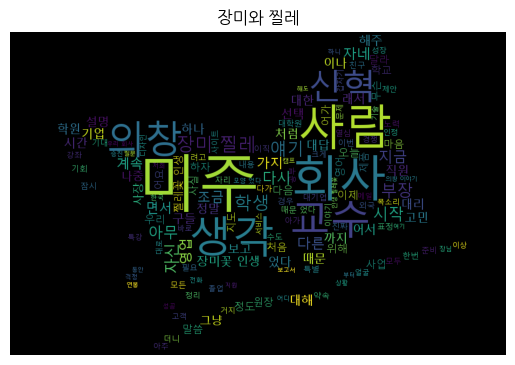

In [163]:
text_count = Text(okt.nouns(cleaned_text), name="장미와 찔레")

book_mask = np.array(
    Image.open(
        "./png-transparent-computer-icons-book-printing-black-and-white-background-black-angle-text-heart.png"
    )
)
trans_mask = np.where(book_mask == 0, 255, book_mask)


wc = WordCloud(
    width=640,
    height=360,
    background_color="black",
    font_path=font_path,
    mask=trans_mask,  # 마스크 설정
    contour_width=1,  # 외곽선 두께
    max_words=150,
    min_word_length=2,
)

cloud = wc.generate(text)

plt.imshow(cloud)
plt.axis("off")
plt.title("장미와 찔레")
plt.show()

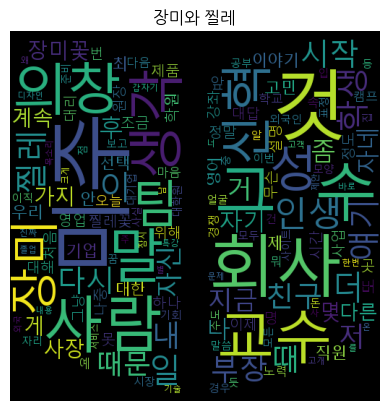

In [142]:
text_count = Text(okt.nouns(cleaned_text))

book_mask = np.array(Image.open("./free-icon-book-black-opened-symbol-54304.png"))
trans_mask = np.where(book_mask == 0, 255, book_mask)
# [출처] [ 영어 키워드 시각화 ] 파이썬 python 텍스트 마이닝 영어 ( 워드 클라우드 wordcloud,  이미지 마스크 mask 사용으로 빅데이터 분석 마스터)|작성자 행복전염


wc = WordCloud(
    width=640,
    height=360,
    background_color="black",
    font_path=font_path,
    mask=trans_mask,  # 마스크 설정
    contour_width=2,  # 외곽선 두께
    max_words=150,
    min_word_length=3,
)

cloud = wc.generate_from_frequencies(text_count.vocab())

plt.imshow(cloud)
plt.axis("off")
plt.title("장미와 찔레")
plt.show()